In [1]:
import pandas as pd
import numpy as np

In [2]:

dataset = pd.read_excel("output.xlsx")
dataset.head()


Tên xe Thương hiệu       Model  \
0           VinFast Fadil 1.4 AT Plus - 2020     Vinfast       Fadil   
1   VinFast Lux SA 2.0 Premium 2.0 AT - 2020     Vinfast  Lux sa 2.0   
2                 Mazda 3 1.5L Luxury - 2022       Mazda           3   
3                   Kia Cerato 1.6 AT - 2016         Kia      Cerato   
4      Ford EcoSport Titanium 1.5L AT - 2020        Ford    Ecosport   

   Năm sản xuất  Tình trạng  Số Km đã đi             Xuất xứ  Kiểu dáng  \
0          2020  Xe đã dùng        40000  Lắp ráp trong nước  Hatchback   
1          2020  Xe đã dùng        60000  Lắp ráp trong nước        SUV   
2          2022  Xe đã dùng        30000  Lắp ráp trong nước      Sedan   
3          2016  Xe đã dùng        72000  Lắp ráp trong nước      Sedan   
4          2020  Xe đã dùng        35000  Lắp ráp trong nước        SUV   

       Hộp số      Động cơ  Số chỗ ngồi  Số cửa                     Dẫn động  \
0  Số tự động  Xăng  1.4 L            5       5     FWD - Dẫn động cầu trước   
1  Số tự động  Xăng  2.0 L            7       5  AWD - 4 bánh toàn thời gian   
2  Số tự động  Xăng  1.5 L            5       4     FWD - Dẫn động cầu trước   
3  Số tự động  Xăng  1.6 L            5       4     FWD - Dẫn động cầu trước   
4  Số tự động  Xăng  1.5 L            5       5     FWD - Dẫn động cầu trước   

   Giá thành  
0        315  
1        775  
2        585  
3        386  
4        450

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28605 entries, 0 to 28604
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tên xe        28605 non-null  object
 1   Thương hiệu   28605 non-null  object
 2   Model         28605 non-null  object
 3   Năm sản xuất  28605 non-null  int64 
 4   Tình trạng    28605 non-null  object
 5   Số Km đã đi   28605 non-null  int64 
 6   Xuất xứ       28605 non-null  object
 7   Kiểu dáng     28605 non-null  object
 8   Hộp số        28605 non-null  object
 9   Động cơ       28605 non-null  object
 10  Số chỗ ngồi   28605 non-null  int64 
 11  Số cửa        28605 non-null  int64 
 12  Dẫn động      28605 non-null  object
 13  Giá thành     28605 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [4]:
dataset = dataset.replace("-", pd.NA)
dataset.isnull().sum()

Tên xe          0
Thương hiệu     0
Model           0
Năm sản xuất    0
Tình trạng      0
Số Km đã đi     0
Xuất xứ         0
Kiểu dáng       0
Hộp số          0
Động cơ         0
Số chỗ ngồi     0
Số cửa          0
Dẫn động        0
Giá thành       0
dtype: int64

In [5]:
np.set_printoptions(threshold=np.inf)
unique_values_distance = dataset['Số Km đã đi'].unique()
print (unique_values_distance)
unique_values_seats = dataset['Số chỗ ngồi'].unique()
print (unique_values_seats)
unique_values_doors = dataset['Số cửa'].unique()
print (unique_values_doors)
unique_values_price = dataset['Giá thành'].unique()
print (unique_values_price)

[     40000      60000      30000      72000      35000      49000
      79000      10000      67000          0         16      50000
      58000      24000      93000      71000      56000       3800
    2500000     105000      28000     138000      14000      86000
      84000     120000      88000      98000      12000      85000
      45000      57000      37000       9000      21000      17000
      20000      61000      25000      13000      35500      18800
      80000      65000         30       5000      22000         50
      15000      70000      47000      89000     100000      46000
      63000      69000       2500        500      68000      26000
      41000      30758      39999       9900      87000      19000
      42000      36613      26900      48000      54000      36000
      97000       2436       8500      11000      90000      12407
     130000     128000   18000000     110000      10422          6
       4000         20      32000      55000      38000     12

In [6]:
dataset['Số Km đã đi'] = dataset['Số Km đã đi'].str.replace('Km', '').str.replace(',', '').astype(np.int64)
dataset['Số chỗ ngồi'] = dataset['Số chỗ ngồi'].str.replace('chỗ', '').str.replace(',', '').astype(int)
dataset['Số cửa'] = dataset['Số cửa'].str.replace('cửa', '').str.replace(',', '').astype(int)
dataset['Giá thành'] = dataset['Giá thành'].str.replace('Triệu', '').str.replace('Tỷ', '1000')

def process_price(element):
    parts = element.split()
    if len(parts) == 3:
        return int(parts[0]) * int(parts[1]) + int(parts[2])
    else:
        return int(parts[0])

dataset['Giá thành'] = dataset['Giá thành'].apply(process_price)

AttributeError: Can only use .str accessor with string values!

In [7]:
rows_before = len(dataset)
dataset = dataset.drop_duplicates()
rows_after = len(dataset)
print(f"Drop {rows_before - rows_after} duplicates data")

Drop 0 duplicates data


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28605 entries, 0 to 28604
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tên xe        28605 non-null  object
 1   Thương hiệu   28605 non-null  object
 2   Model         28605 non-null  object
 3   Năm sản xuất  28605 non-null  int64 
 4   Tình trạng    28605 non-null  object
 5   Số Km đã đi   28605 non-null  int64 
 6   Xuất xứ       28605 non-null  object
 7   Kiểu dáng     28605 non-null  object
 8   Hộp số        28605 non-null  object
 9   Động cơ       28605 non-null  object
 10  Số chỗ ngồi   28605 non-null  int64 
 11  Số cửa        28605 non-null  int64 
 12  Dẫn động      28605 non-null  object
 13  Giá thành     28605 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [9]:
dataset.describe()

Năm sản xuất   Số Km đã đi   Số chỗ ngồi        Số cửa     Giá thành
count  28605.000000  2.860500e+04  28605.000000  28605.000000  28605.000000
mean    2016.968013  3.397014e+05      5.587729      4.463066   1038.767348
std        5.453423  2.882597e+07      1.789502      0.832837   1838.872116
min     1989.000000  0.000000e+00      0.000000      0.000000      1.000000
25%     2014.000000  0.000000e+00      5.000000      4.000000    345.000000
50%     2018.000000  3.000000e+04      5.000000      5.000000    540.000000
75%     2021.000000  7.000000e+04      7.000000      5.000000    950.000000
max     2023.000000  4.294967e+09     47.000000     50.000000  63500.000000

In [10]:
incompleted_brand = dataset[dataset['Thương hiệu'] == "Không xác định"]
incompleted_brand

Empty DataFrame
Columns: [Tên xe, Thương hiệu, Model, Năm sản xuất, Tình trạng, Số Km đã đi, Xuất xứ, Kiểu dáng, Hộp số, Động cơ, Số chỗ ngồi, Số cửa, Dẫn động, Giá thành]
Index: []

In [11]:
condition = dataset['Thương hiệu'] == 'Không xác định'
dataset.loc[condition, 'Thương hiệu'] = dataset.loc[condition, 'Tên xe'].apply(lambda x: x.split('-')[0])
incompleted_model = dataset[dataset['Model'] == "Không xác định"]
incompleted_model

Tên xe     Thương hiệu           Model  Năm sản xuất  \
2460        cuu long - 2008       cuu long   Không xác định          2008   
6441           Kenbo - 2019          kenbo   Không xác định          2019   
10970           Veam - 2014           veam   Không xác định          2014   
16290          Kenbo - 2019          kenbo   Không xác định          2019   
16441           Veam - 2018           veam   Không xác định          2018   
17107          Fairy - 2008          fairy   Không xác định          2008   
17681           VEAM - 2015           veam   Không xác định          2015   
17949           Veam - 2015           veam   Không xác định          2015   
18330   Freightliner - 2005   freightliner   Không xác định          2005   
18776   Trường Giang - 2004   trường giang   Không xác định          2004   
19250            SMR - 2023            smr   Không xác định          2023   
20384            C&C - 2015            c&c   Không xác định          2015   
22312    Xe tải Tera - 2021          Teraco  Không xác định          2021   
22929          Kenbo - 2018          kenbo   Không xác định          2018   
23504            FAW - 2007            faw   Không xác định          2007   
25223          Kenbo - 2020          kenbo   Không xác định          2020   
25284         Jinbei - 2007         jinbei   Không xác định          2007   
25572           VEAM - 2016           veam   Không xác định          2016   
25668          Kenbo - 2022          kenbo   Không xác định          2022   
25796     cheng long - 2011     cheng long   Không xác định          2011   
25839          Kenbo - 2018          kenbo   Không xác định          2018   
26656            TMT - 2020            tmt   Không xác định          2020   
26985   Trường Giang - 2018   trường giang   Không xác định          2018   
27207       Do Thanh - 2021       do thanh   Không xác định          2021   
27906    Chiến Thắng - 2008    chiến thắng   Không xác định          2008   
28267       Do Thanh - 2021       do thanh   Không xác định          2021   
28556        Hoa Mai - 2008        hoa mai   Không xác định          2008   

       Tình trạng  Số Km đã đi             Xuất xứ    Kiểu dáng  Hộp số  \
2460       Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
6441   Xe đã dùng       100000  Lắp ráp trong nước        Truck  Số tay   
10970  Xe đã dùng       140000  Lắp ráp trong nước        Truck  Số tay   
16290      Xe mới            0  Lắp ráp trong nước  Van/Minivan  Số tay   
16441  Xe đã dùng        40000  Lắp ráp trong nước        Truck  Số tay   
17107      Xe mới            0  Lắp ráp trong nước    Hatchback  Số tay   
17681  Xe đã dùng        58000  Lắp ráp trong nước        Truck  Số tay   
17949      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
18330      Xe mới            0           Nhập khẩu        Truck  Số tay   
18776      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
19250  Xe đã dùng          700  Lắp ráp trong nước        Truck  Số tay   
20384      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
22312  Xe đã dùng       120000  Lắp ráp trong nước        Truck  Số tay   
22929      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
23504      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
25223      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
25284      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
25572      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
25668      Xe mới            0  Lắp ráp trong nước  Van/Minivan  Số tay   
25796  Xe đã dùng       100000           Nhập khẩu        Truck  Số tay   
25839  Xe đã dùng        49000  Lắp ráp trong nước        Truck  Số tay   
26656  Xe đã dùng        22000  Lắp ráp trong nước  Van/Minivan  Số tay   
26985      Xe mới            0  Lắp ráp trong nước        Truck  Số tay   
27207      Xe mới            0  Lắp ráp trong nước        Truck 

In [12]:
dataset.iloc[2862, dataset.columns.get_loc('Thương hiệu')] = 'Teraco'
dataset.iloc[2862, dataset.columns.get_loc('Model')] = '100'
dataset.iloc[10000, dataset.columns.get_loc('Thương hiệu')] = 'VINAMOTOR'
dataset.iloc[10000, dataset.columns.get_loc('Model')] = 'K6'
dataset.iloc[10457, dataset.columns.get_loc('Thương hiệu')] = 'Fuso'
dataset.iloc[10457, dataset.columns.get_loc('Model')] = '5 tons'
dataset.iloc[10502, dataset.columns.get_loc('Thương hiệu')] = 'TMT'
dataset.iloc[10502, dataset.columns.get_loc('Model')] = 'Enclosed'
dataset.iloc[11021, dataset.columns.get_loc('Model')] = 'V'
dataset.iloc[11685, dataset.columns.get_loc('Thương hiệu')] = 'DOTHANH'
dataset.iloc[11685, dataset.columns.get_loc('Model')] = 'IZ65'
dataset.iloc[19186, dataset.columns.get_loc('Thương hiệu')] = 'KENBO'
dataset.iloc[19186, dataset.columns.get_loc('Model')] = '990 kg'
dataset.iloc[19500, dataset.columns.get_loc('Thương hiệu')] = 'VEAM'
dataset.iloc[19500, dataset.columns.get_loc('Model')] = 'VT26'
dataset.iloc[20349, dataset.columns.get_loc('Thương hiệu')] = 'CIMC'
dataset.iloc[20990, dataset.columns.get_loc('Thương hiệu')] = 'JAC'
dataset.iloc[20990, dataset.columns.get_loc('Model')] = 'SUNRAY'
dataset.iloc[21291, dataset.columns.get_loc('Thương hiệu')] = 'JAC'
dataset.iloc[21291, dataset.columns.get_loc('Model')] = 'N350s'
dataset.iloc[22323, dataset.columns.get_loc('Thương hiệu')] = 'Teraco'
dataset.iloc[23056, dataset.columns.get_loc('Thương hiệu')] = 'JAC'
dataset.iloc[23056, dataset.columns.get_loc('Model')] = 'N900 Plus'
dataset.iloc[23840, dataset.columns.get_loc('Thương hiệu')] = 'Teraco'
dataset.iloc[23840, dataset.columns.get_loc('Model')] = '100'
dataset.iloc[24118, dataset.columns.get_loc('Thương hiệu')] = 'VEAM'
dataset.iloc[24118, dataset.columns.get_loc('Model')] = '5T'
dataset.iloc[25023, dataset.columns.get_loc('Thương hiệu')] = 'Teraco'
dataset.iloc[25023, dataset.columns.get_loc('Model')] = '100'

In [13]:
dataset['Thương hiệu'] = dataset['Thương hiệu'].str.capitalize()
dataset['Model'] = dataset['Model'].str.capitalize()

In [14]:
missing_data_rows = dataset[dataset.isnull().any(axis=1)]
missing_data_rows

Empty DataFrame
Columns: [Tên xe, Thương hiệu, Model, Năm sản xuất, Tình trạng, Số Km đã đi, Xuất xứ, Kiểu dáng, Hộp số, Động cơ, Số chỗ ngồi, Số cửa, Dẫn động, Giá thành]
Index: []

In [15]:
dataset.dropna(inplace=True)
missing_data_rows = dataset[dataset.isnull().any(axis=1)]
missing_data_rows

Empty DataFrame
Columns: [Tên xe, Thương hiệu, Model, Năm sản xuất, Tình trạng, Số Km đã đi, Xuất xứ, Kiểu dáng, Hộp số, Động cơ, Số chỗ ngồi, Số cửa, Dẫn động, Giá thành]
Index: []

In [16]:
dataset.drop('Số chỗ ngồi', axis=1, inplace=True)
dataset.drop('Số cửa', axis=1, inplace=True)
print(len(dataset[(dataset['Tình trạng'] == "Xe đã dùng") & (dataset['Số Km đã đi'] == 0)]))

5093


In [17]:
def join_the_l(lst):
    return [item + "l" if i % 3 == 1 else item for i, item in enumerate(lst)]
def join_the_at(lst):
    return [item + "at" if i % 3 == 1 else item for i, item in enumerate(lst)]

thuong_hieu_list = set(item for sublist in dataset["Thương hiệu"].str.lower().str.split().tolist() for item in sublist)
model_list = set(item for sublist in dataset["Model"].str.lower().str.split().tolist() for item in sublist)
dong_co = [item for sublist in dataset["Động cơ"].str.lower().str.split().tolist() for item in sublist]
dong_co_list = set(dong_co)
nam_san_xuat_list = set(dataset["Năm sản xuất"].astype(str).tolist())
dong_co_joined_l = set(join_the_l(dong_co))
dong_co_joined_at = set(join_the_at(dong_co))

dataset['Phiên bản'] = dataset['Tên xe'].str.lower().str.split().apply(
    lambda x: ' '.join([word for word in x if word not in thuong_hieu_list.union(model_list).union(dong_co_list).union(nam_san_xuat_list).union(dong_co_joined_l).union(dong_co_joined_at).union(set(["-", "at"]))])
)

dataset.drop('Tên xe', axis=1, inplace=True)
dataset.insert(2, 'Phiên bản', dataset.pop('Phiên bản'))

In [18]:
print(dataset.shape)

(28605, 12)


In [19]:
# threshold = [-1, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, float('inf')]
# labels = ['0-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000', '100001-500000', '500000+']
# dataset['Số Km đã đi'] = pd.cut(dataset['Số Km đã đi'], bins=threshold, labels=labels)

In [20]:
dataset.to_csv('data.csv',index=False)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dataset

Thương hiệu       Model          Phiên bản  Năm sản xuất  Tình trạng  \
0         Vinfast       Fadil                             2020  Xe đã dùng   
1         Vinfast  Lux sa 2.0            premium          2020  Xe đã dùng   
2           Mazda           3             luxury          2022  Xe đã dùng   
3             Kia      Cerato                             2016  Xe đã dùng   
4            Ford    Ecosport           titanium          2020  Xe đã dùng   
...           ...         ...                ...           ...         ...   
28612         Kia     Morning                 mt          2020  Xe đã dùng   
28613        Ford      Ranger            xls 4x2          2023  Xe đã dùng   
28614  Mitsubishi      Triton  athlete 4x2 mivec          2018  Xe đã dùng   
28615      Toyota       Camry               2.5q          2020  Xe đã dùng   
28616     Hyundai      Tucson              turbo          2018  Xe đã dùng   

        Số Km đã đi             Xuất xứ           Kiểu dáng      Hộp số  \
0       10001-50000  Lắp ráp trong nước           Hatchback  Số tự động   
1      50001-100000  Lắp ráp trong nước                 SUV  Số tự động   
2       10001-50000  Lắp ráp trong nước               Sedan  Số tự động   
3      50001-100000  Lắp ráp trong nước               Sedan  Số tự động   
4       10001-50000  Lắp ráp trong nước                 SUV  Số tự động   
...             ...                 ...                 ...         ...   
28612   10001-50000  Lắp ráp trong nước           Hatchback      Số tay   
28613    5001-10000  Lắp ráp trong nước  Bán tải / Pickup  Số tự động   
28614  50001-100000           Nhập khẩu  Bán tải / Pickup  Số tự động   
28615   10001-50000           Nhập khẩu               Sedan  Số tự động   
28616  50001-100000  Lắp ráp trong nước           Crossover  Số tự động   

            Động cơ                     Dẫn động  Giá thành  
0       Xăng  1.4 L     FWD - Dẫn động cầu trước        315  
1       Xăng  2.0 L  AWD - 4 bánh toàn thời gian        775  
2       Xăng  1.5 L     FWD - Dẫn động cầu trước        585  
3       Xăng  1.6 L     FWD - Dẫn động cầu trước        386  
4       Xăng  1.5 L     FWD - Dẫn động cầu trước        450  
...             ...                          ...        ...  
28612  Xăng  1.25 L     FWD - Dẫn động cầu trước        235  
28613    Dầu  2.0 L       RFD - Dẫn động cầu sau        665  
28614    Dầu  2.4 L       RFD - Dẫn động cầu sau        485  
28615   Xăng  2.5 L     FWD - Dẫn động cầu trước        890  
28616   Xăng  1.6 L     FWD - Dẫn động cầu trước        666  

[28605 rows x 12 columns]

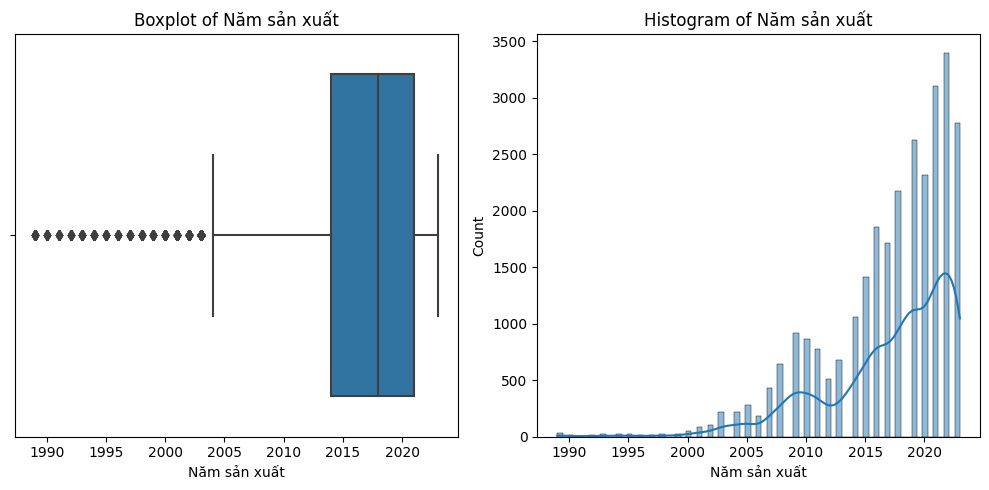

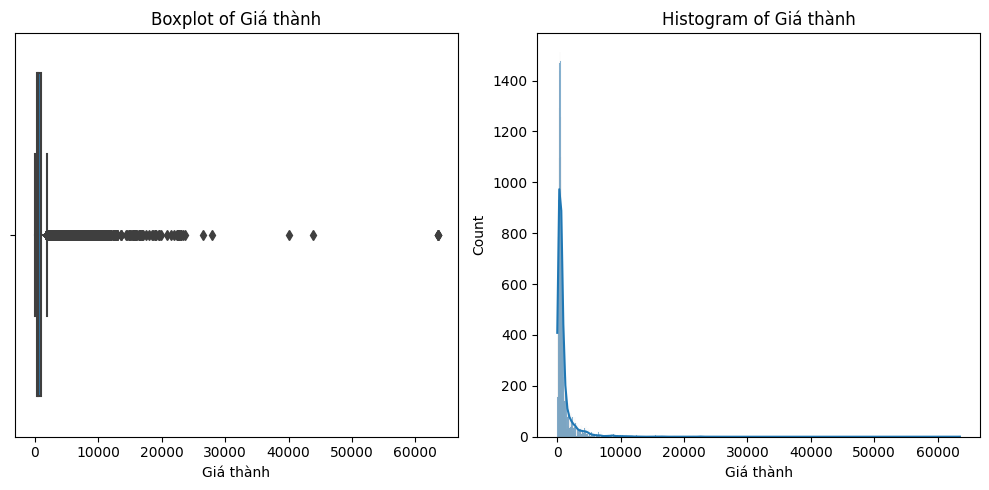

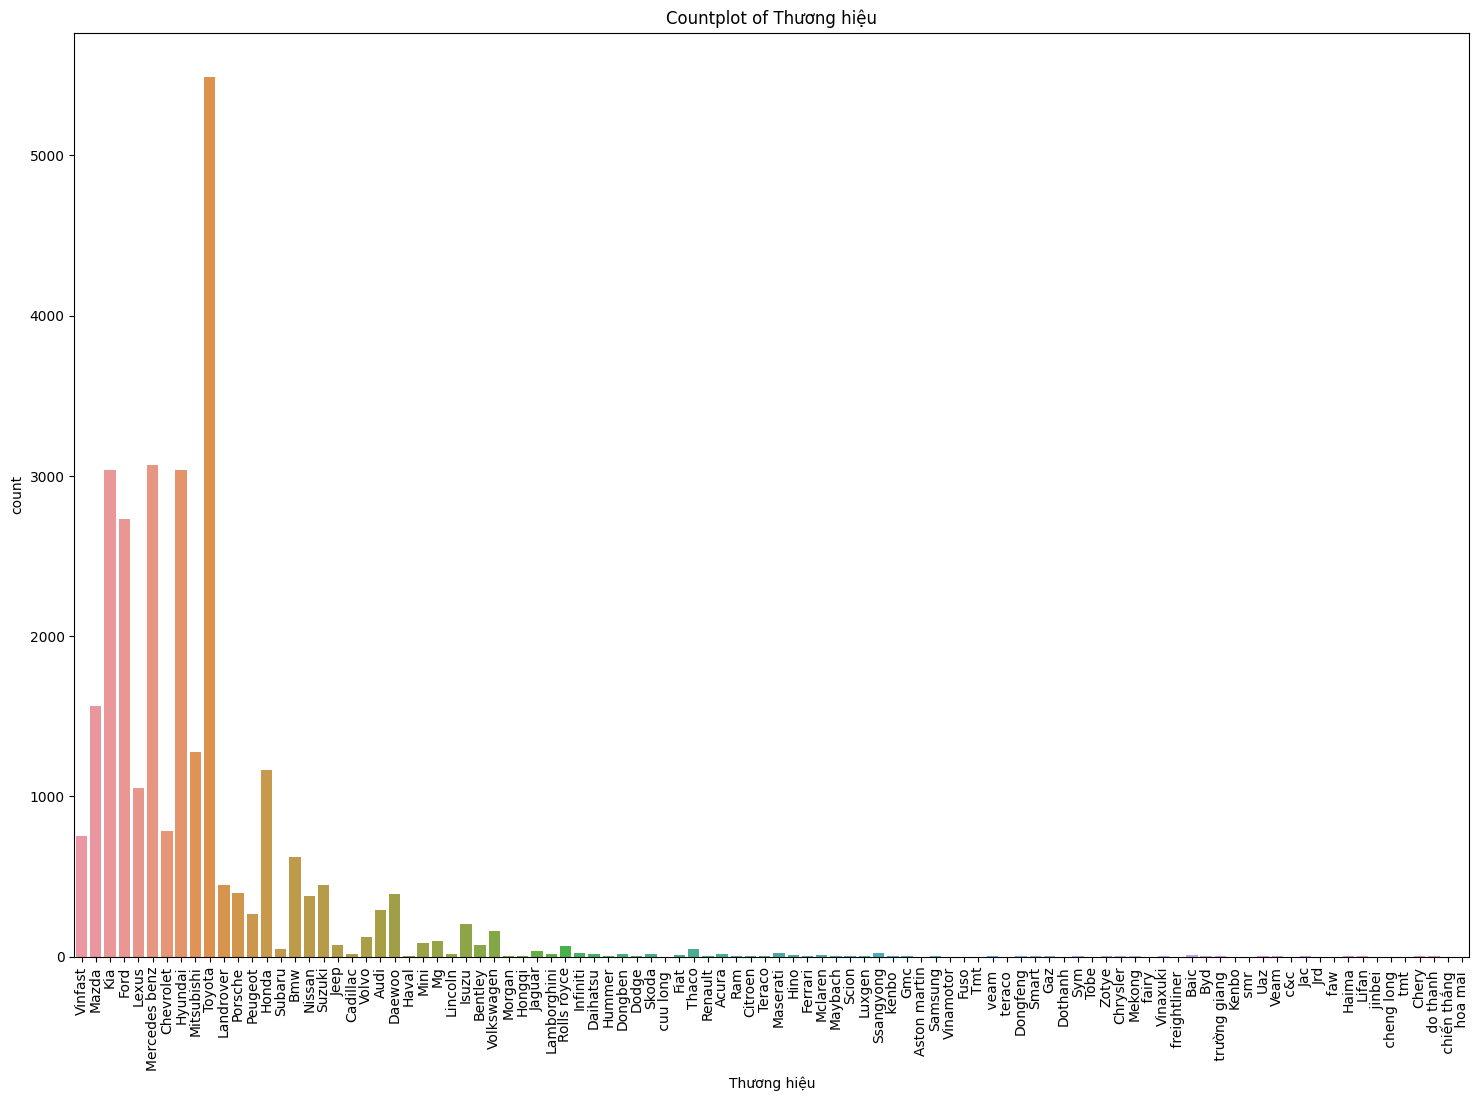

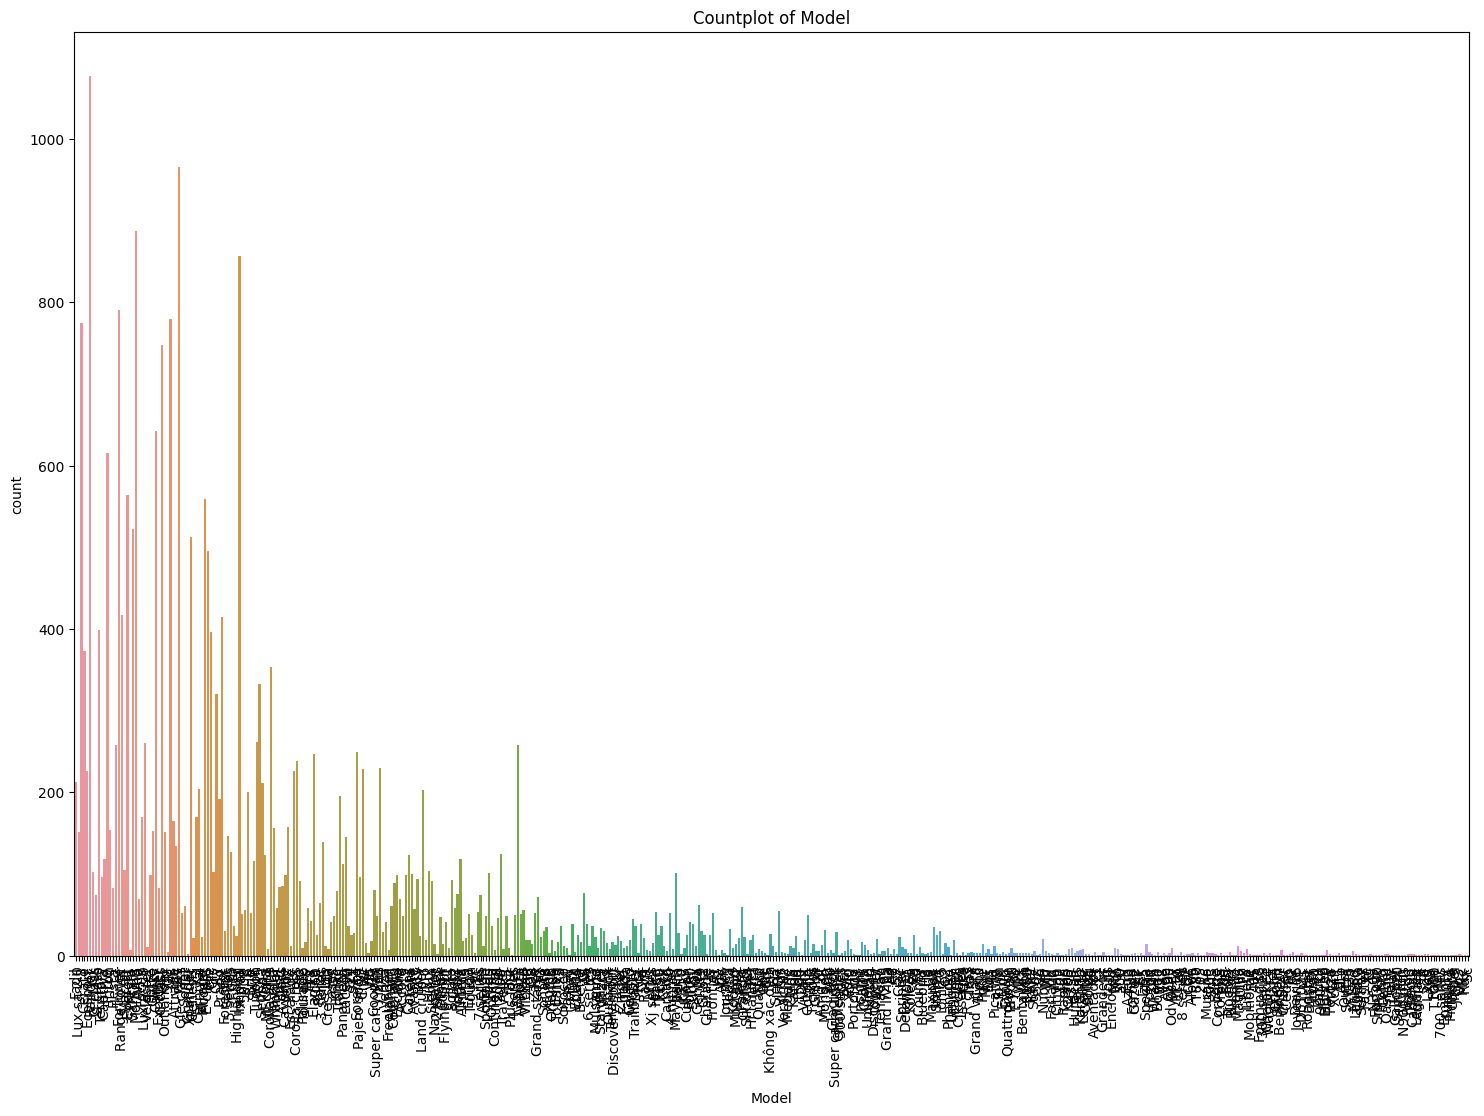

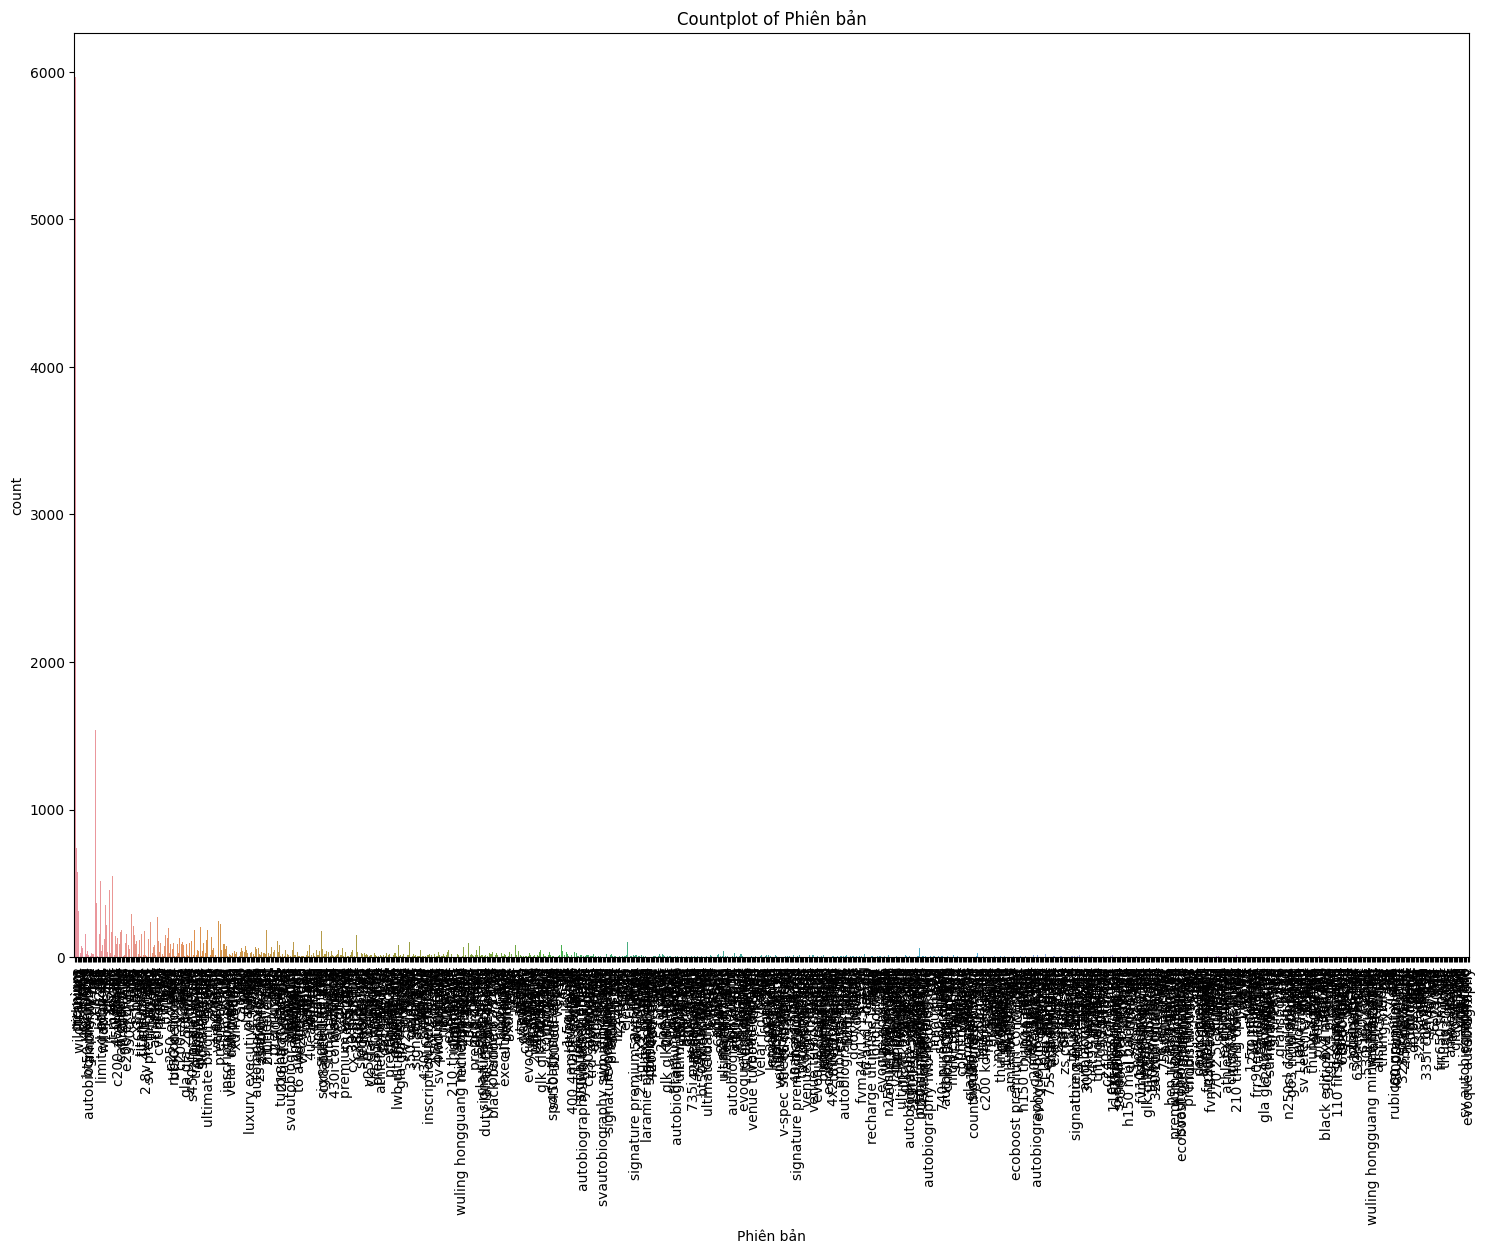

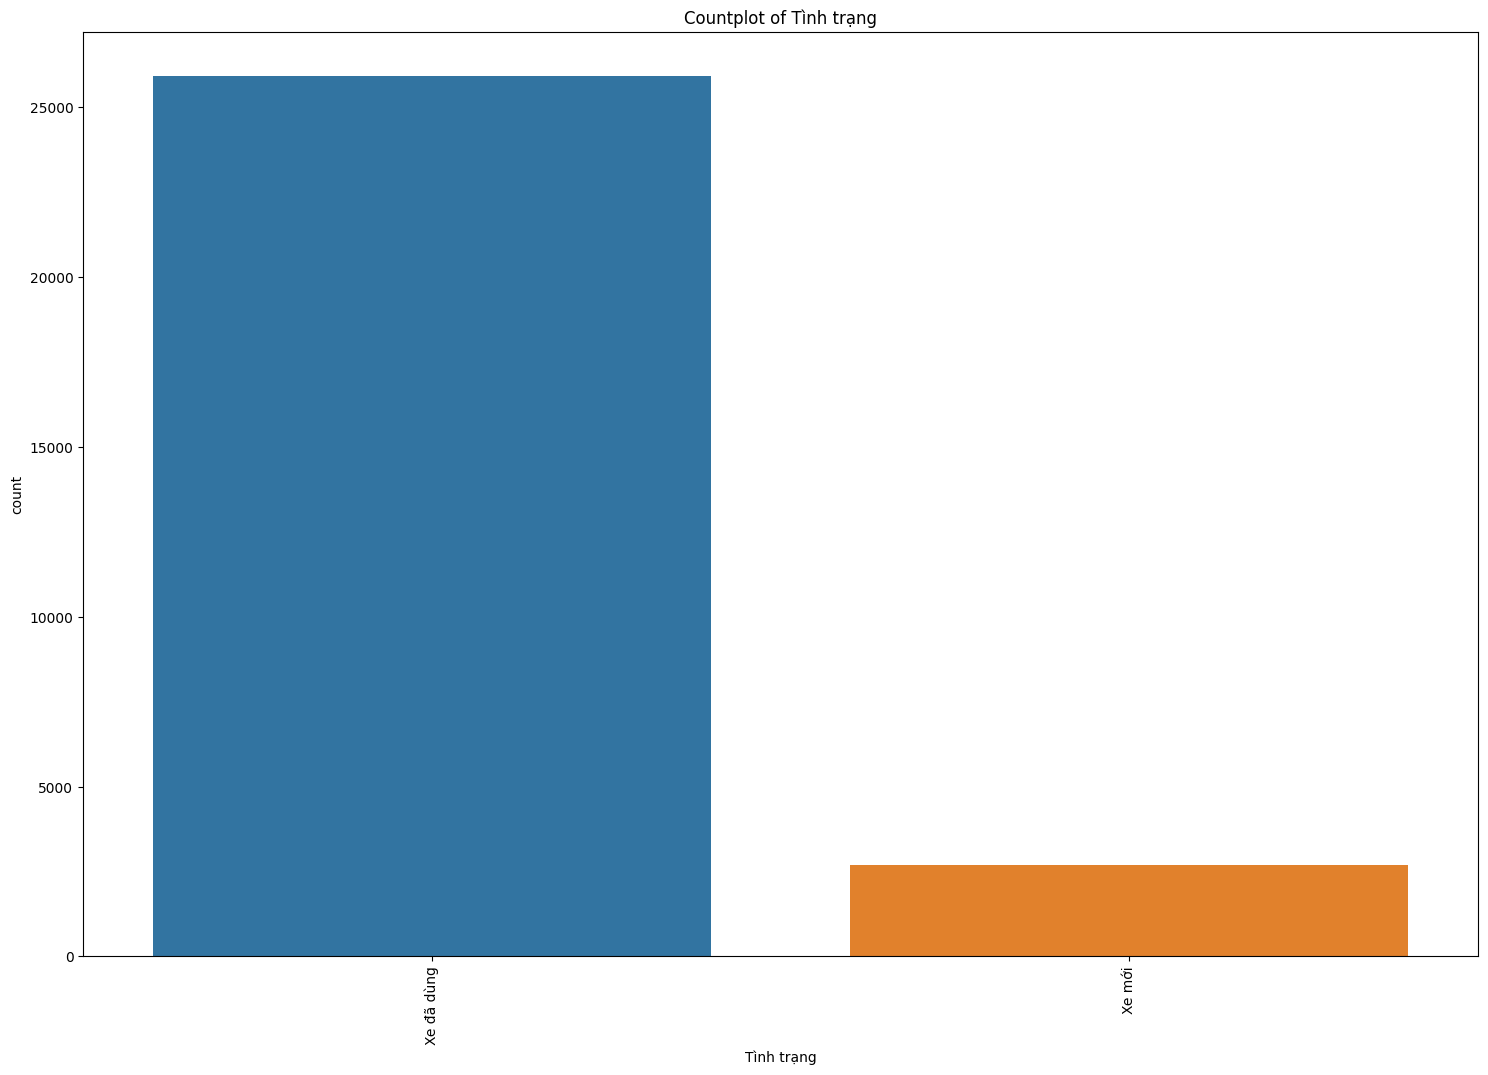

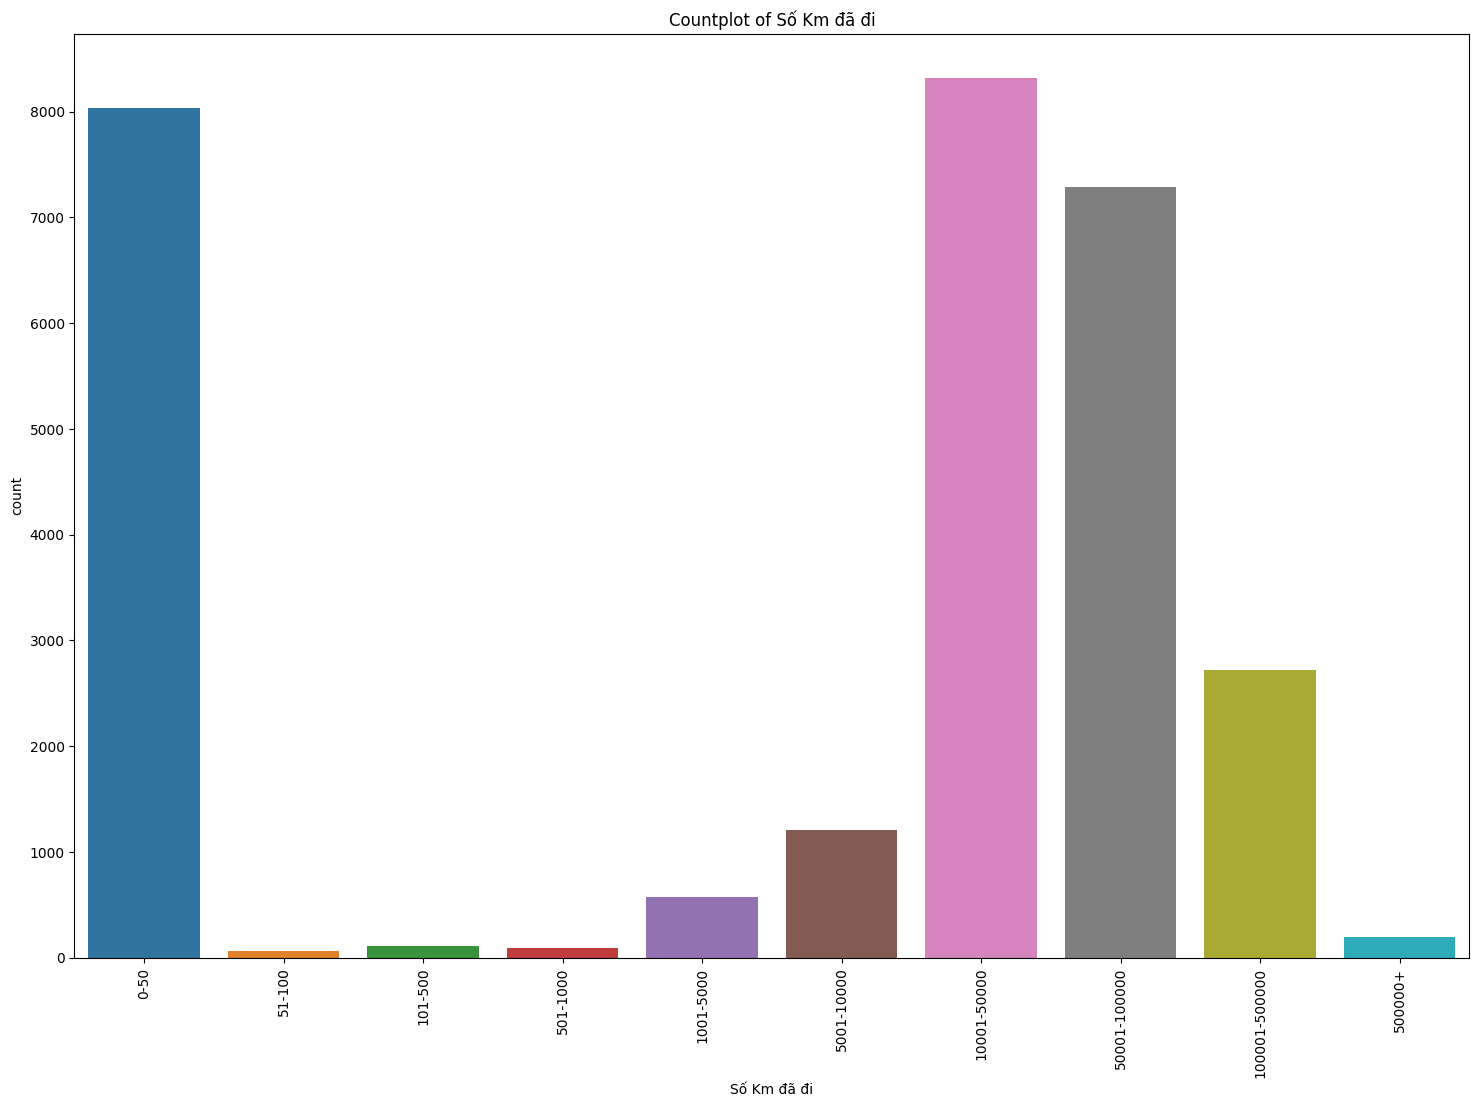

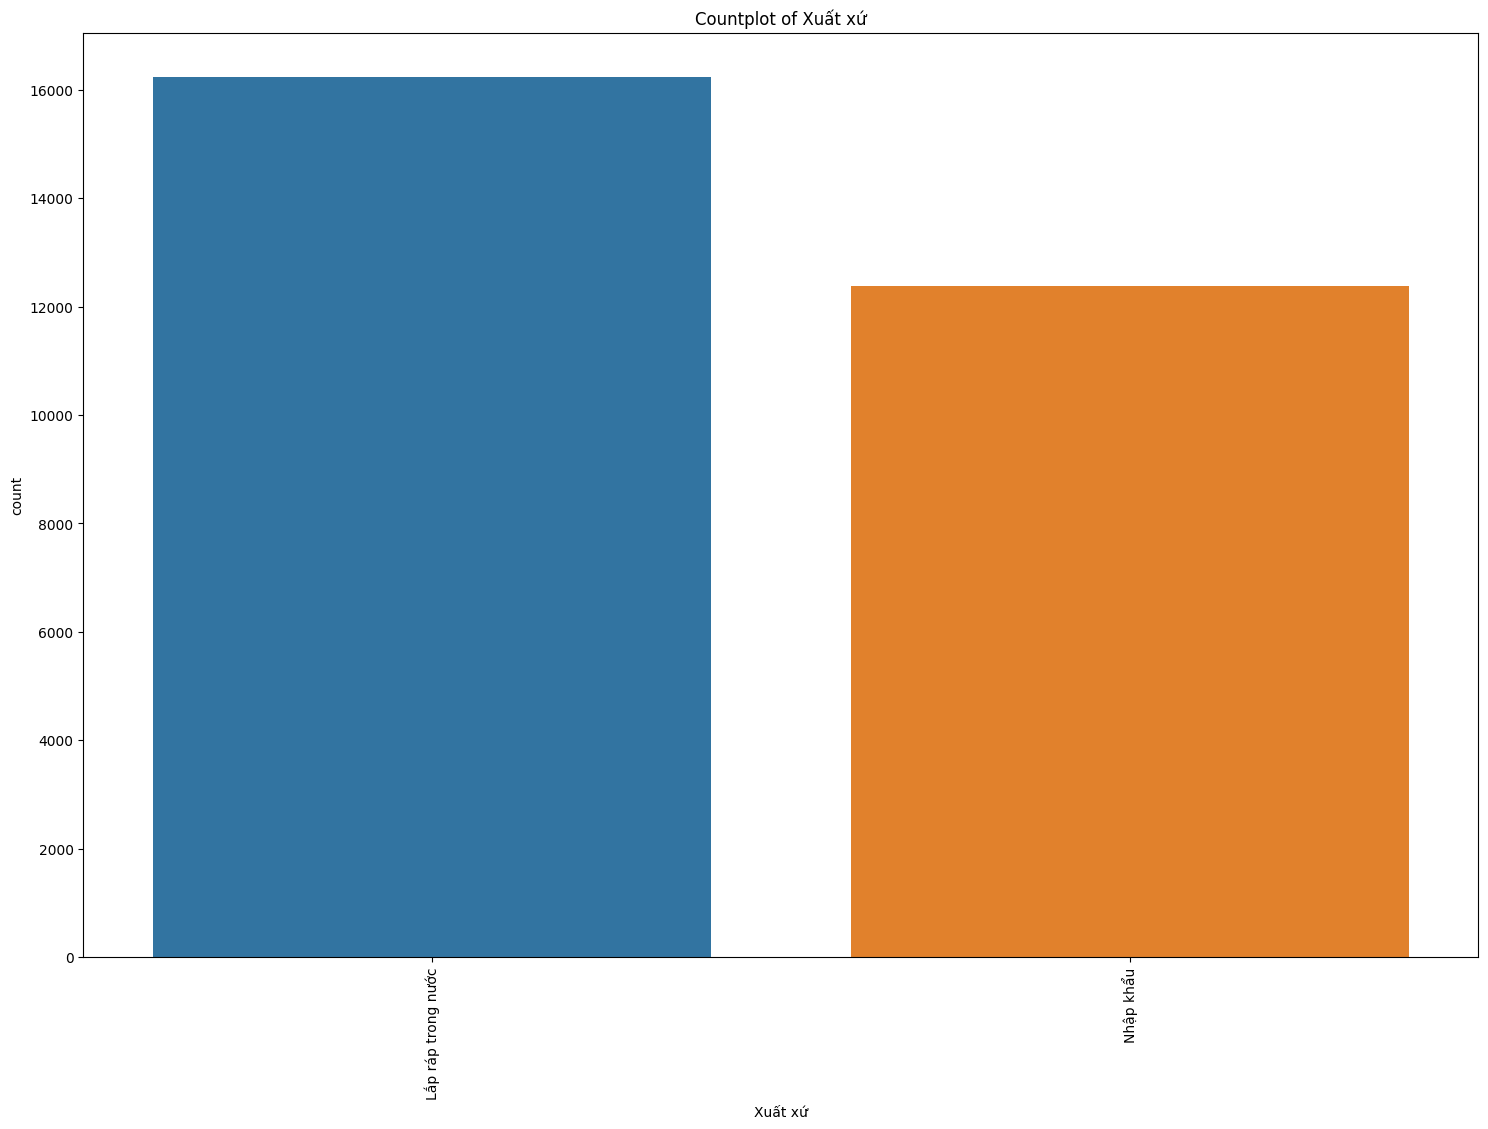

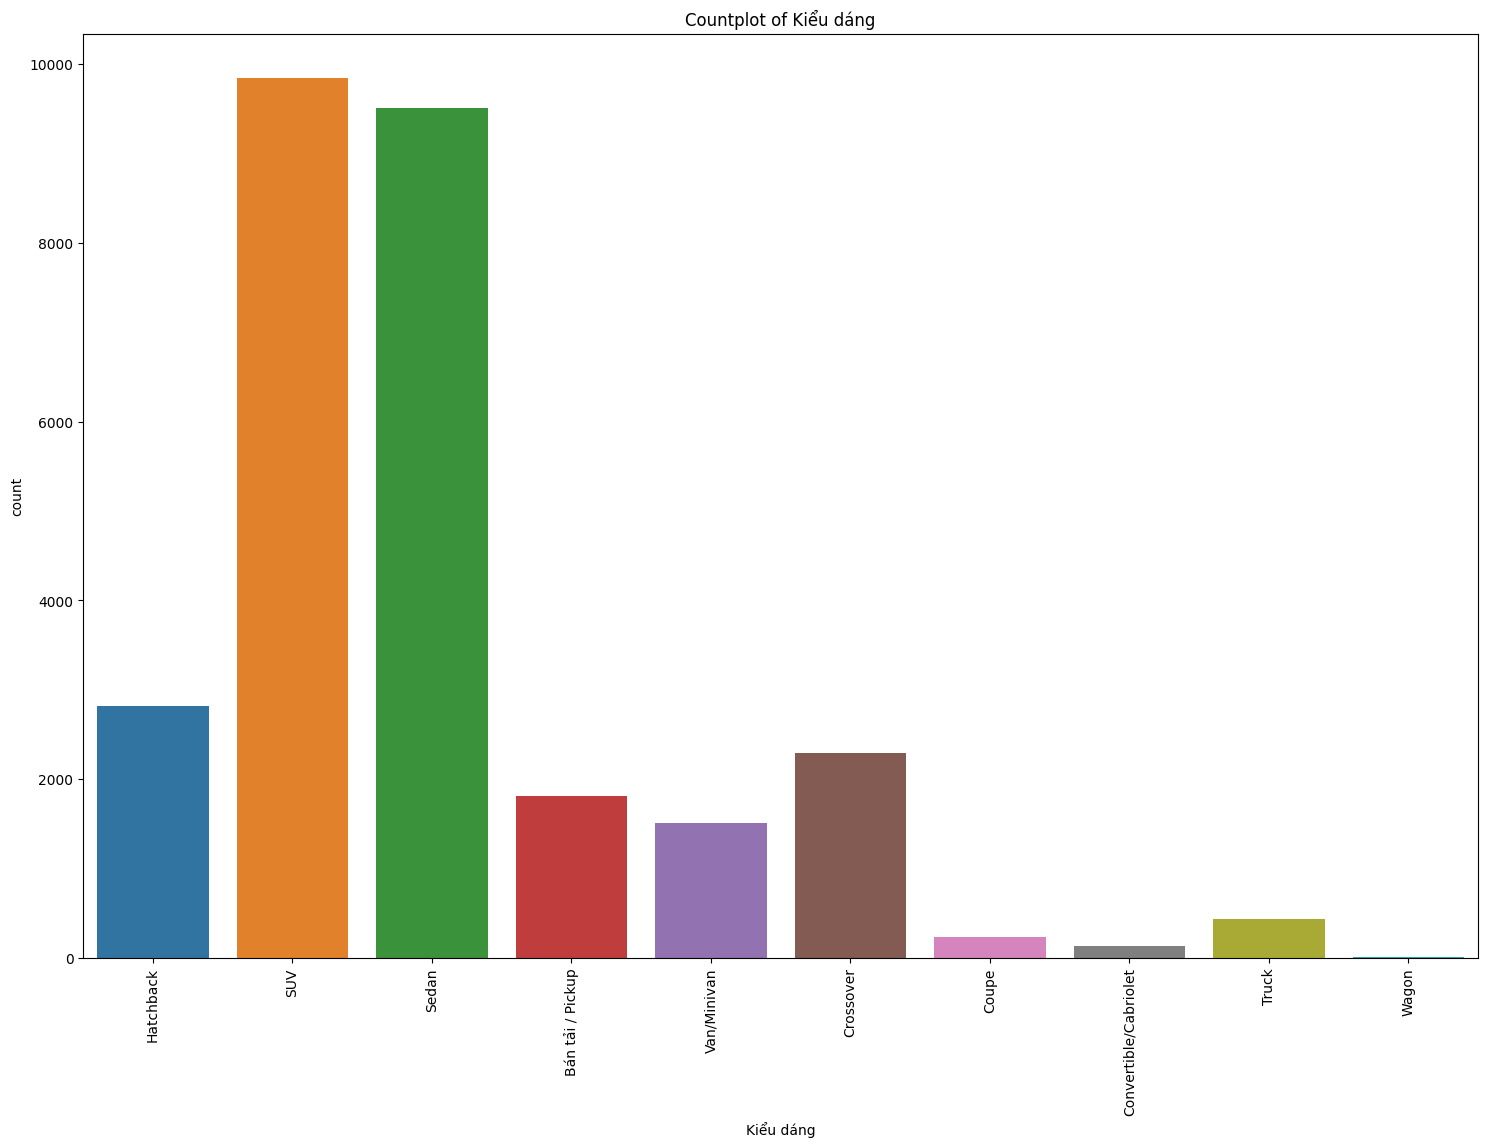

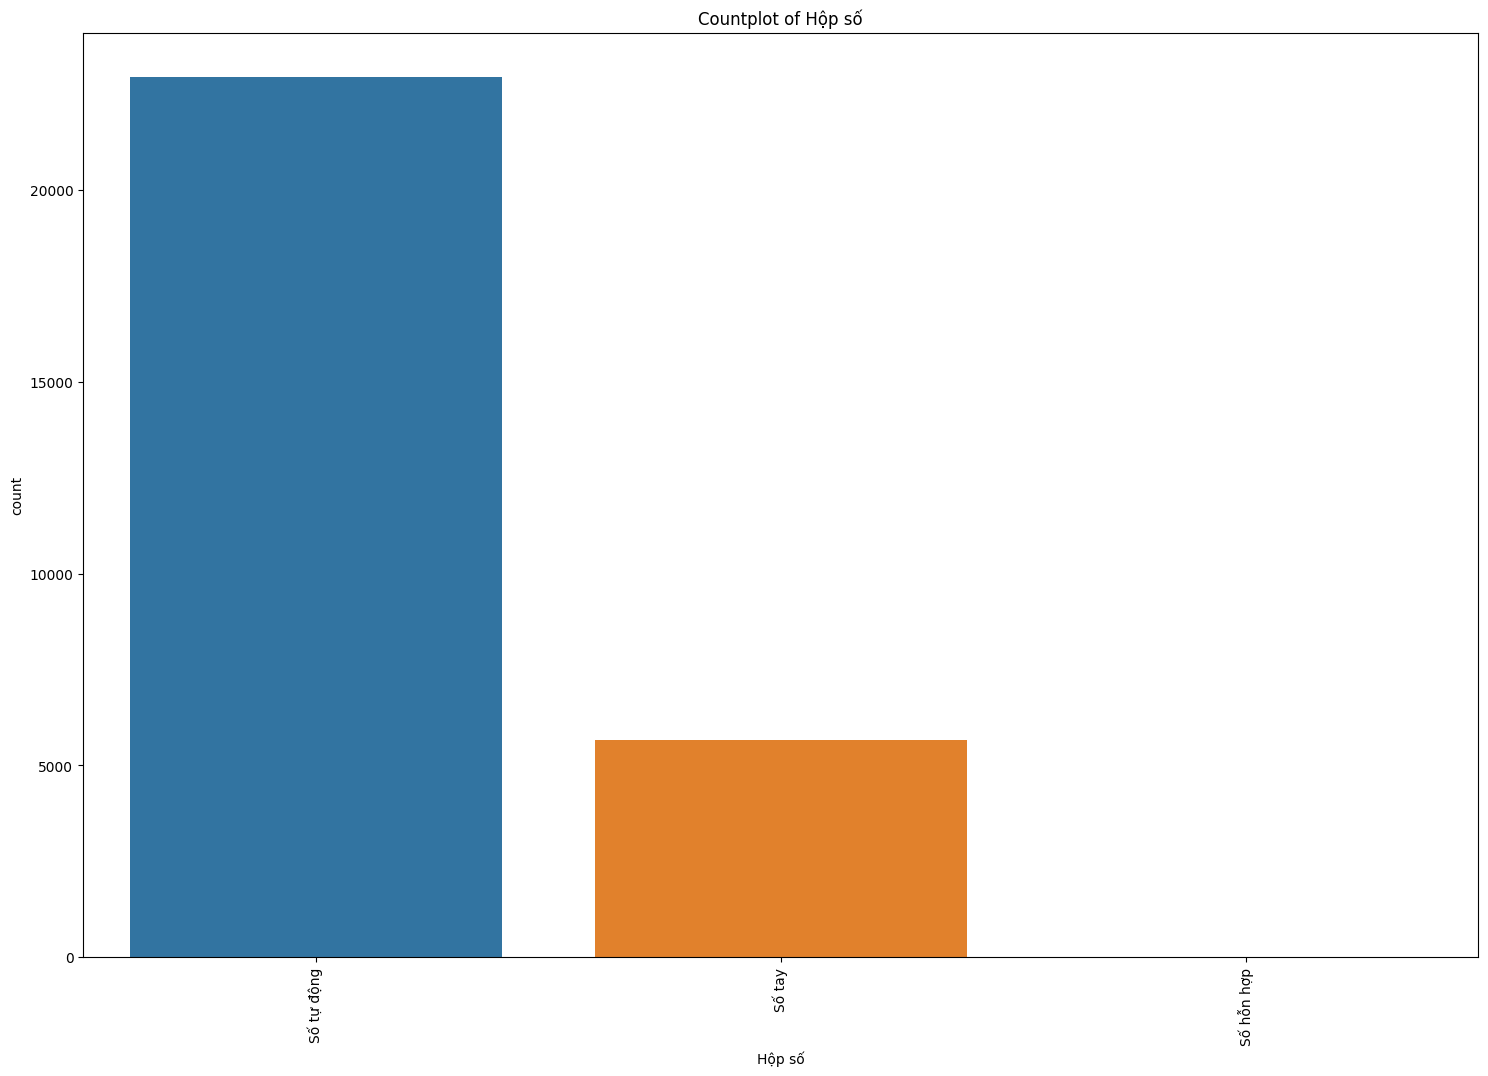

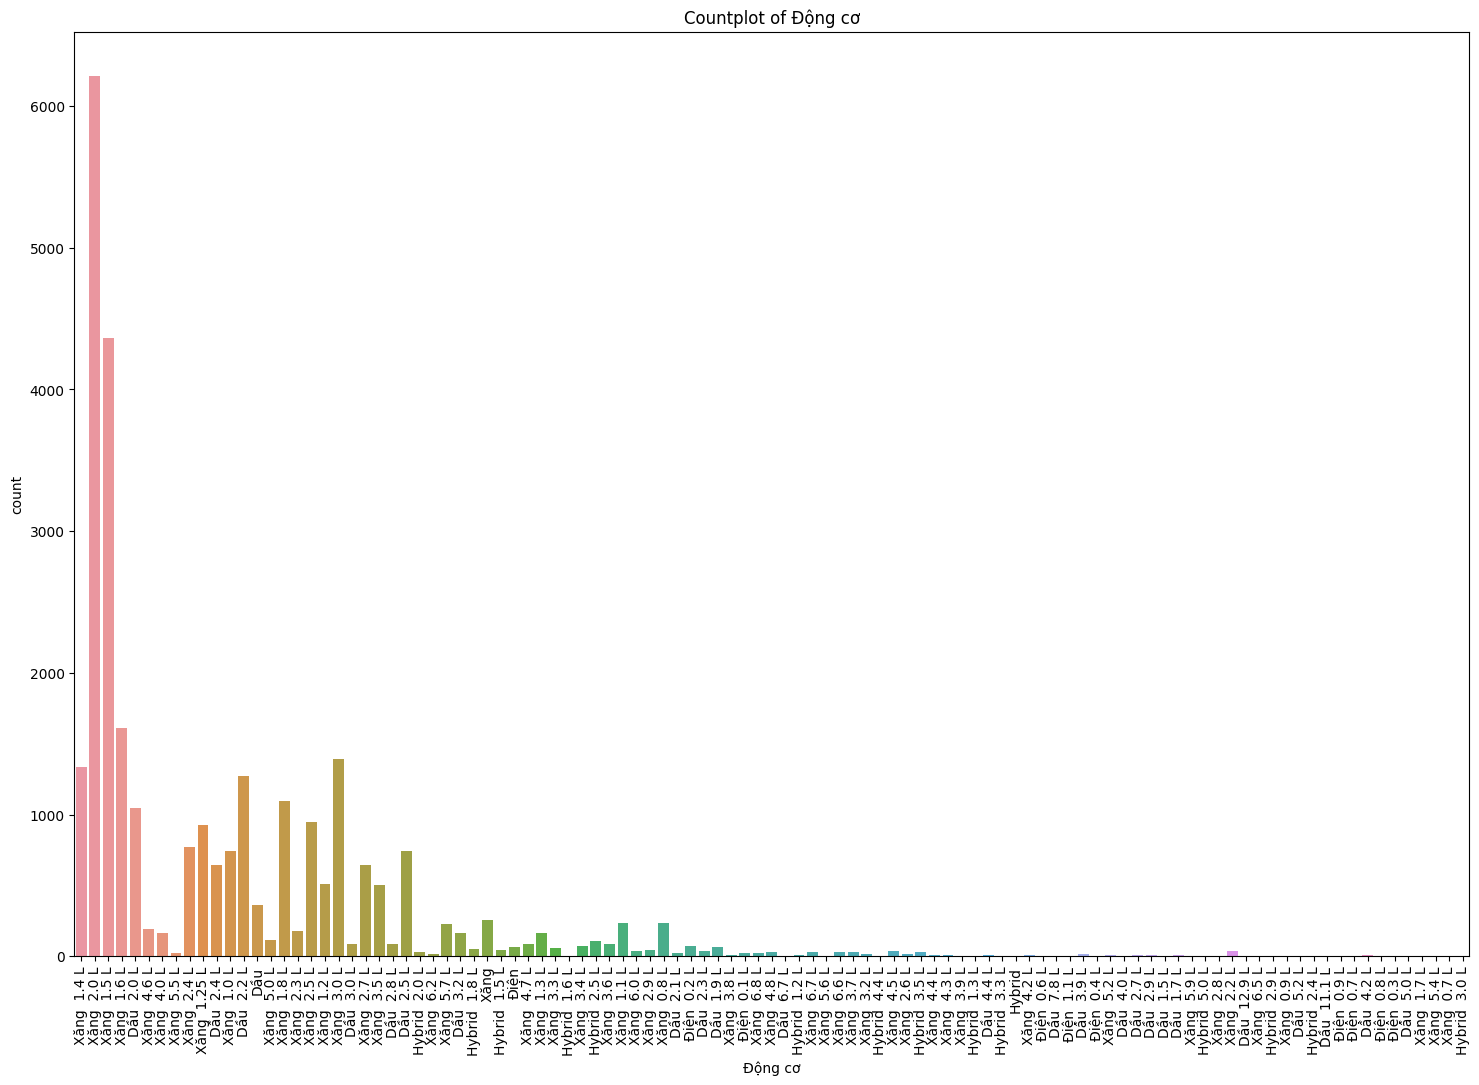

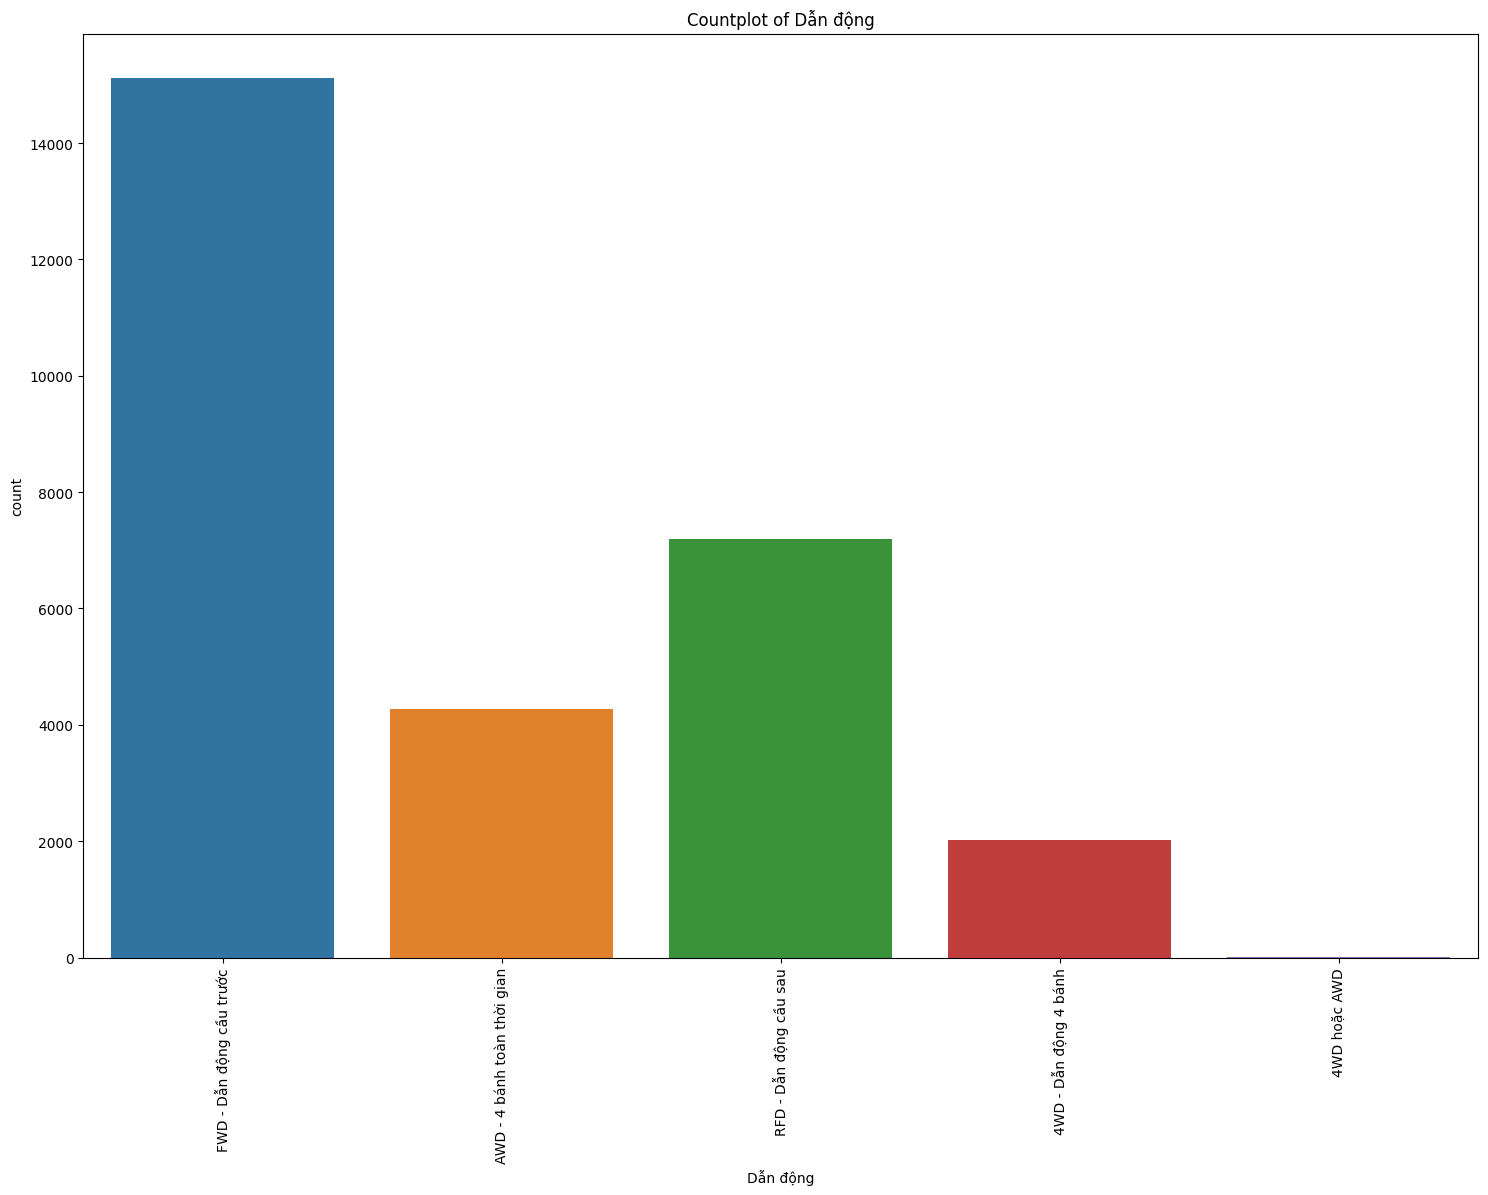

In [22]:
for value in ["Năm sản xuất", "Giá thành"]:
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=dataset, x=dataset[value])
    plt.title('Boxplot of ' + value)

    plt.subplot(1, 2, 2)
    sns.histplot(data=dataset, x=dataset[value], kde=True)
    plt.title('Histogram of ' + value)

    plt.tight_layout()
    plt.show()

for category in ["Thương hiệu", "Model", "Phiên bản", "Tình trạng", "Số Km đã đi", "Xuất xứ", "Kiểu dáng", "Hộp số", "Động cơ", "Dẫn động"]:
    plt.figure(figsize=(18,12))
    sns.countplot(data=dataset, x=dataset[category])
    plt.title('Countplot of ' + category)
    plt.xticks(rotation=90)
    plt.show()


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28605 entries, 0 to 28616
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Thương hiệu   28605 non-null  object  
 1   Model         28605 non-null  object  
 2   Phiên bản     28605 non-null  object  
 3   Năm sản xuất  28605 non-null  int64   
 4   Tình trạng    28605 non-null  object  
 5   Số Km đã đi   28605 non-null  category
 6   Xuất xứ       28605 non-null  object  
 7   Kiểu dáng     28605 non-null  object  
 8   Hộp số        28605 non-null  object  
 9   Động cơ       28605 non-null  object  
 10  Dẫn động      28605 non-null  object  
 11  Giá thành     28605 non-null  int64   
dtypes: category(1), int64(2), object(9)
memory usage: 2.6+ MB


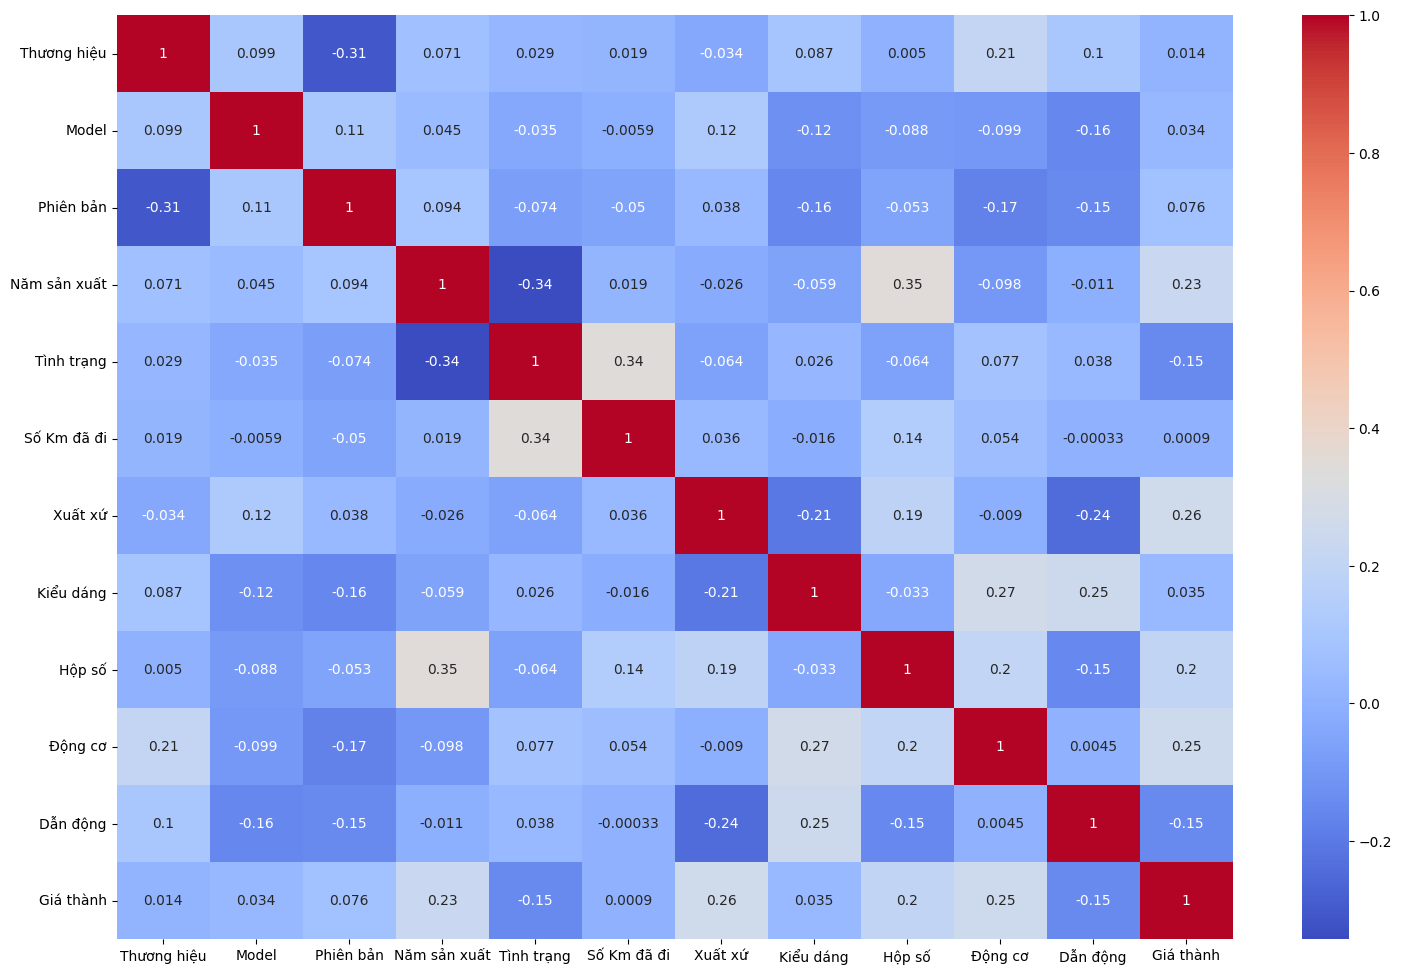

In [24]:
from sklearn.preprocessing import LabelEncoder

dataset["Số Km đã đi"] = dataset["Số Km đã đi"].astype('object')

numerical_dataset = dataset.copy()
labelencoder = LabelEncoder()

for column in ["Thương hiệu", "Model", "Phiên bản", "Tình trạng", "Số Km đã đi", "Xuất xứ", "Kiểu dáng", "Hộp số", "Động cơ", "Dẫn động"]:
    numerical_dataset[column] = labelencoder.fit_transform(numerical_dataset[column])

corr_matrix = numerical_dataset.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


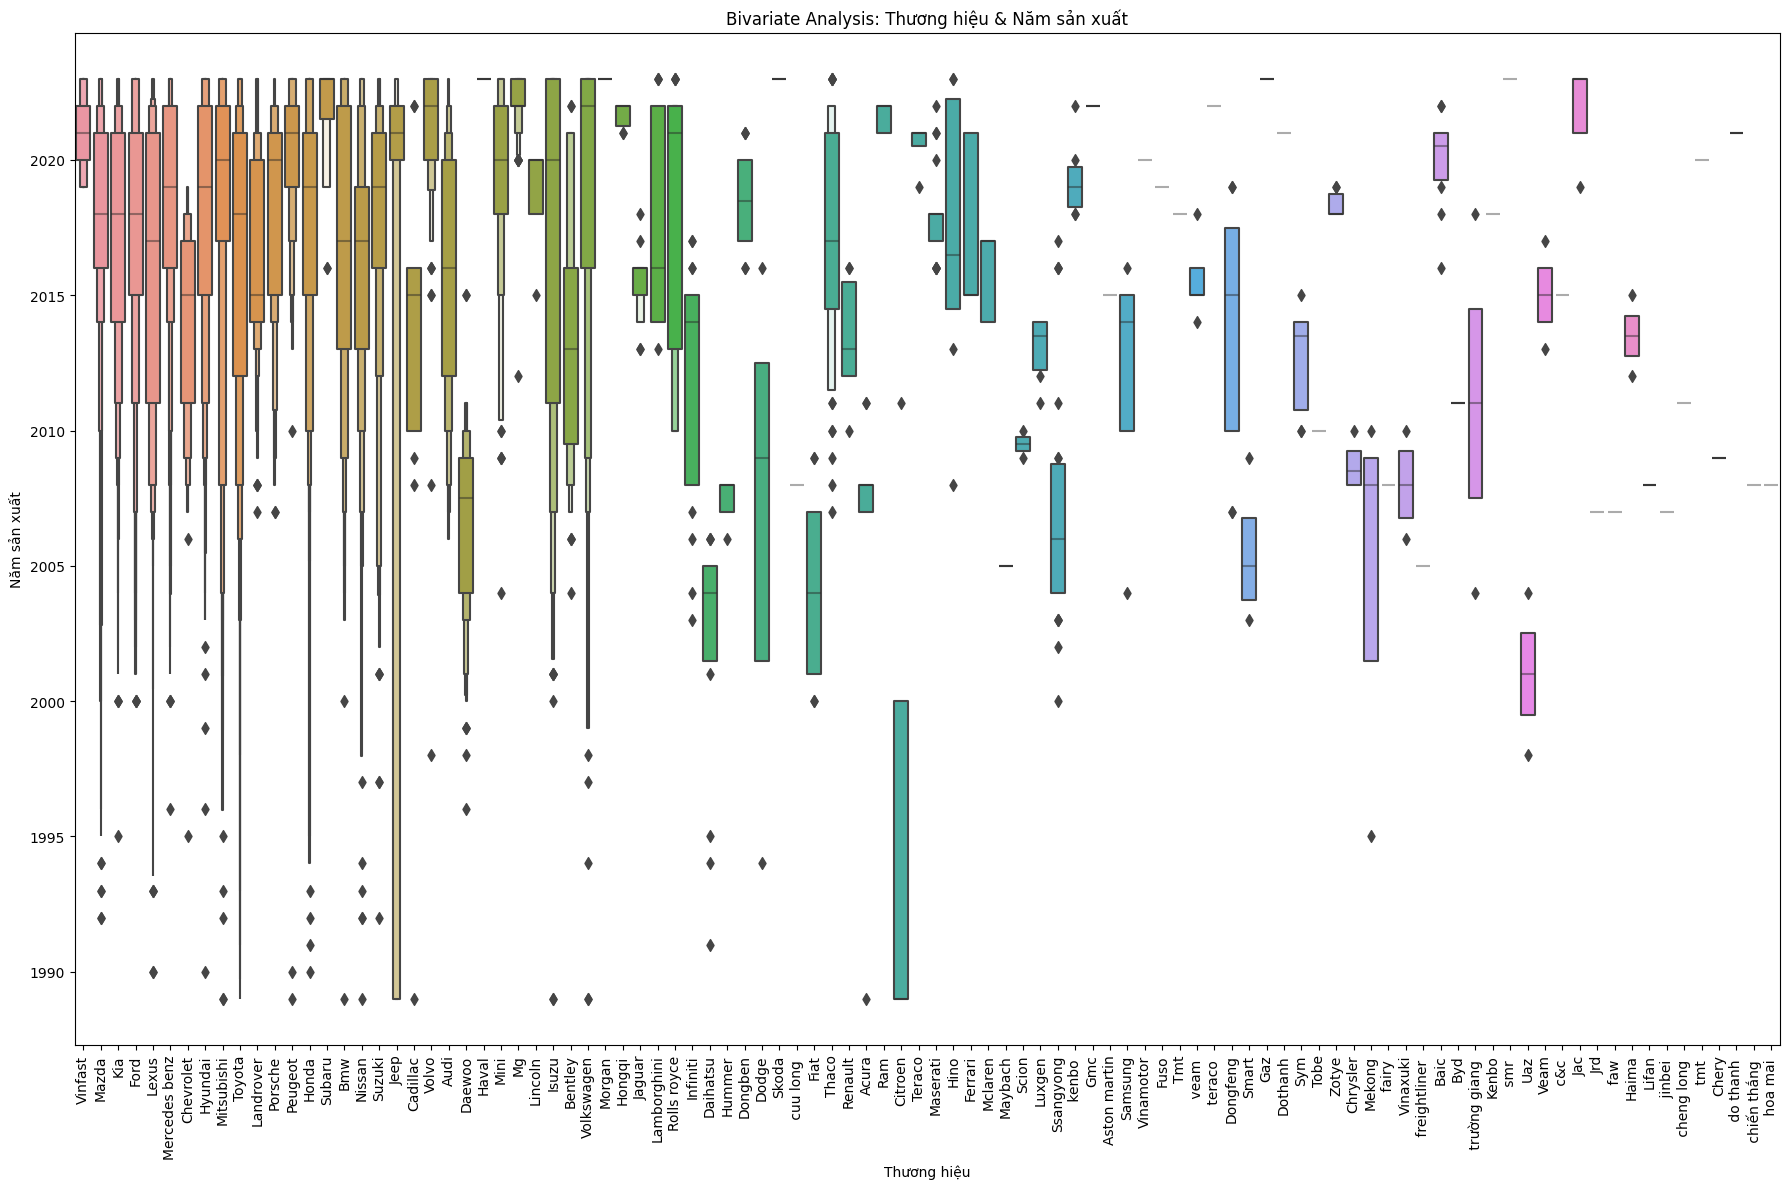

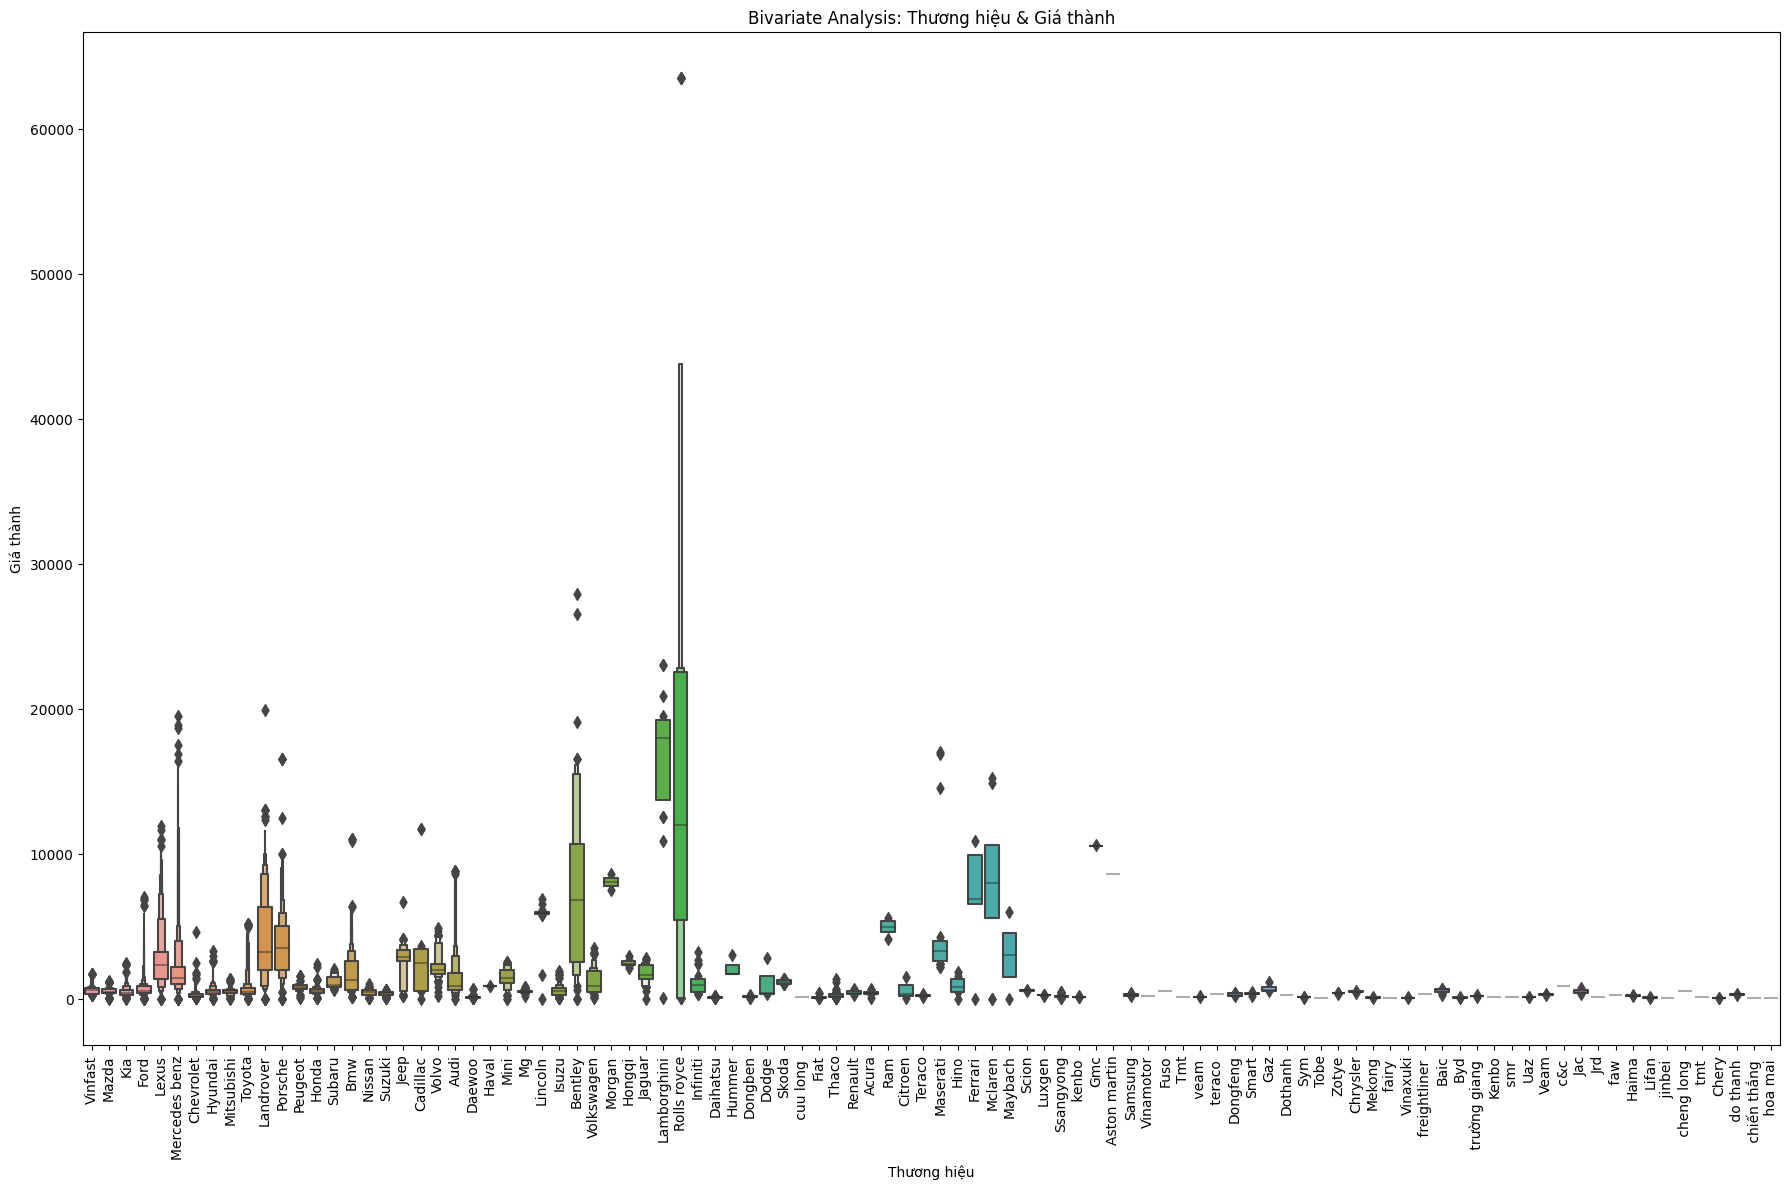

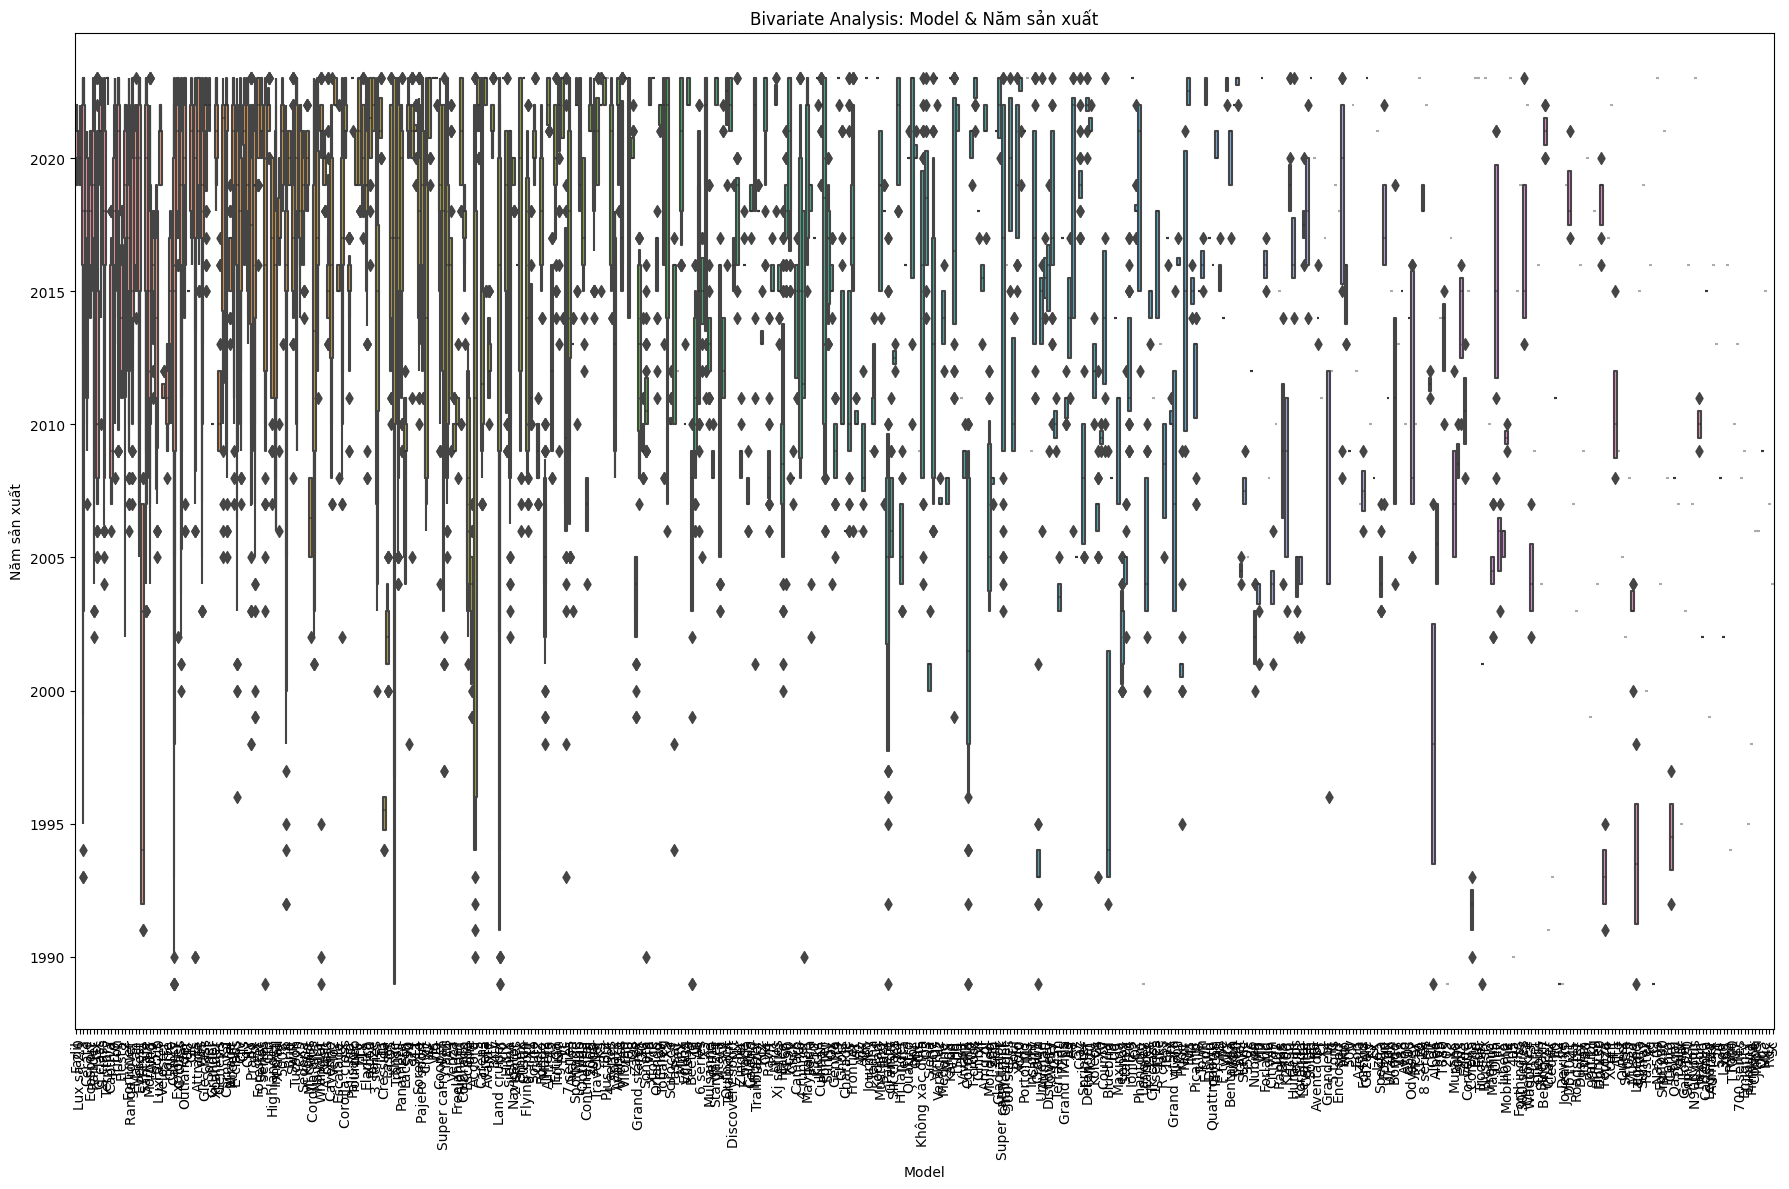

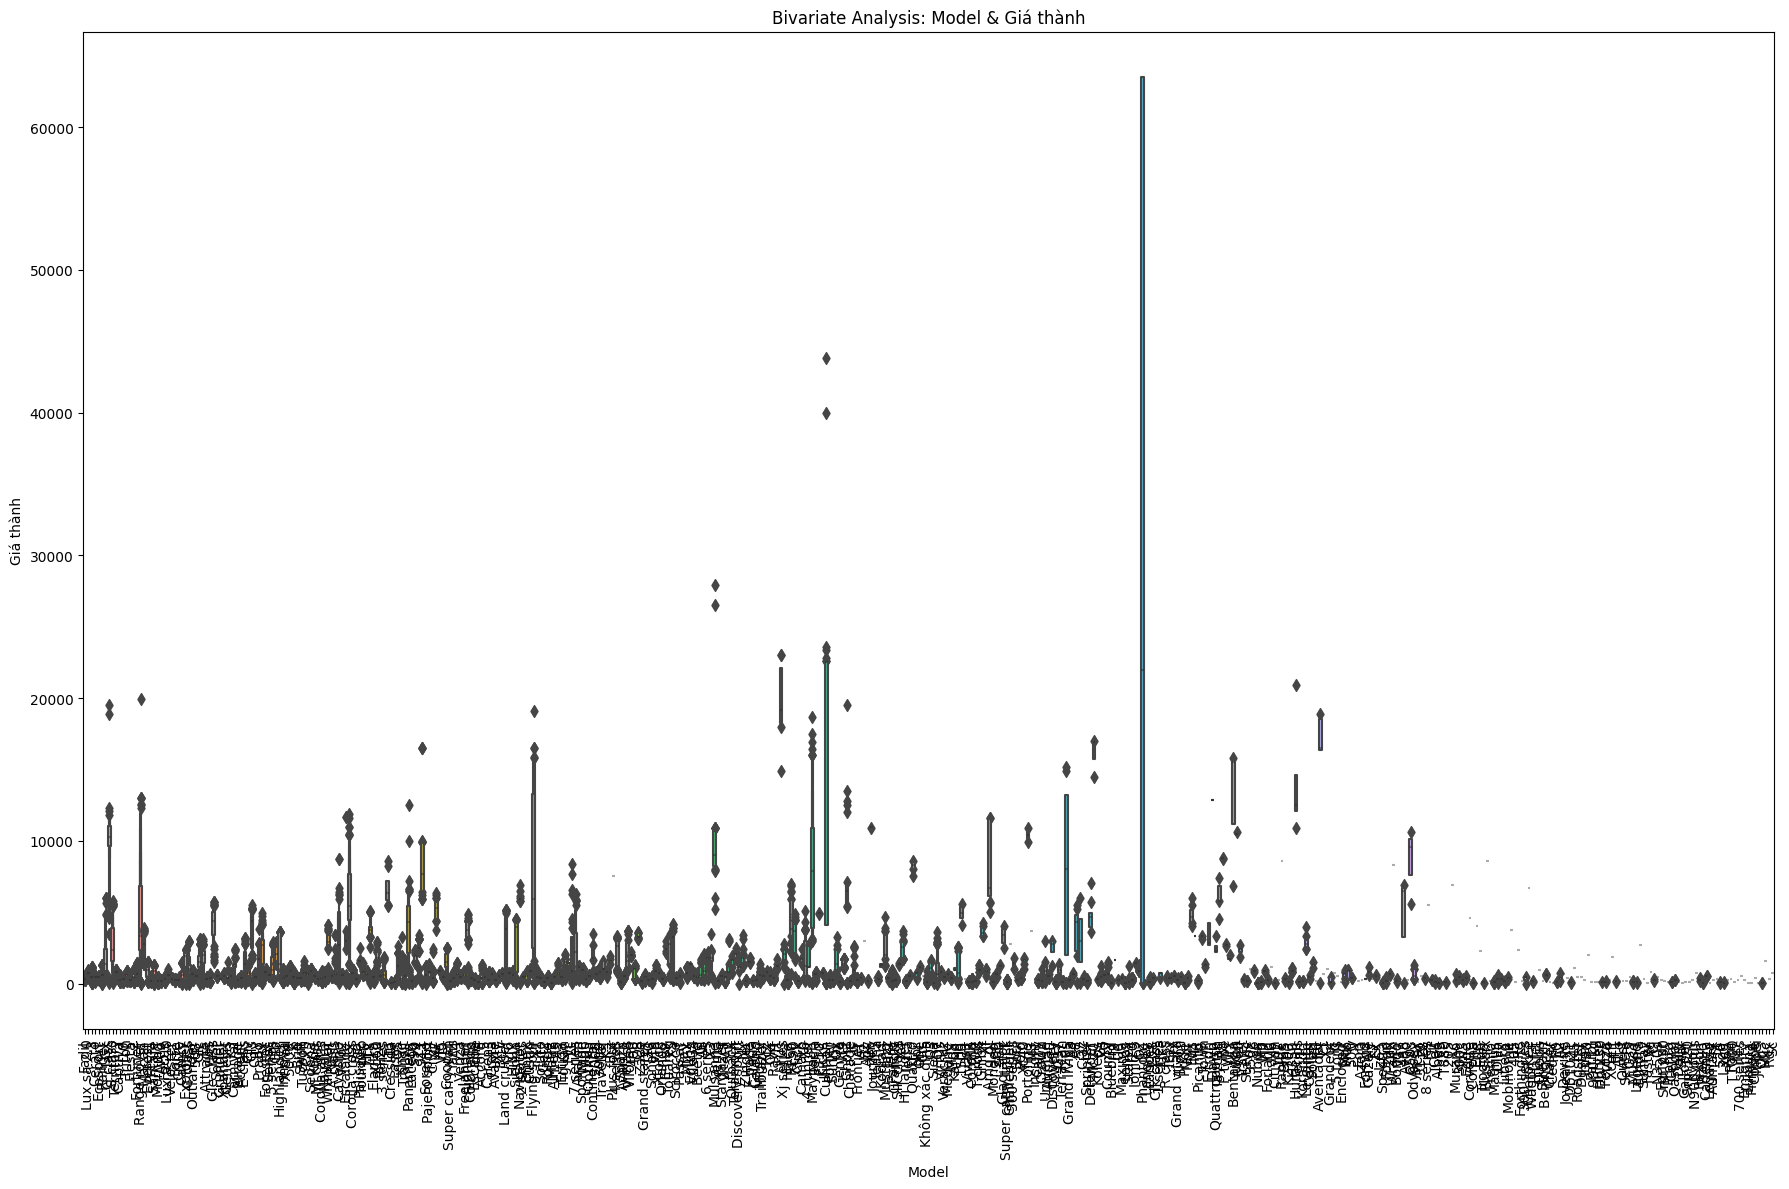

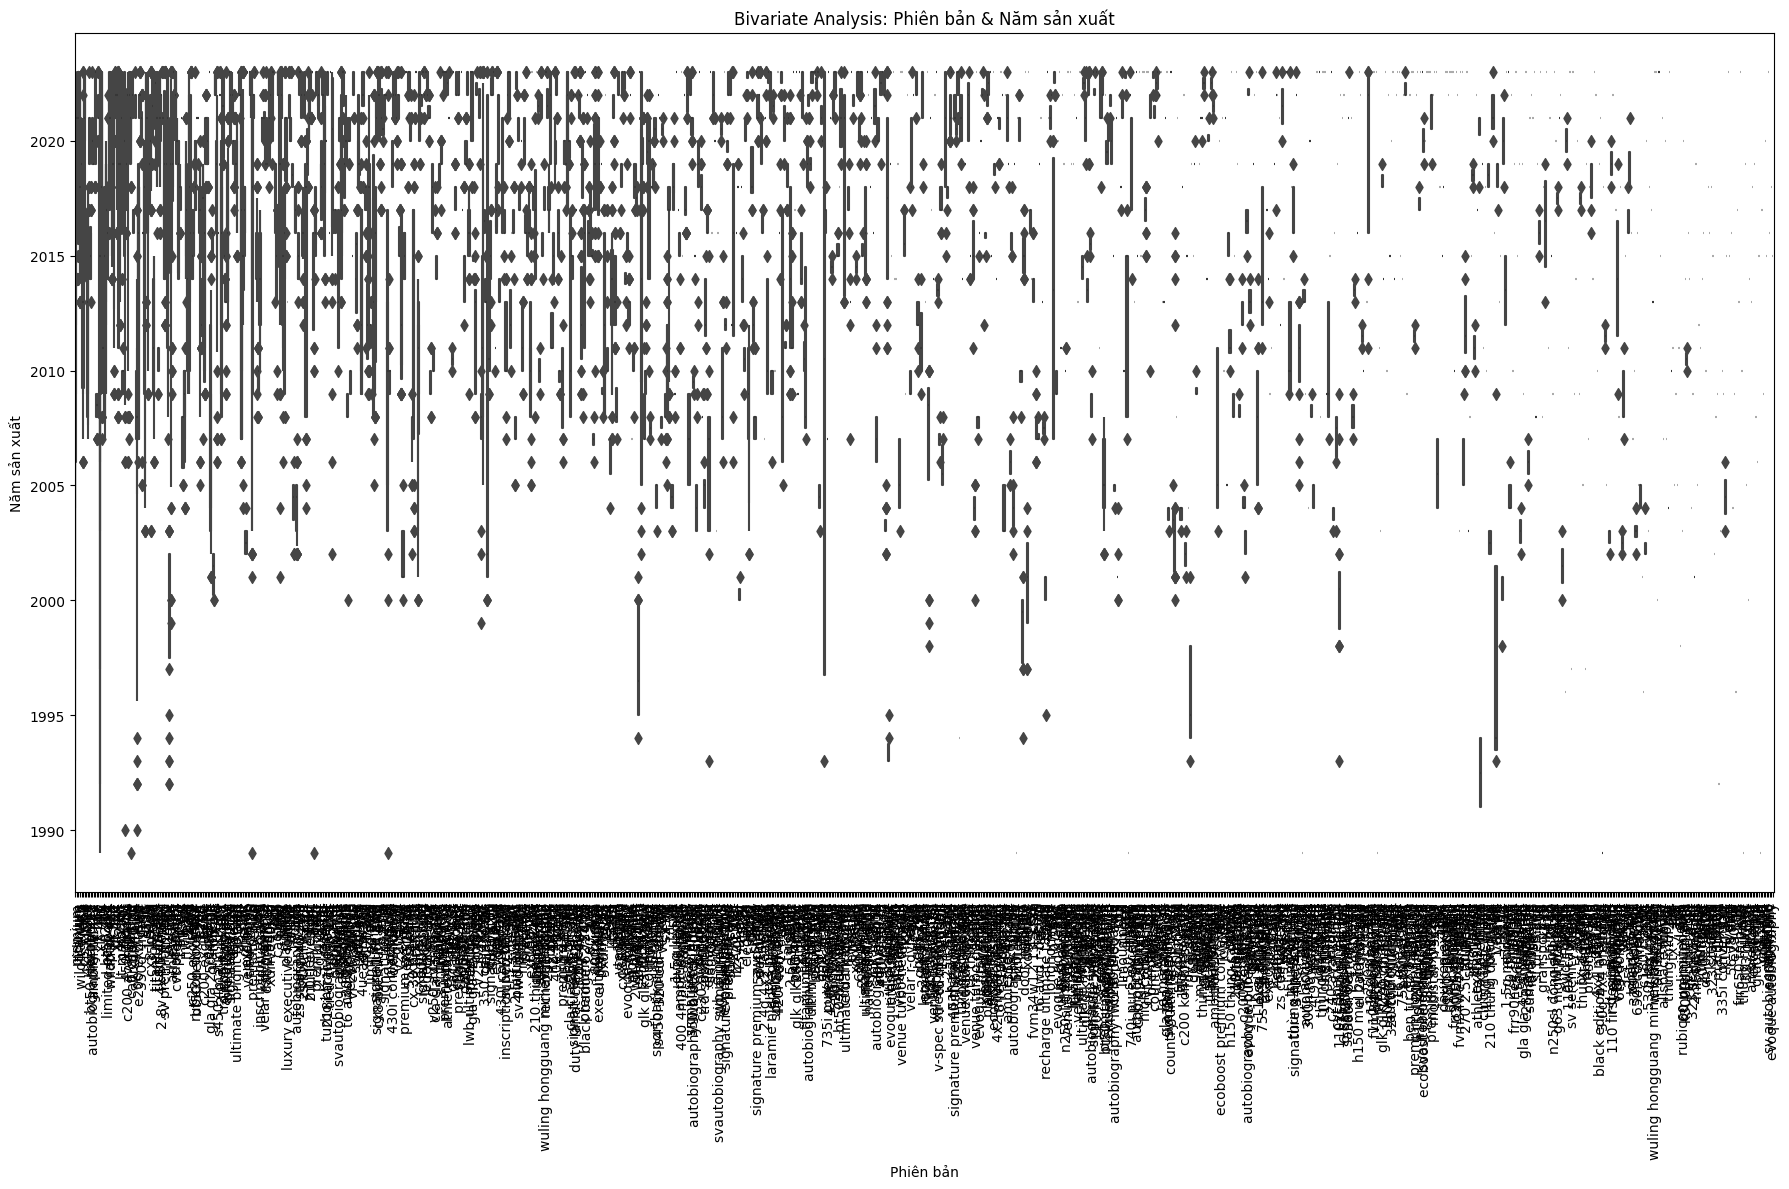

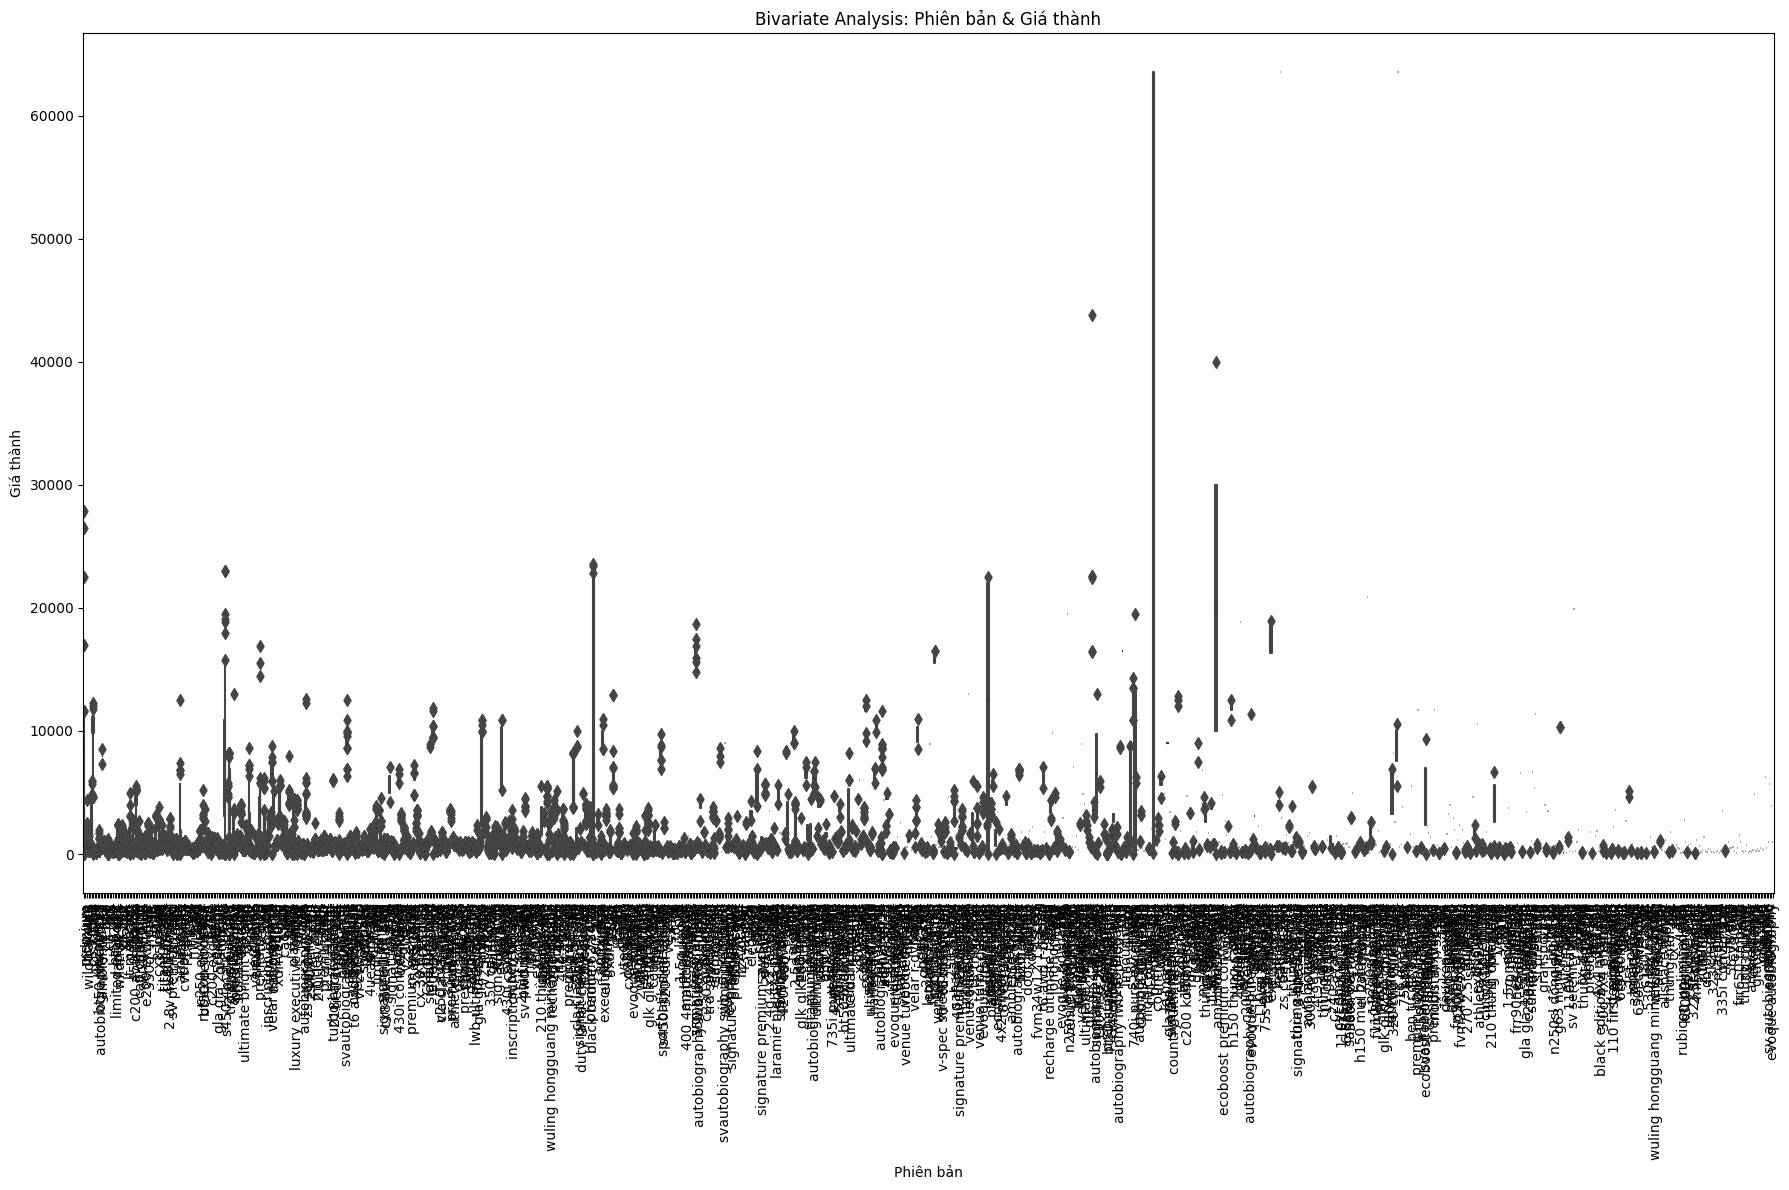

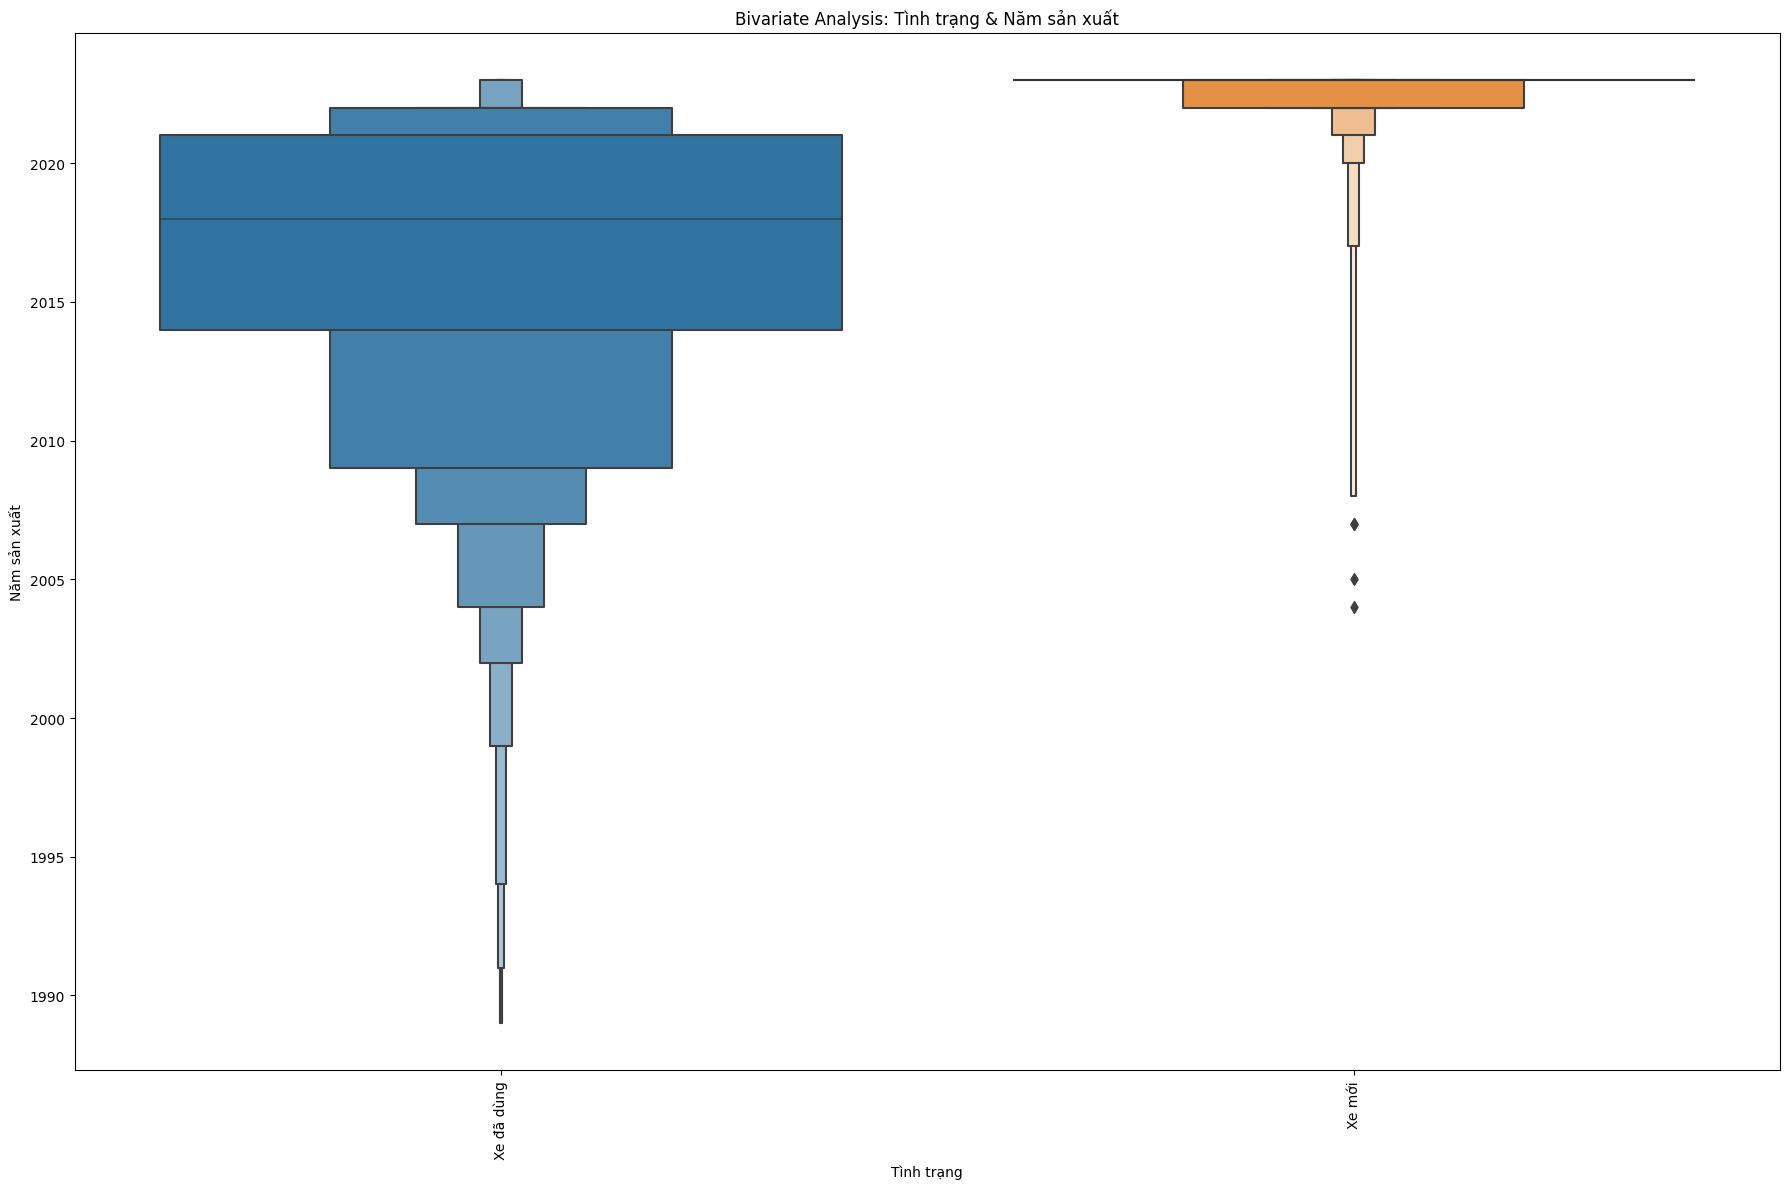

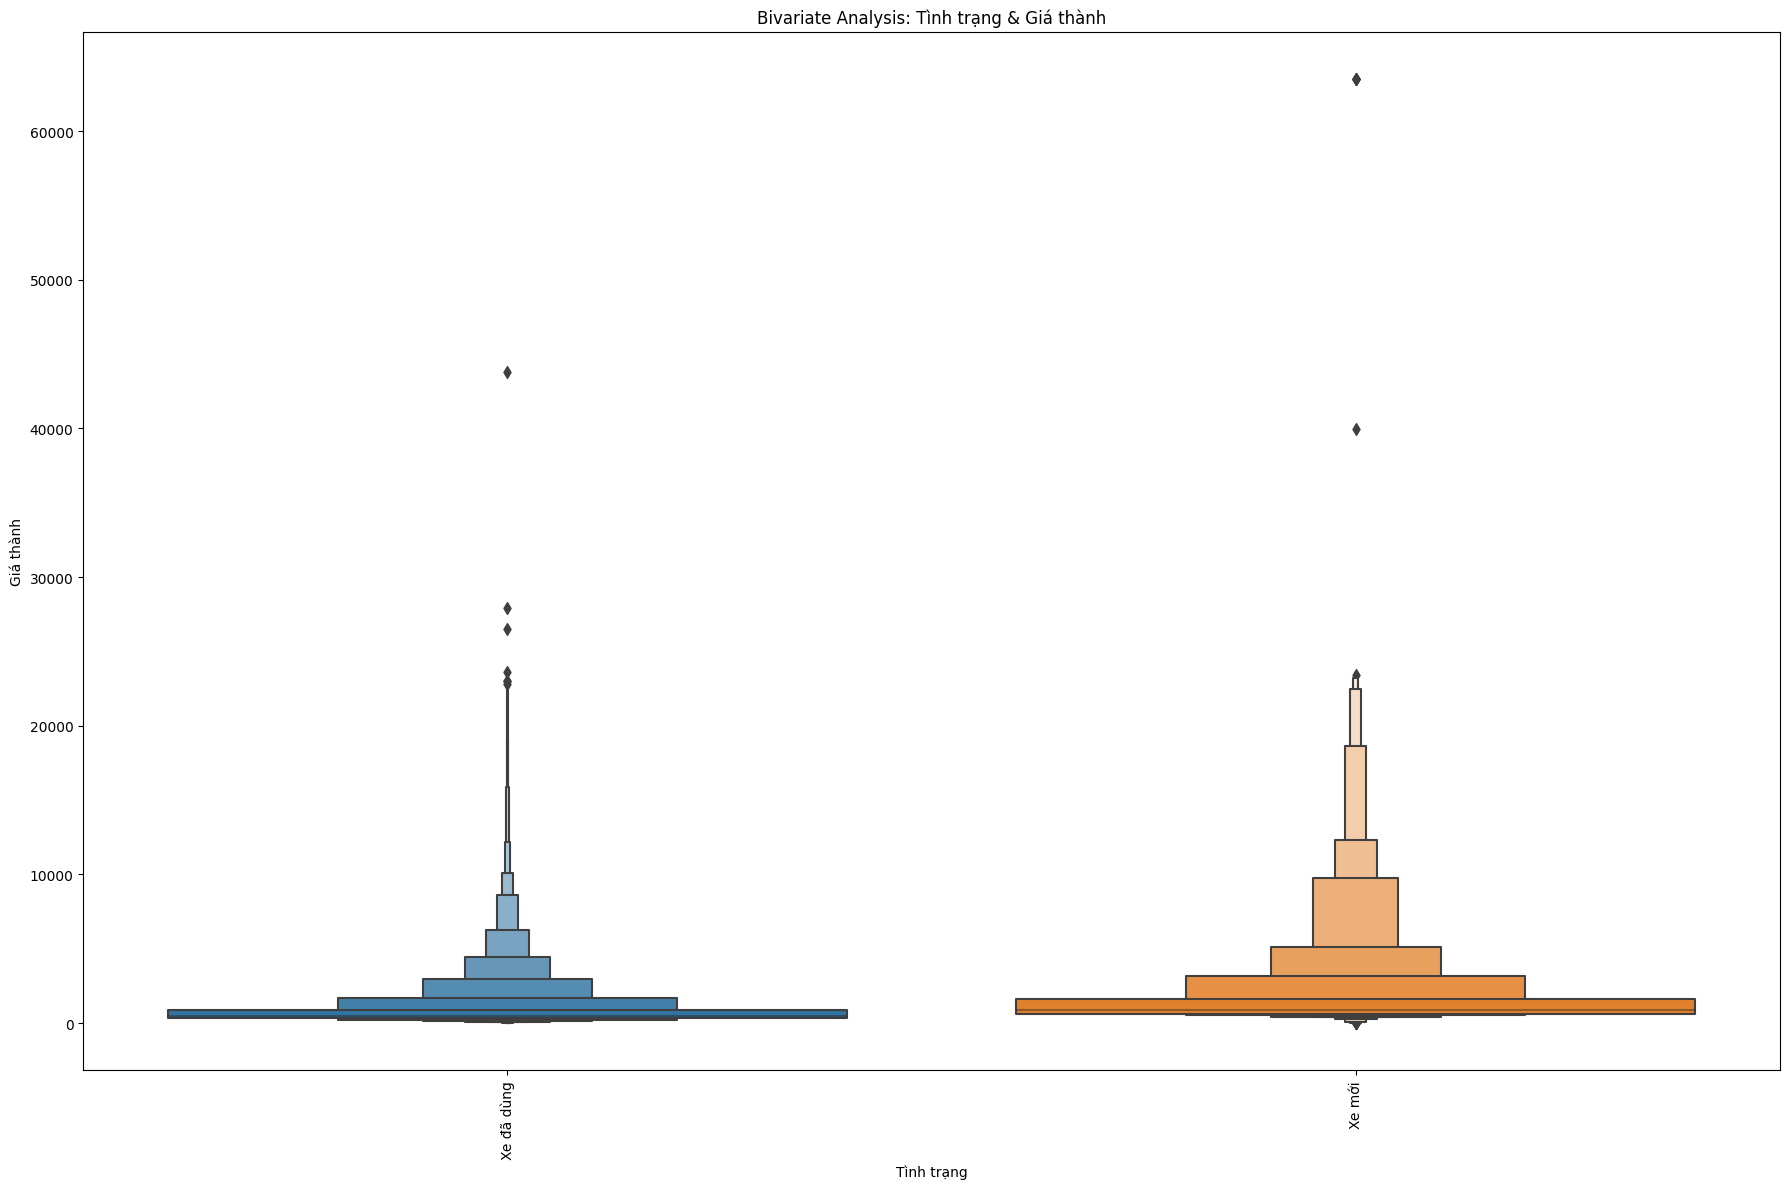

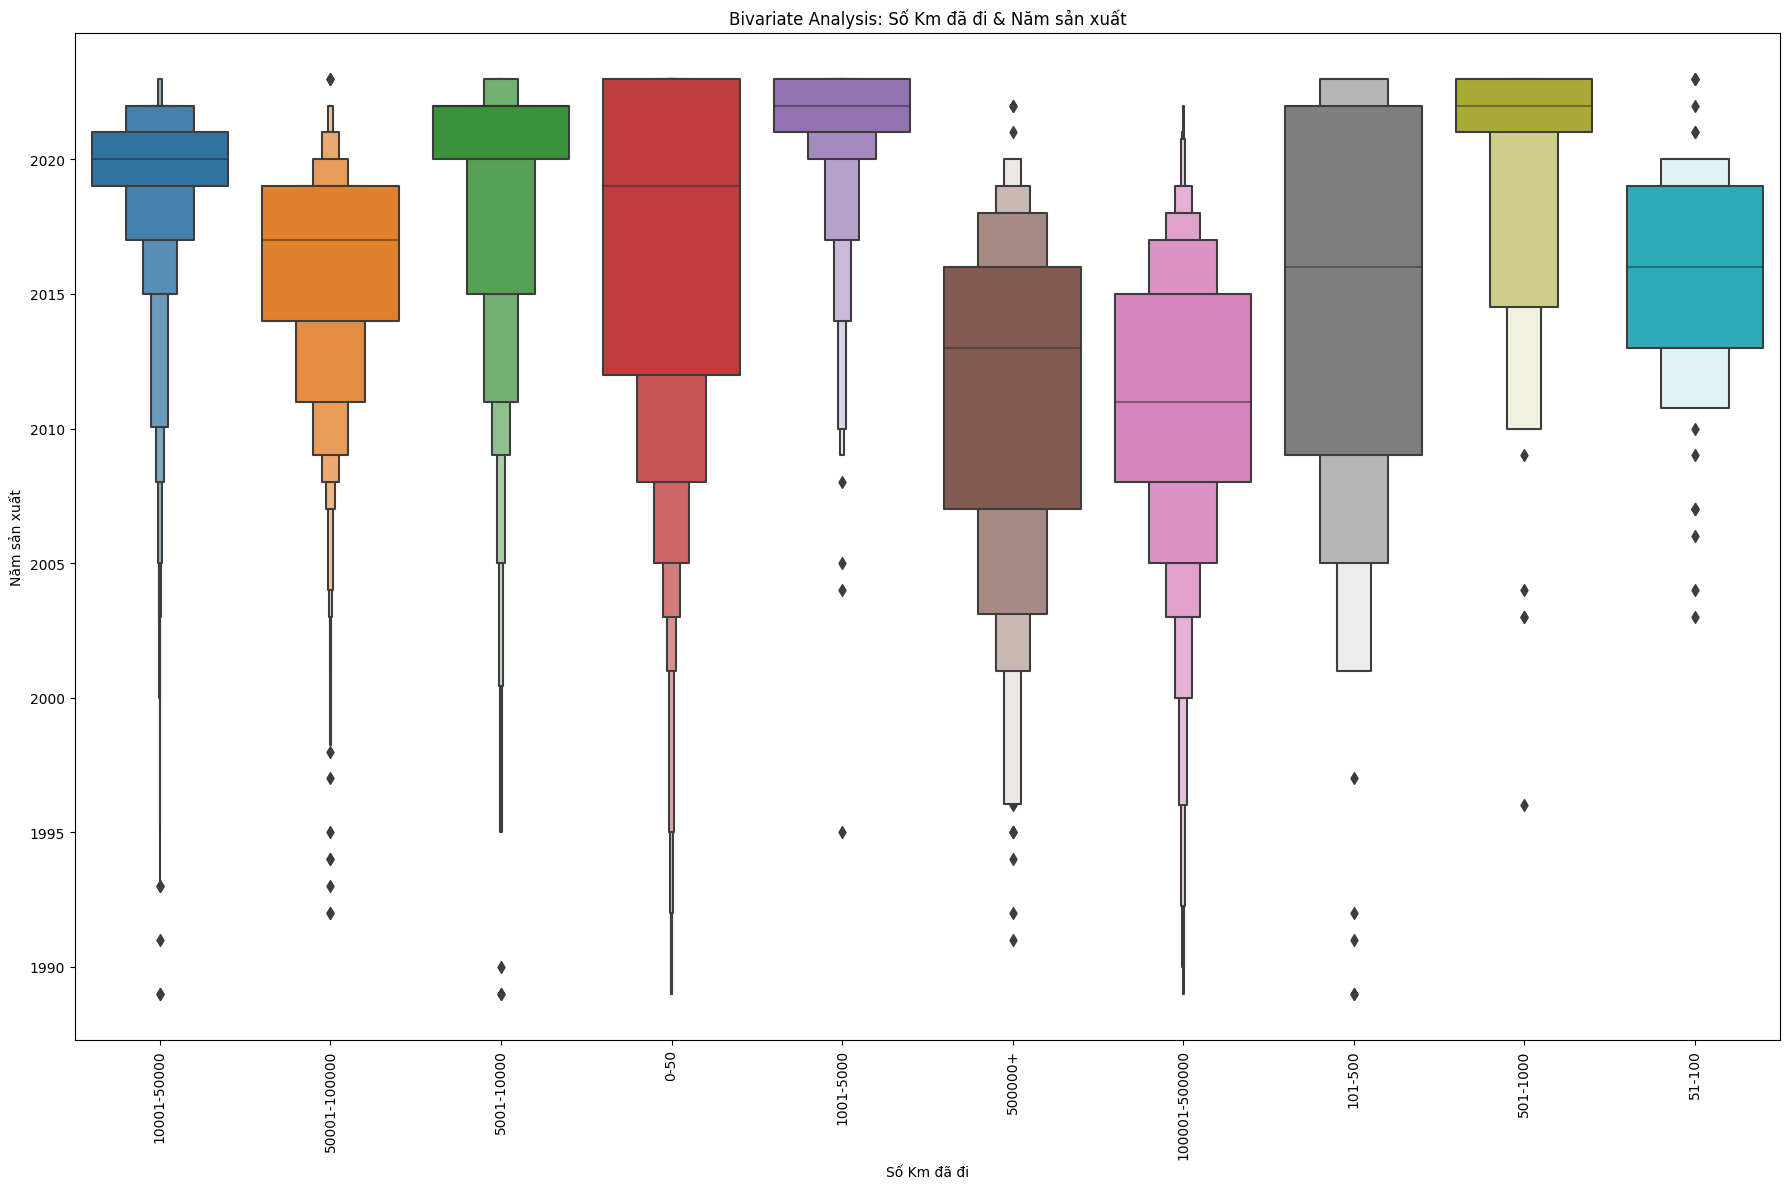

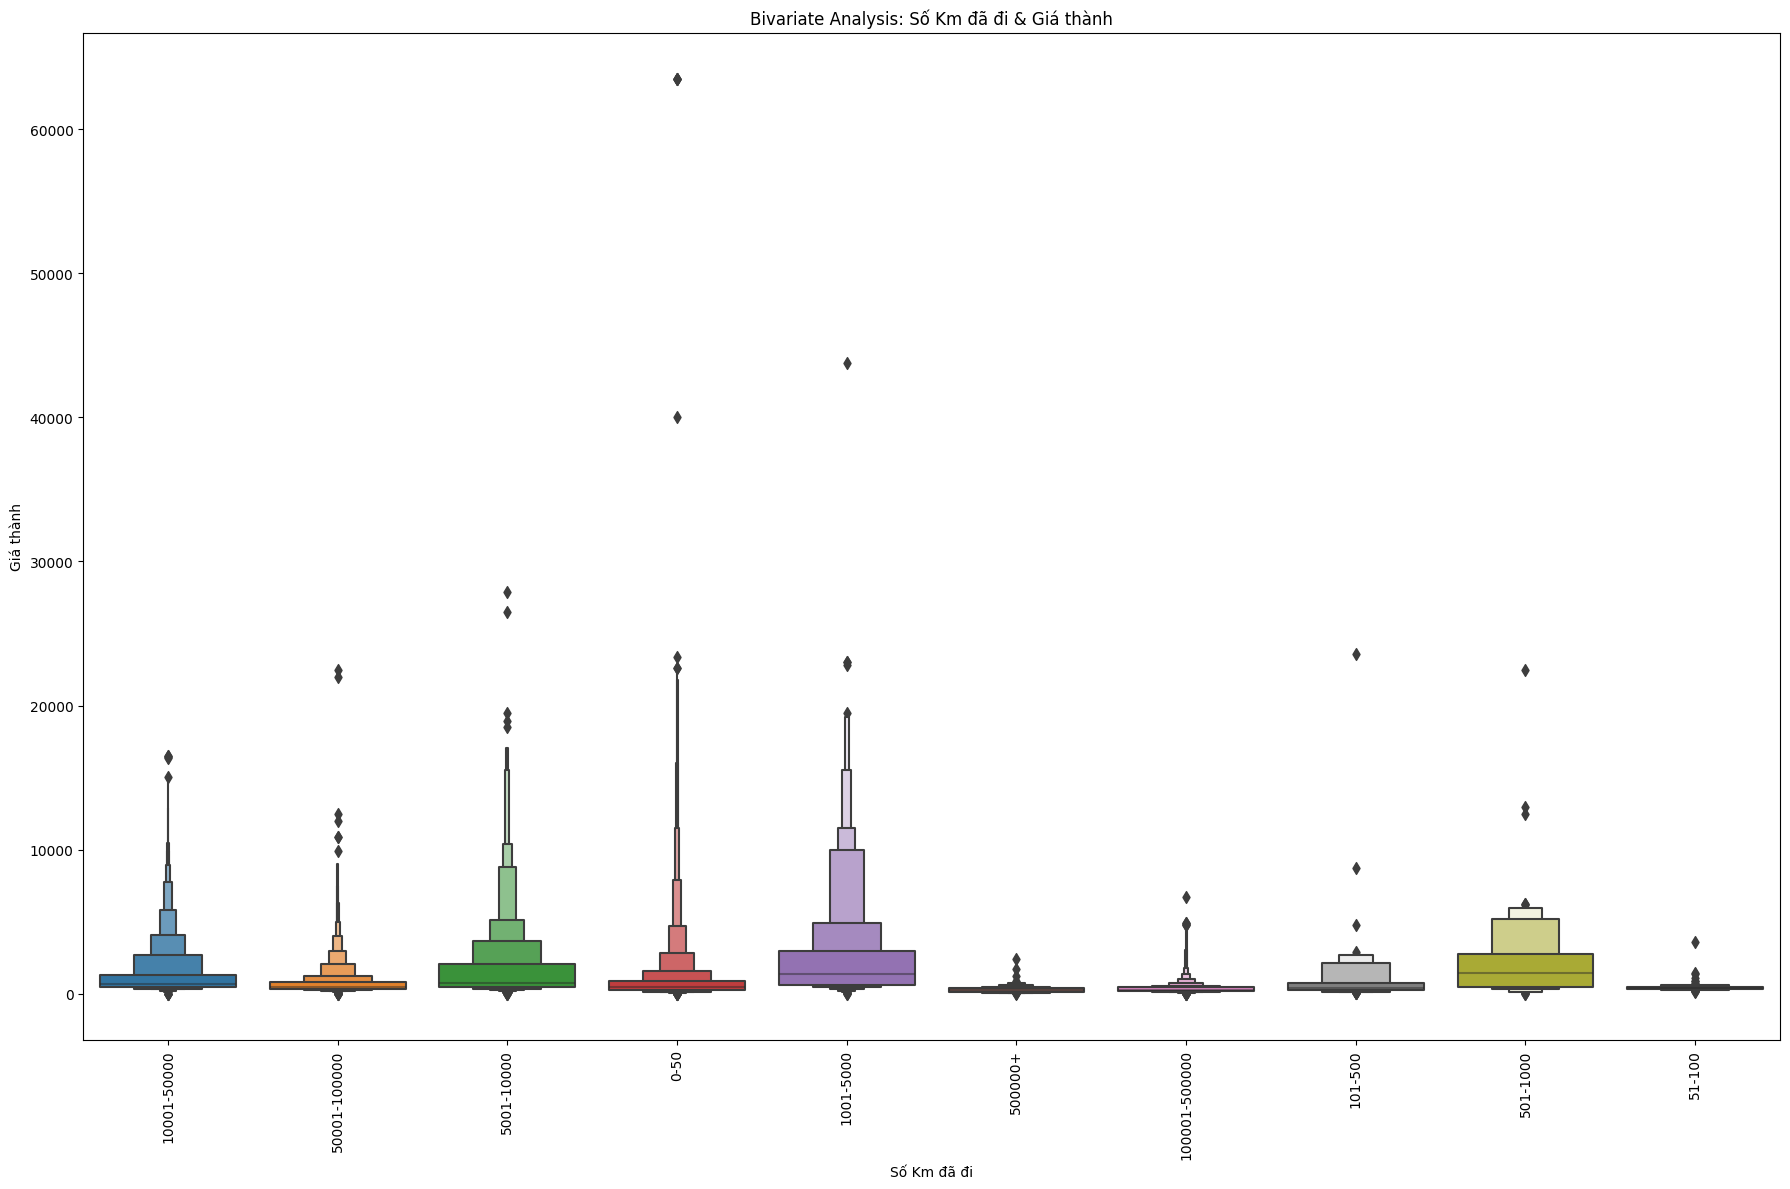

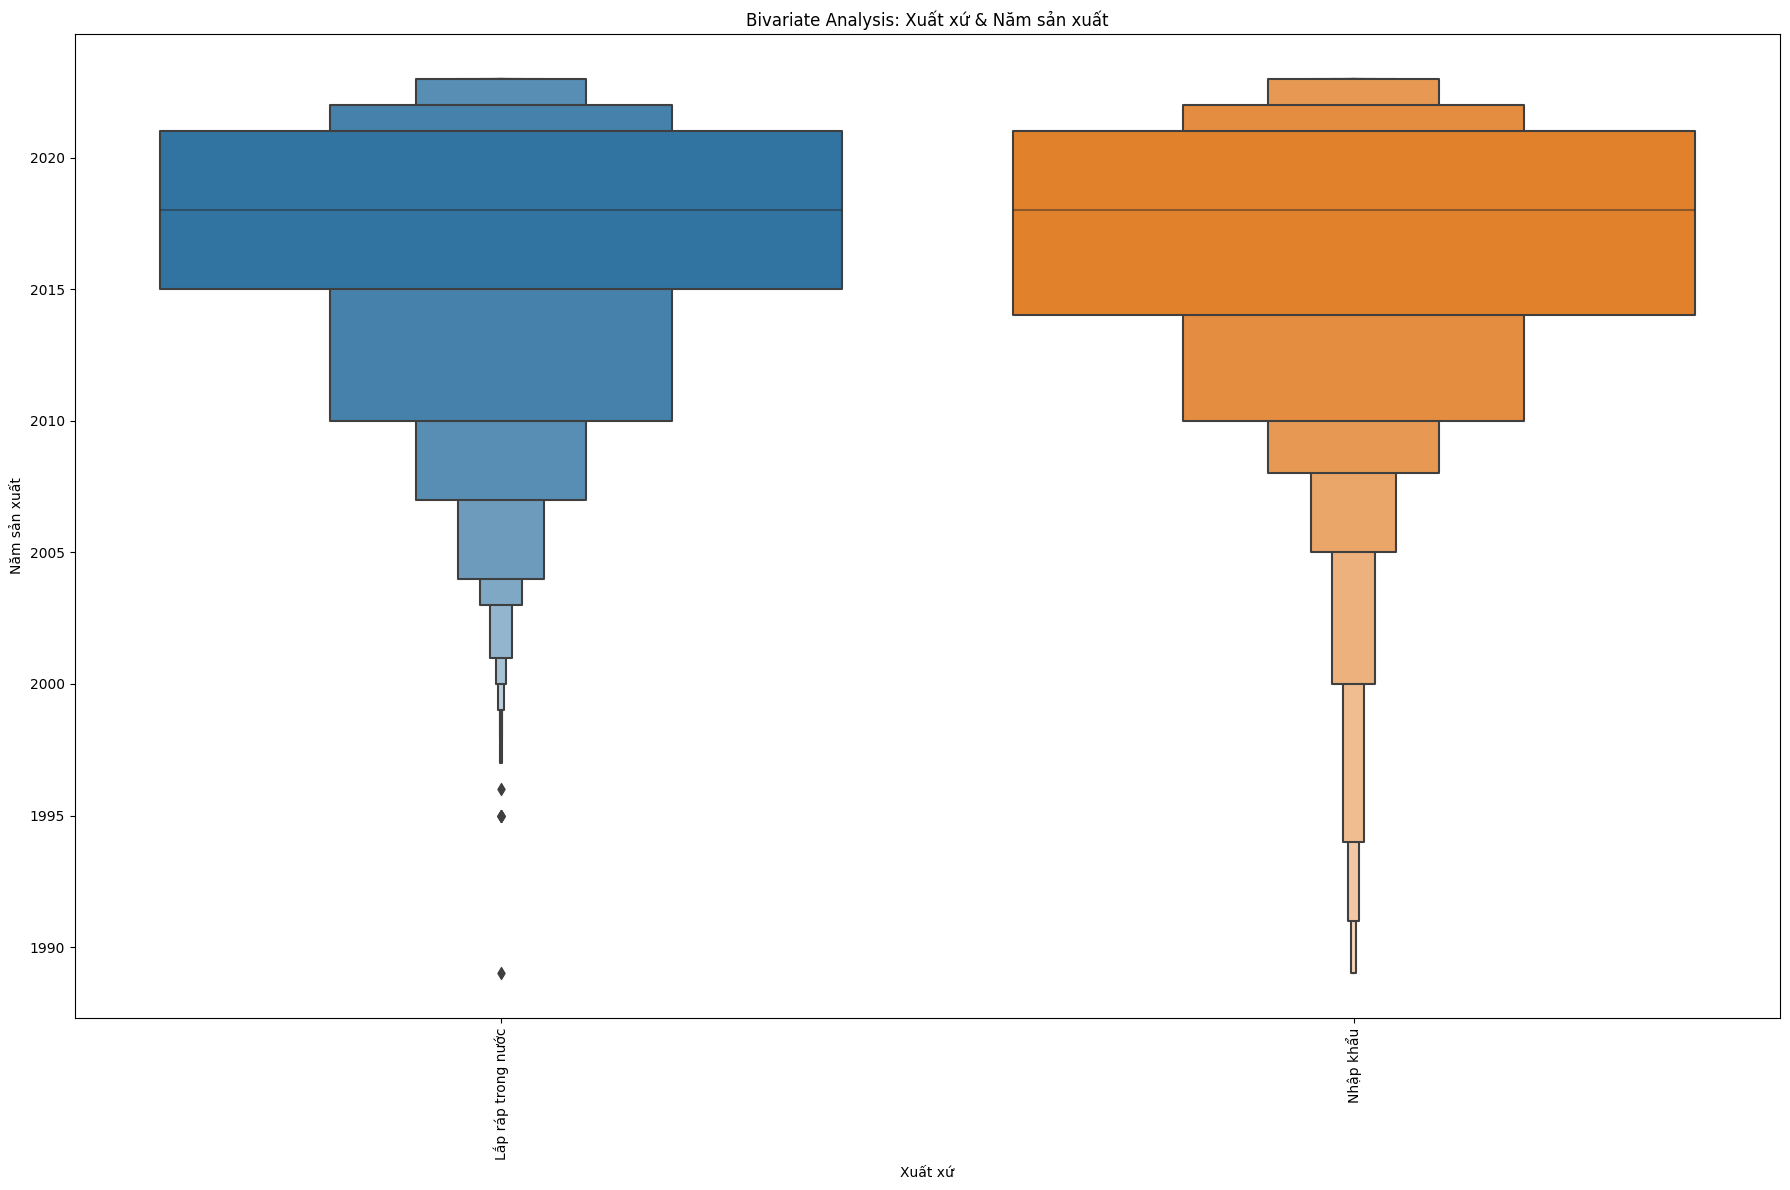

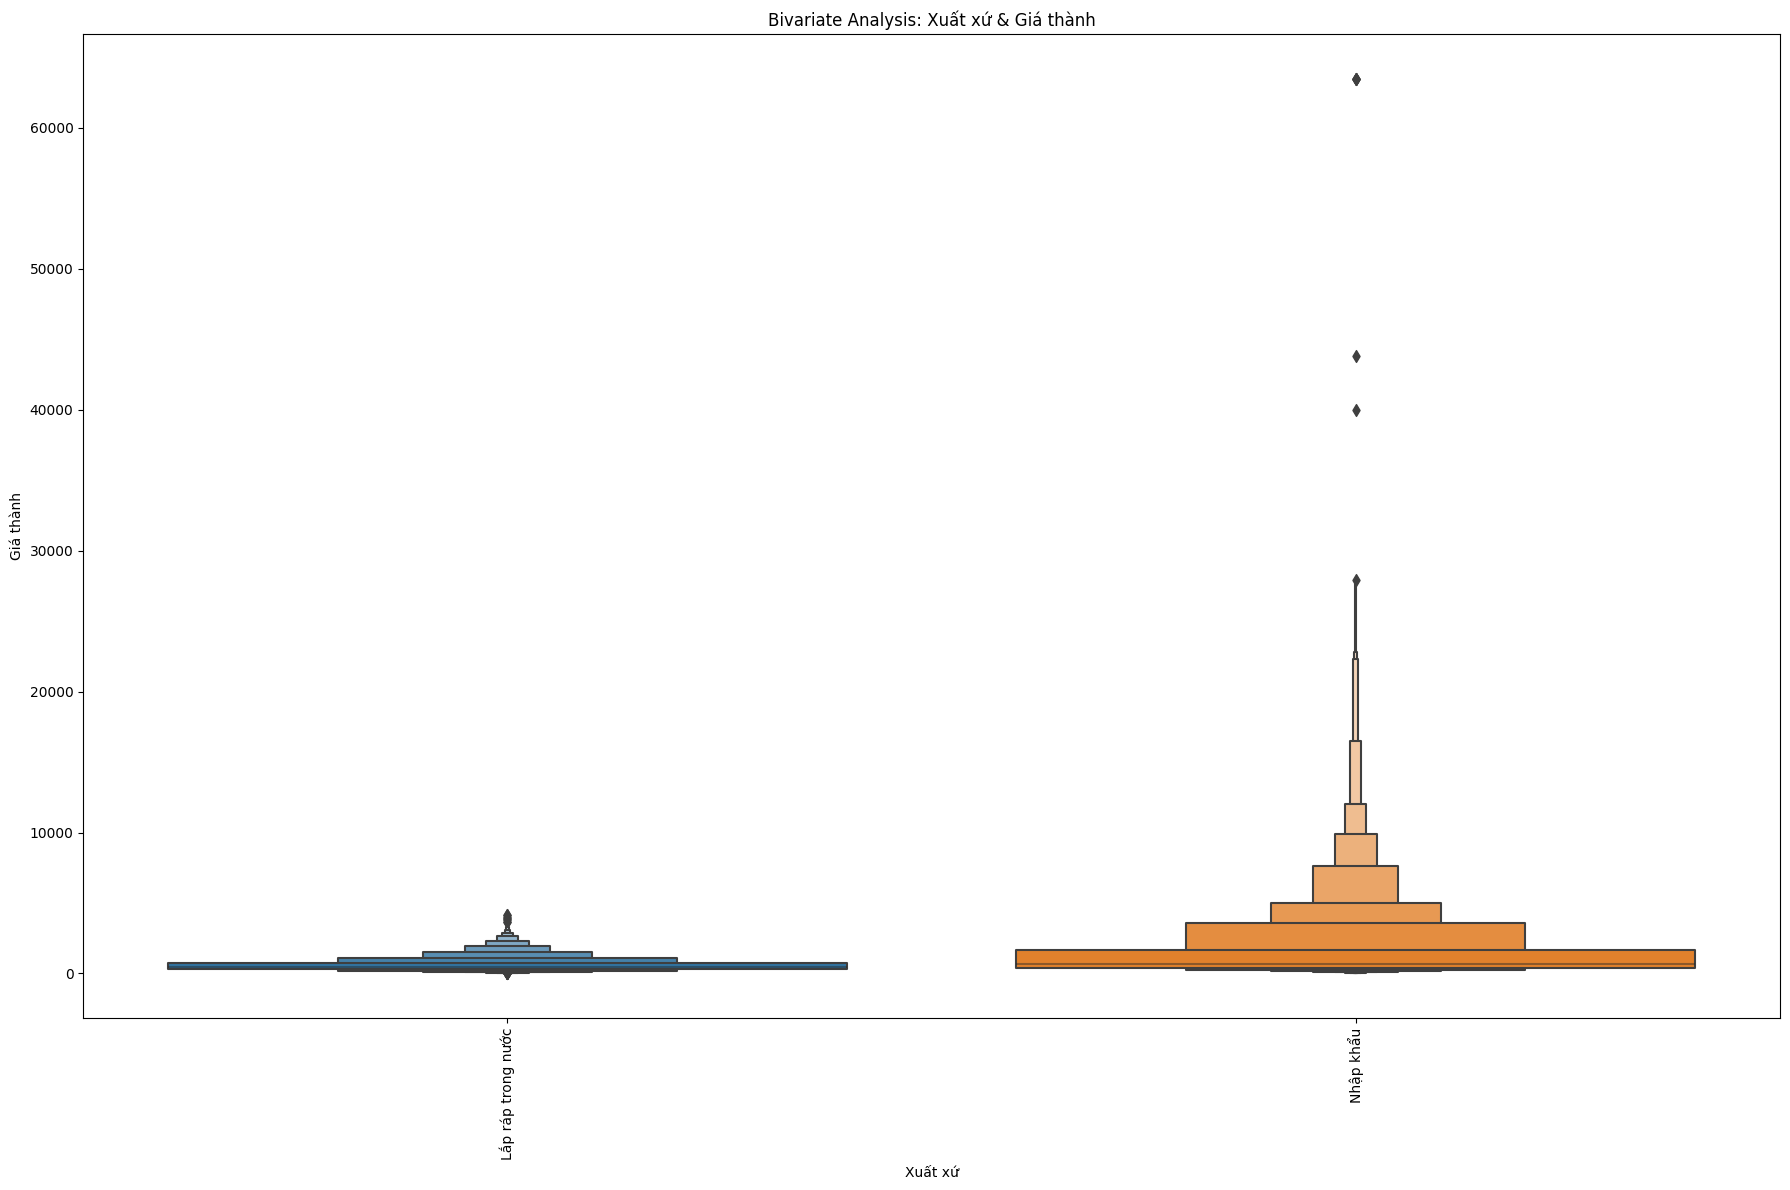

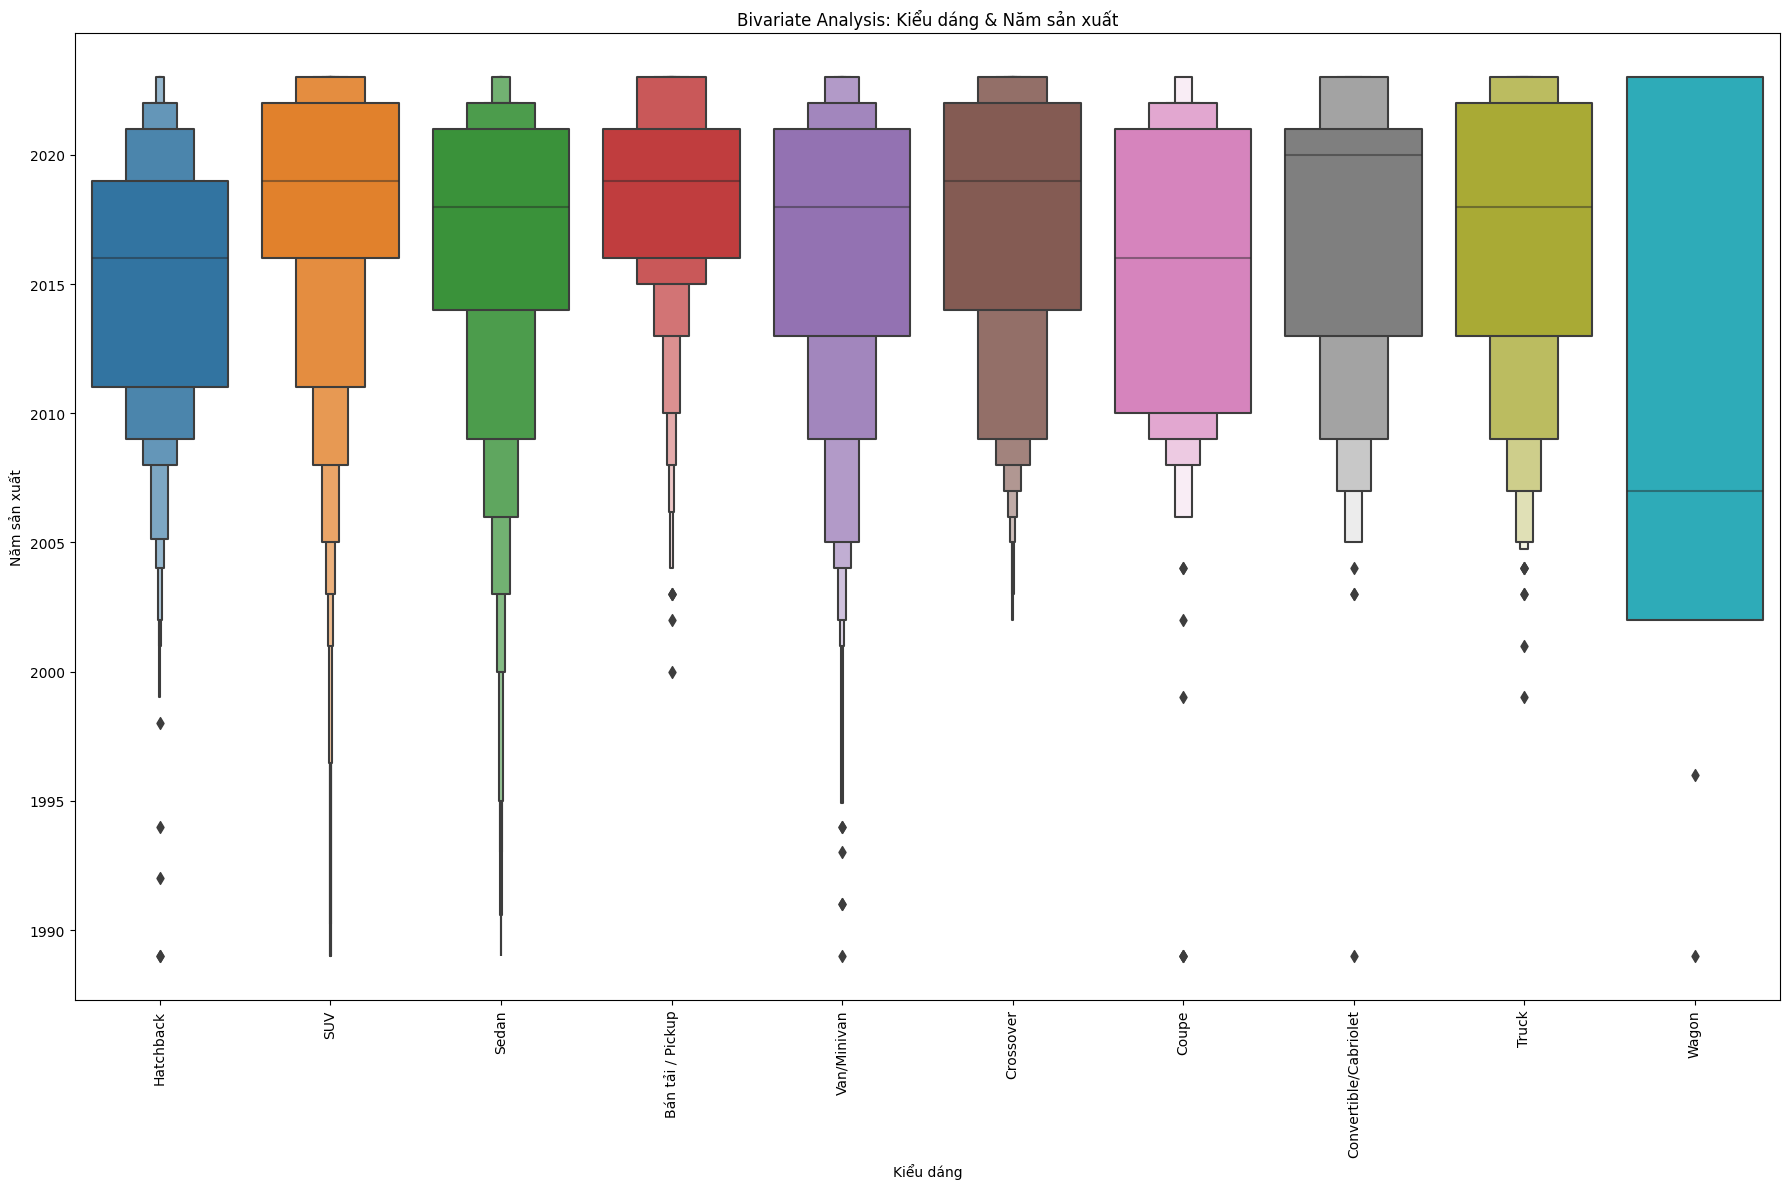

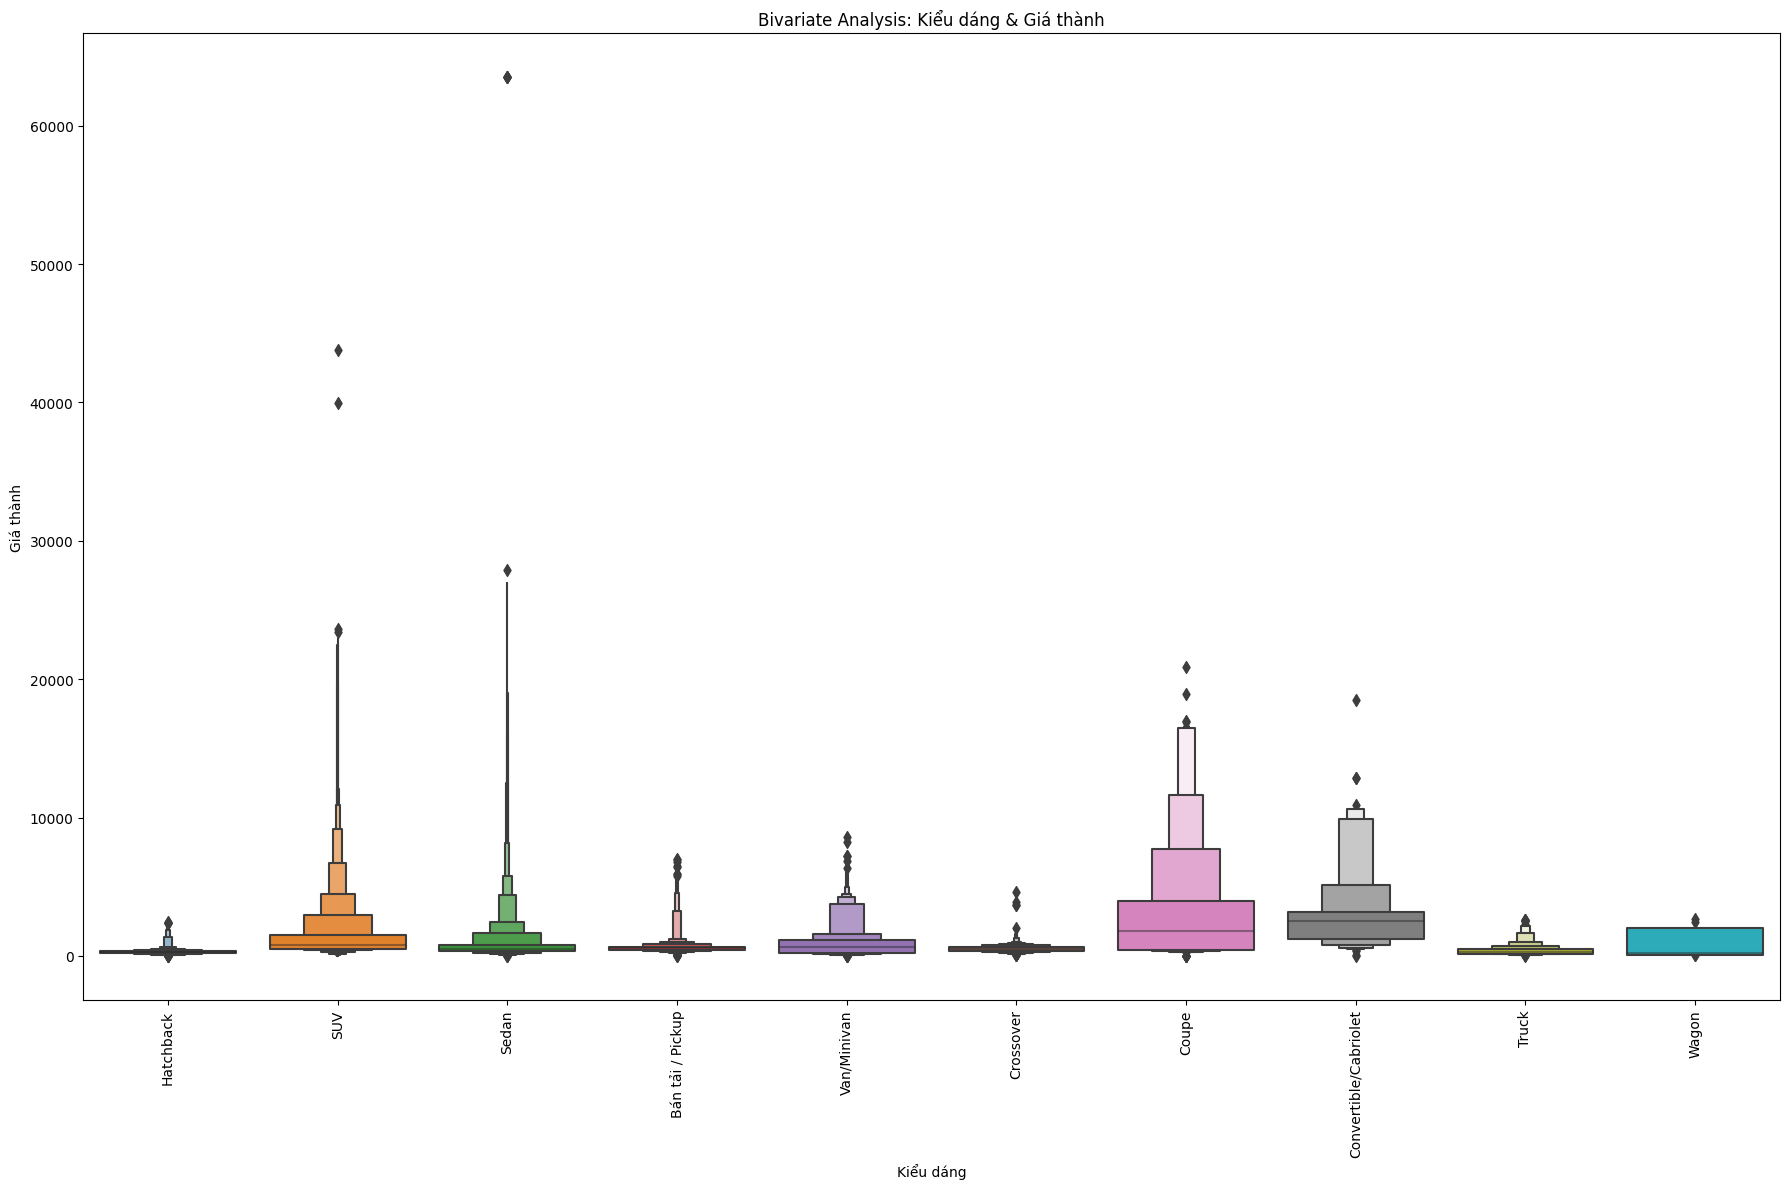

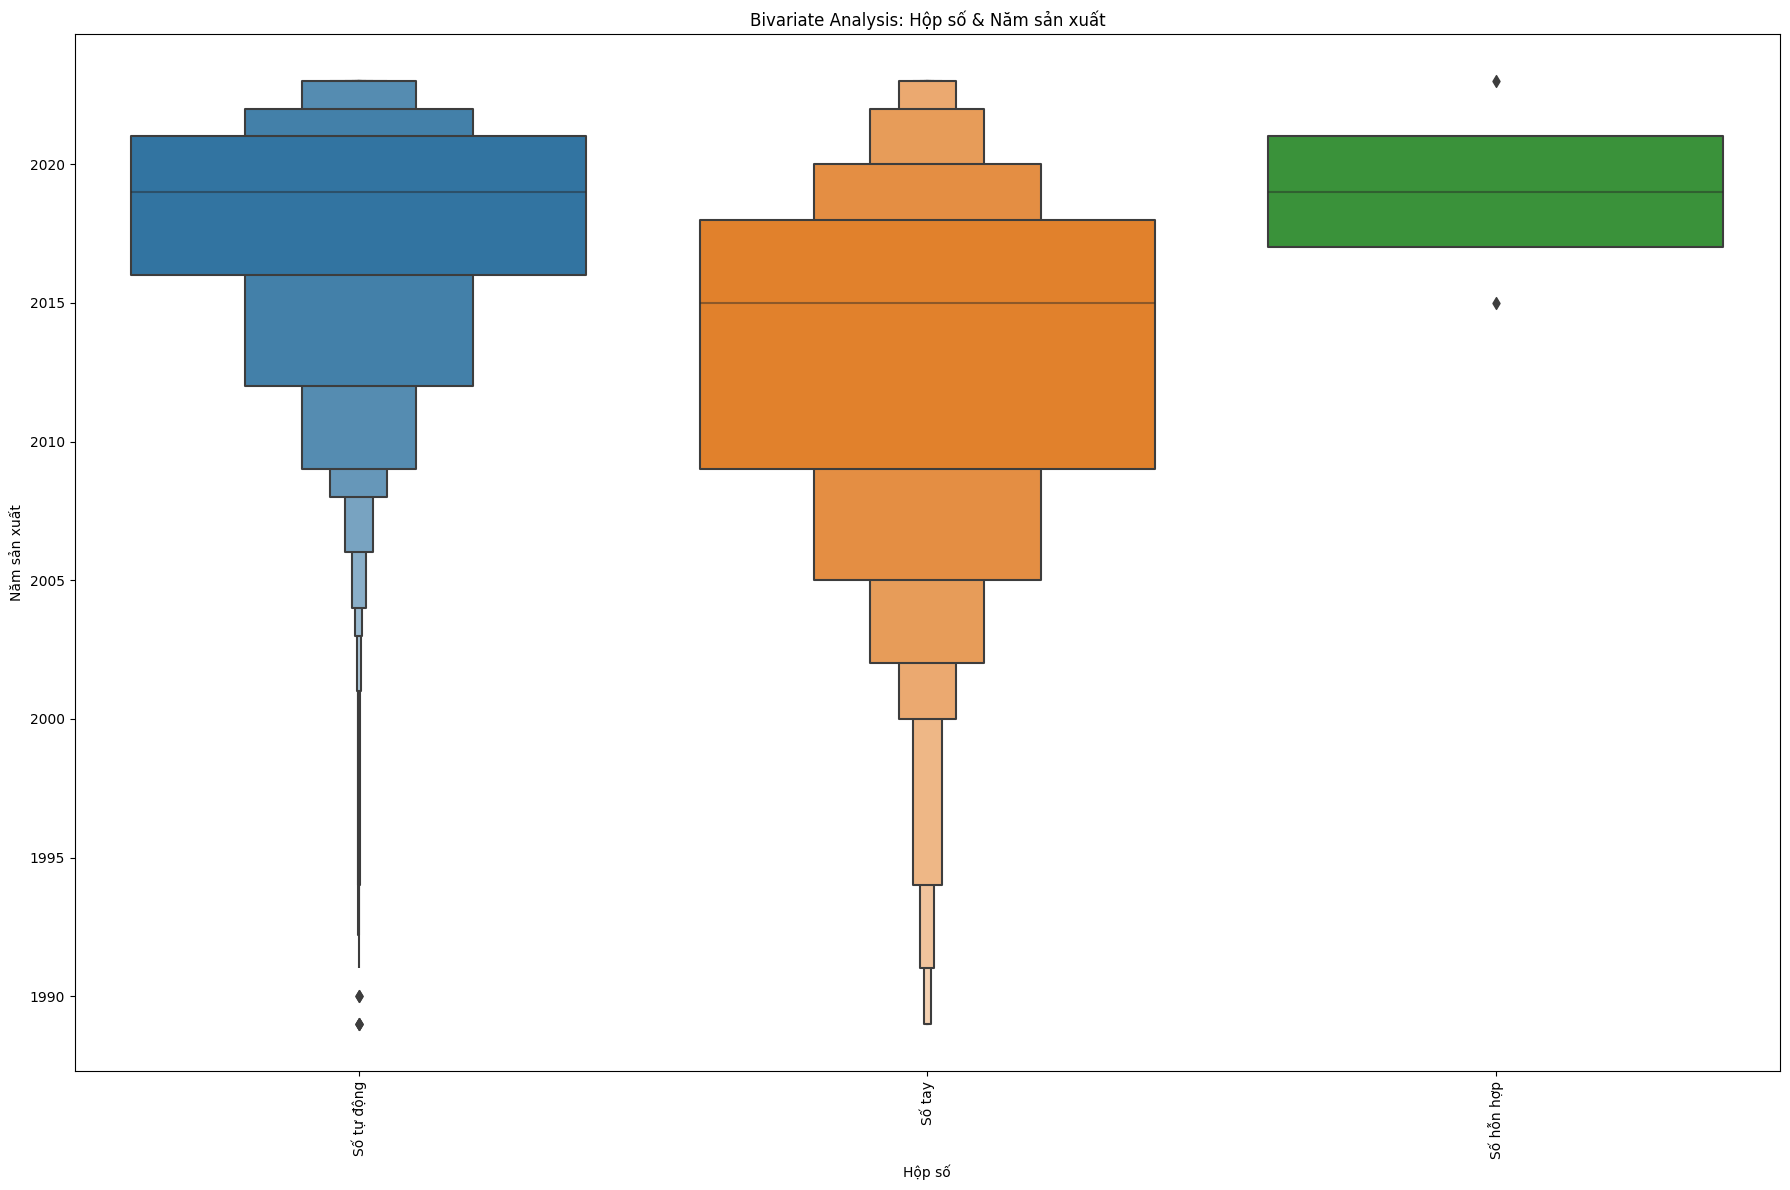

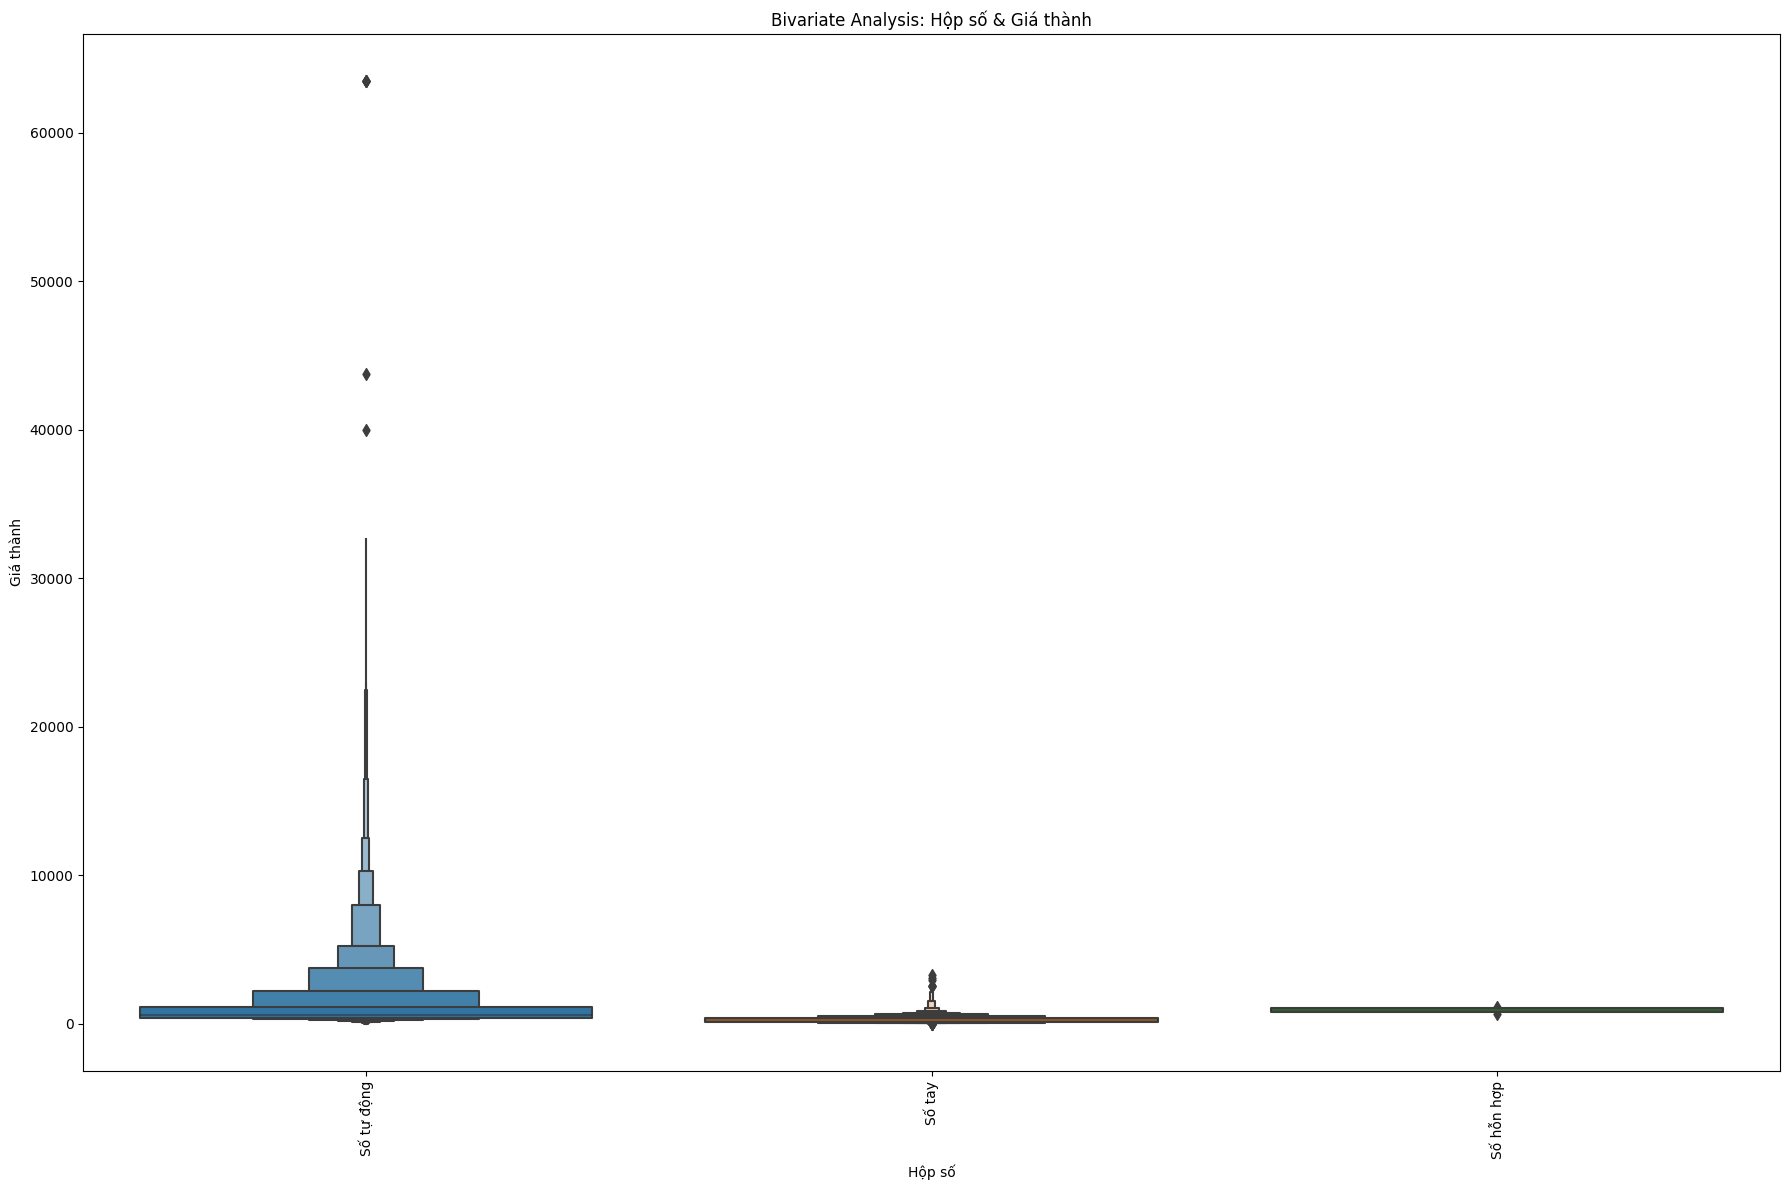

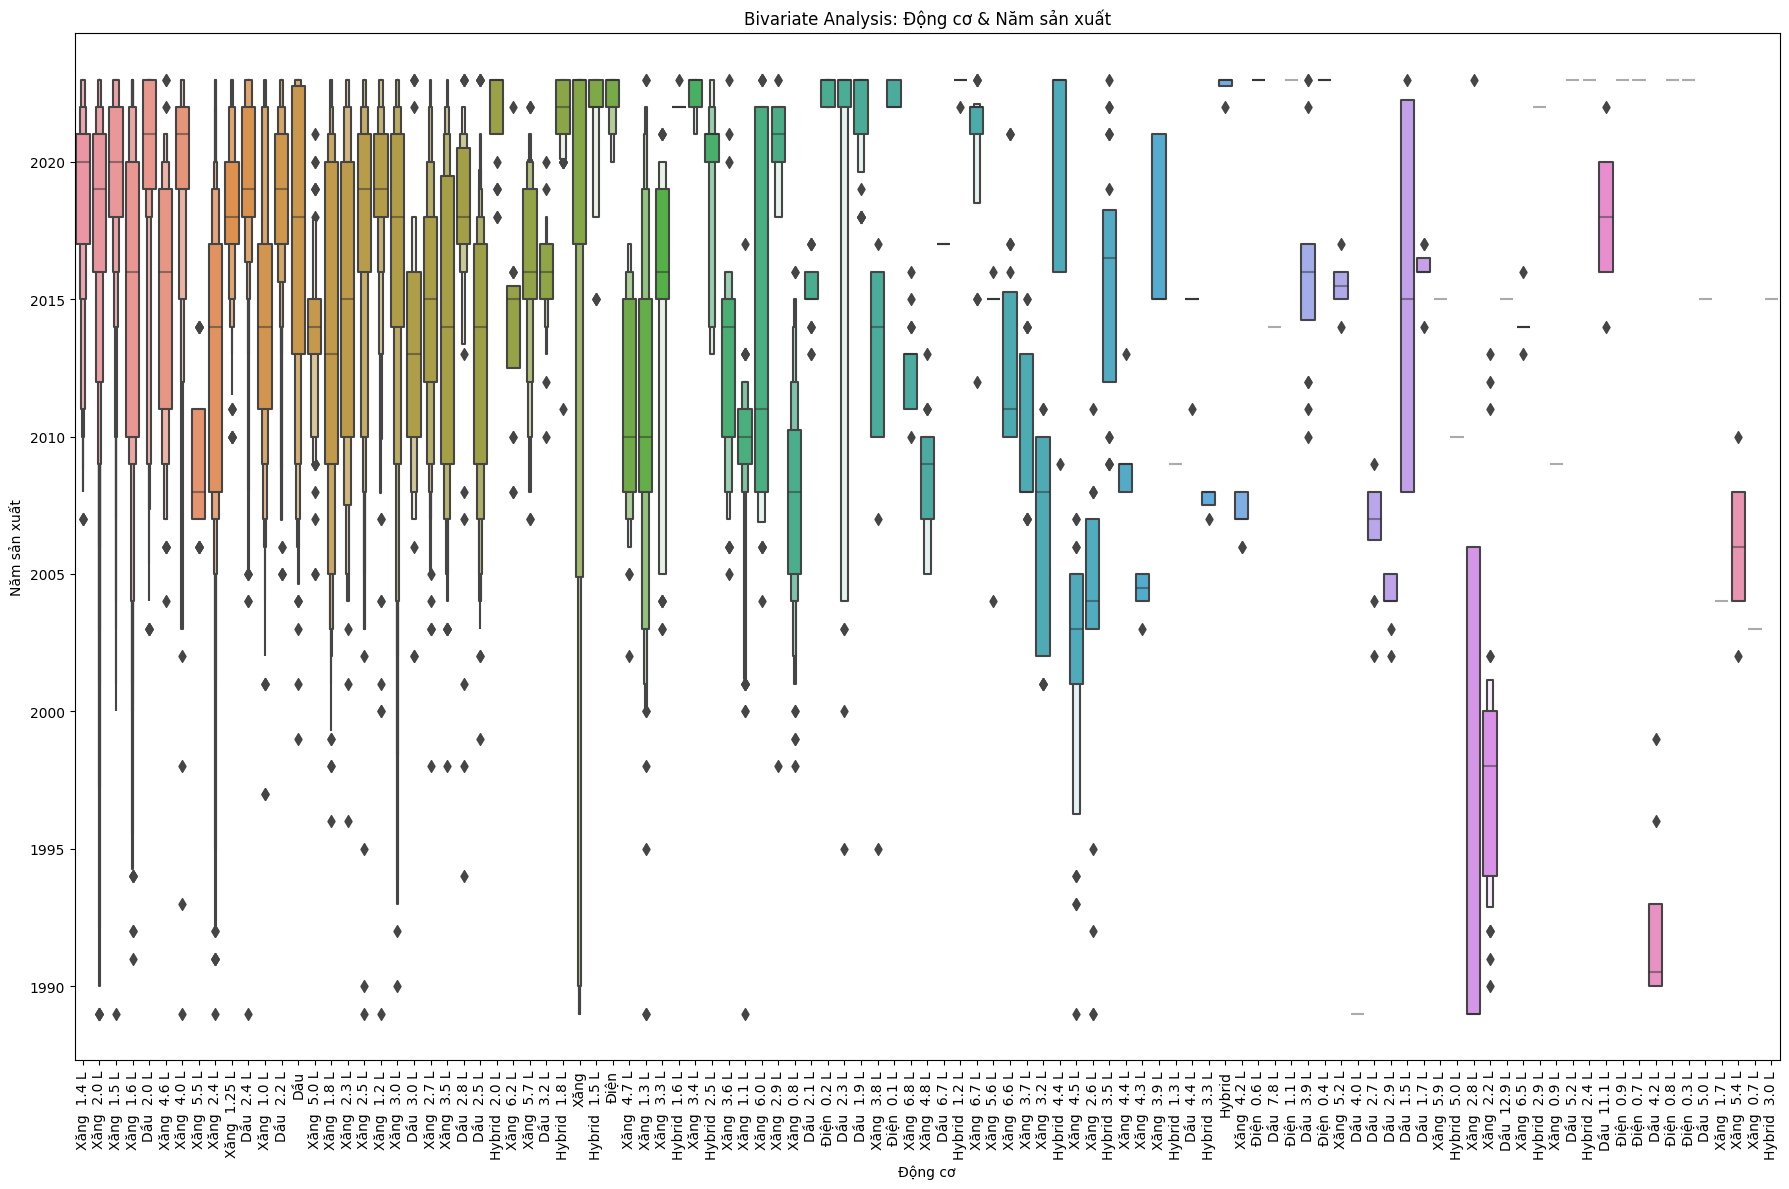

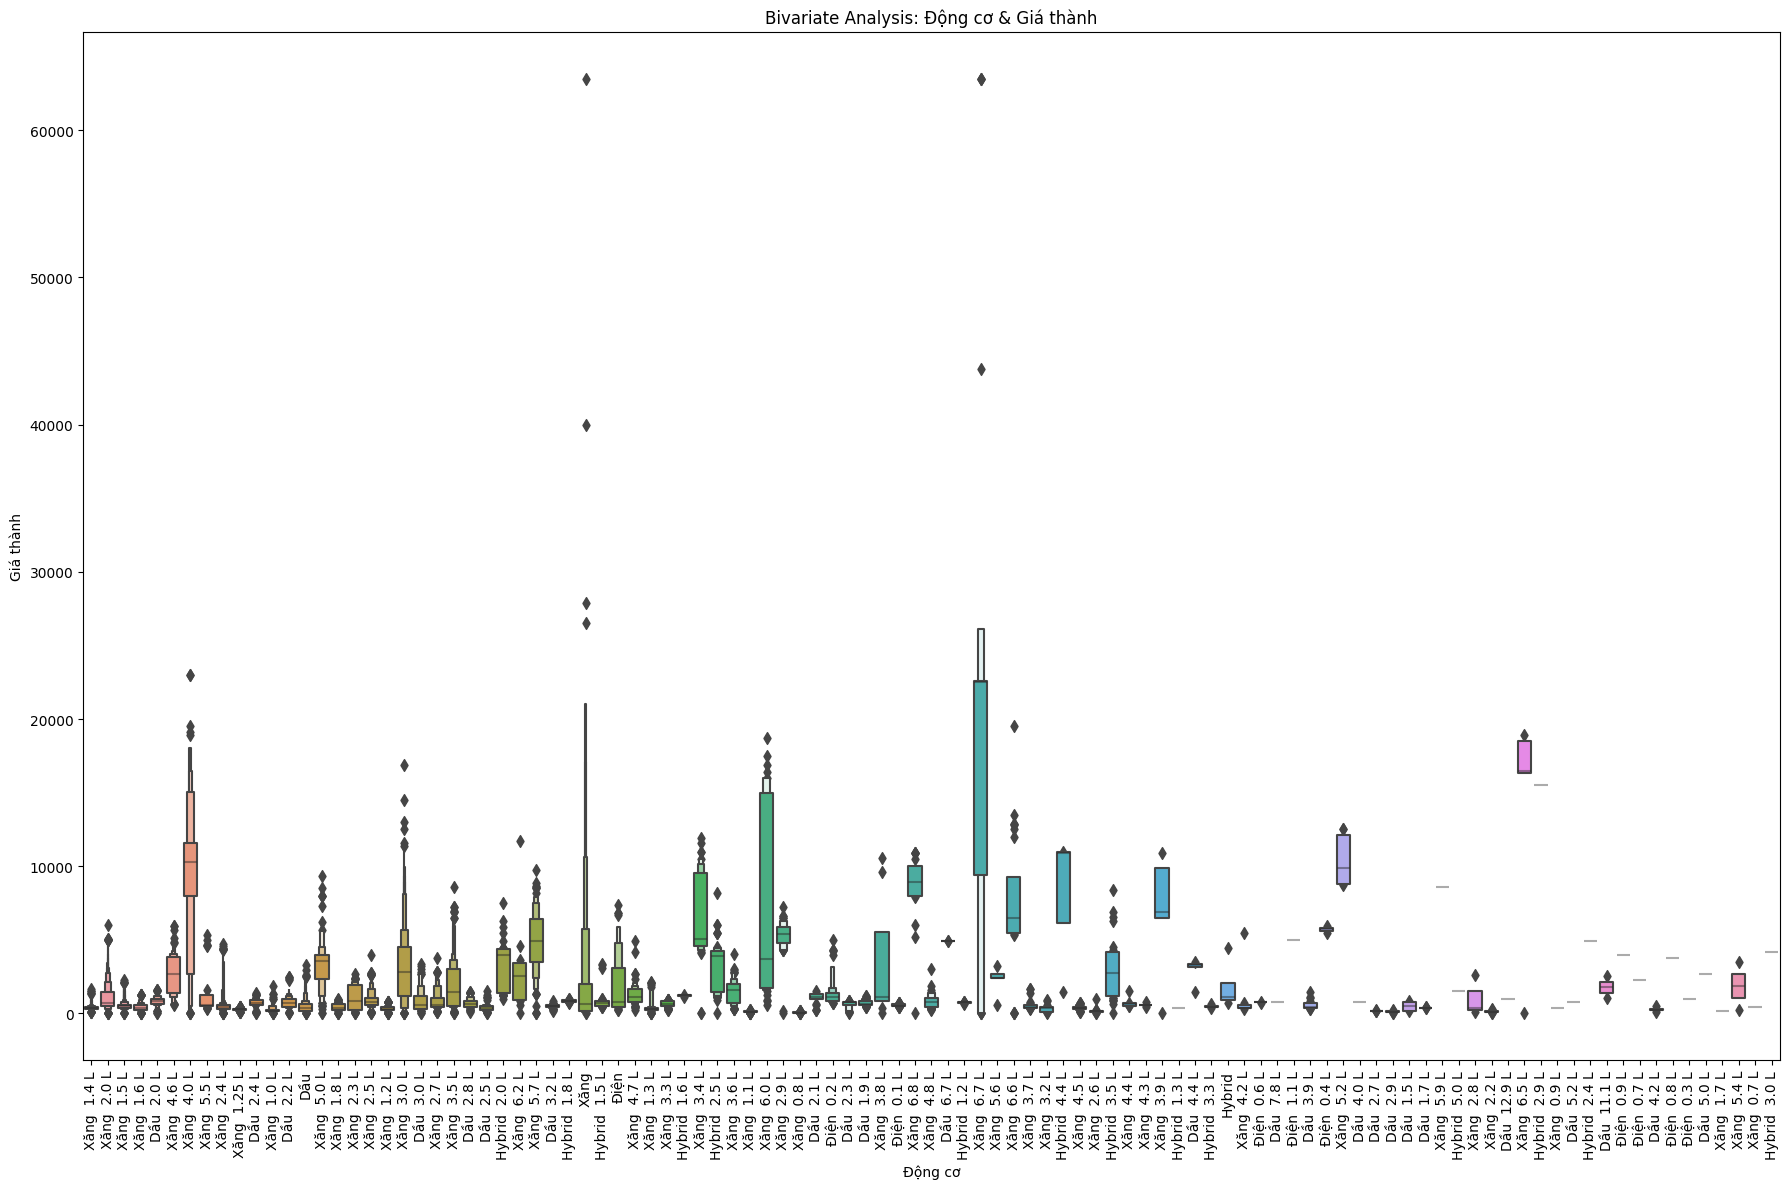

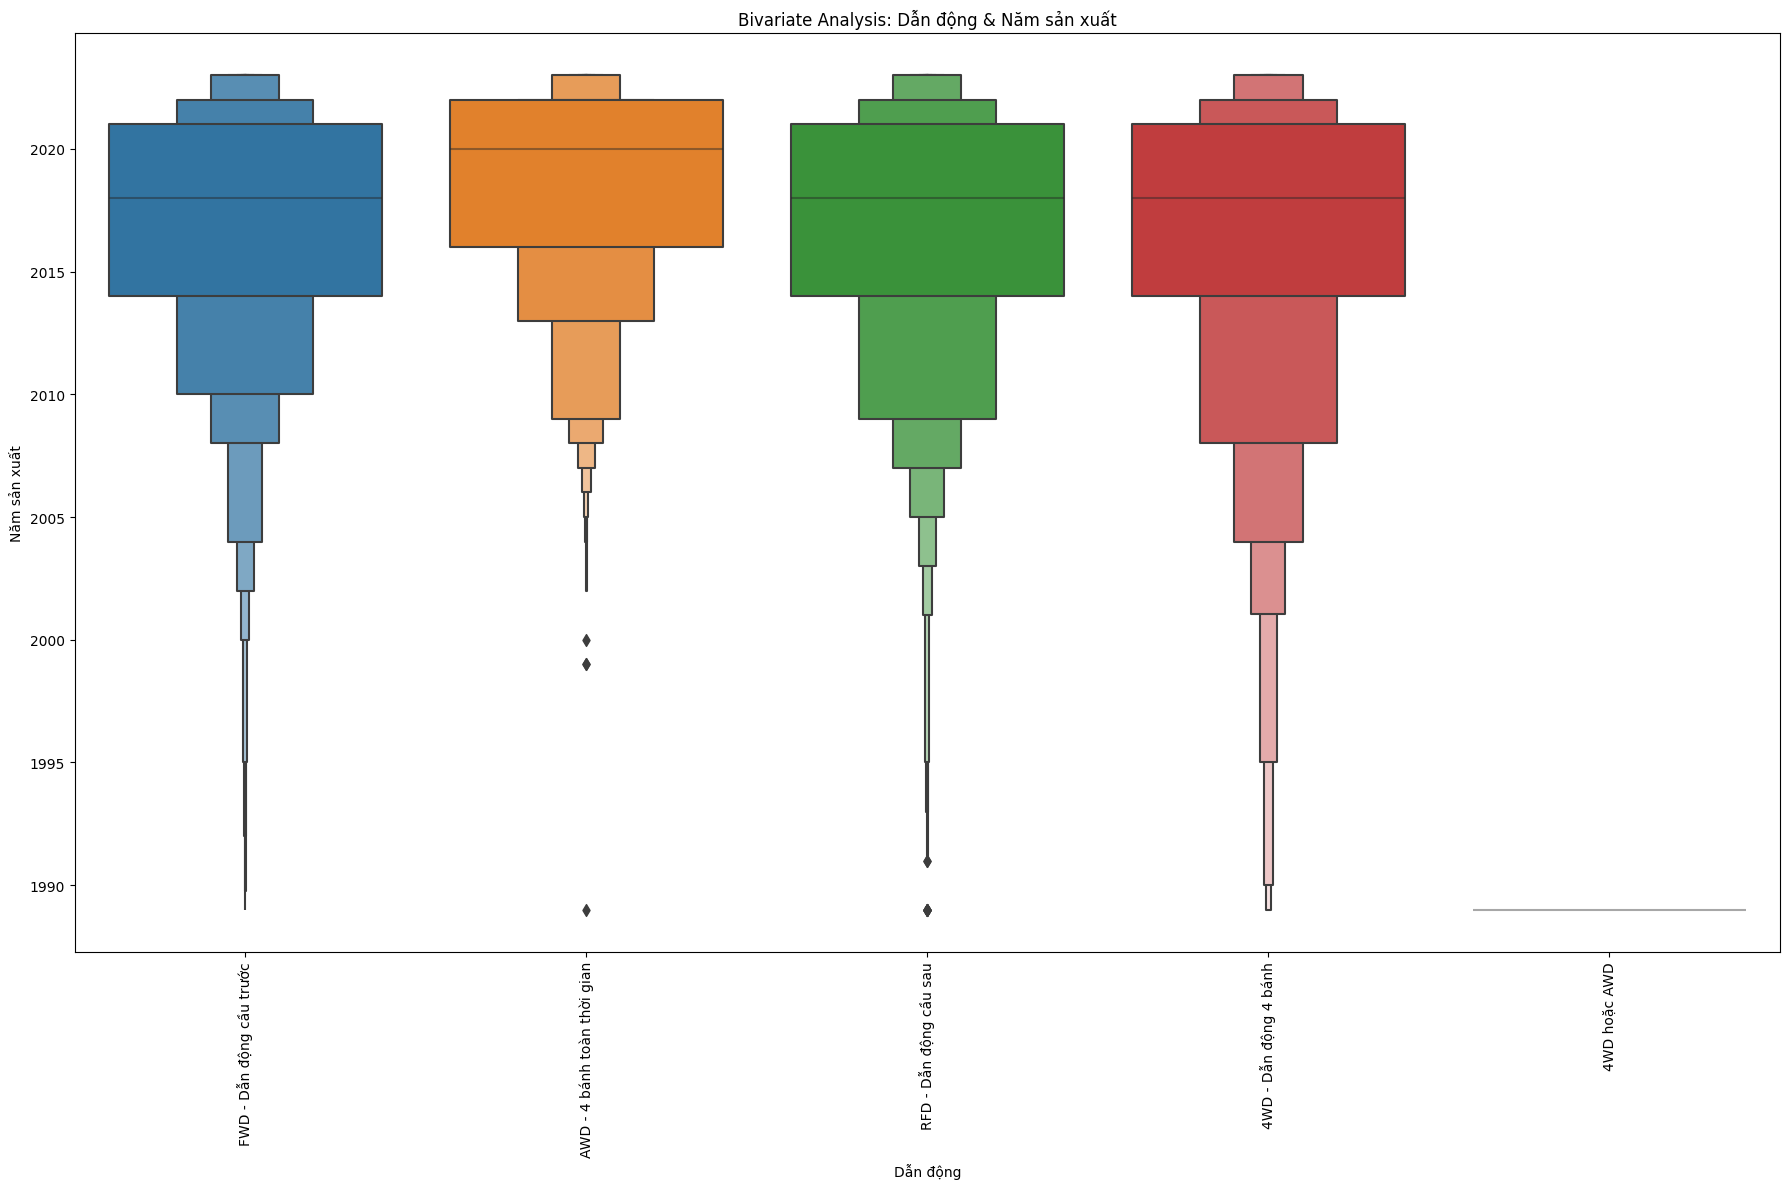

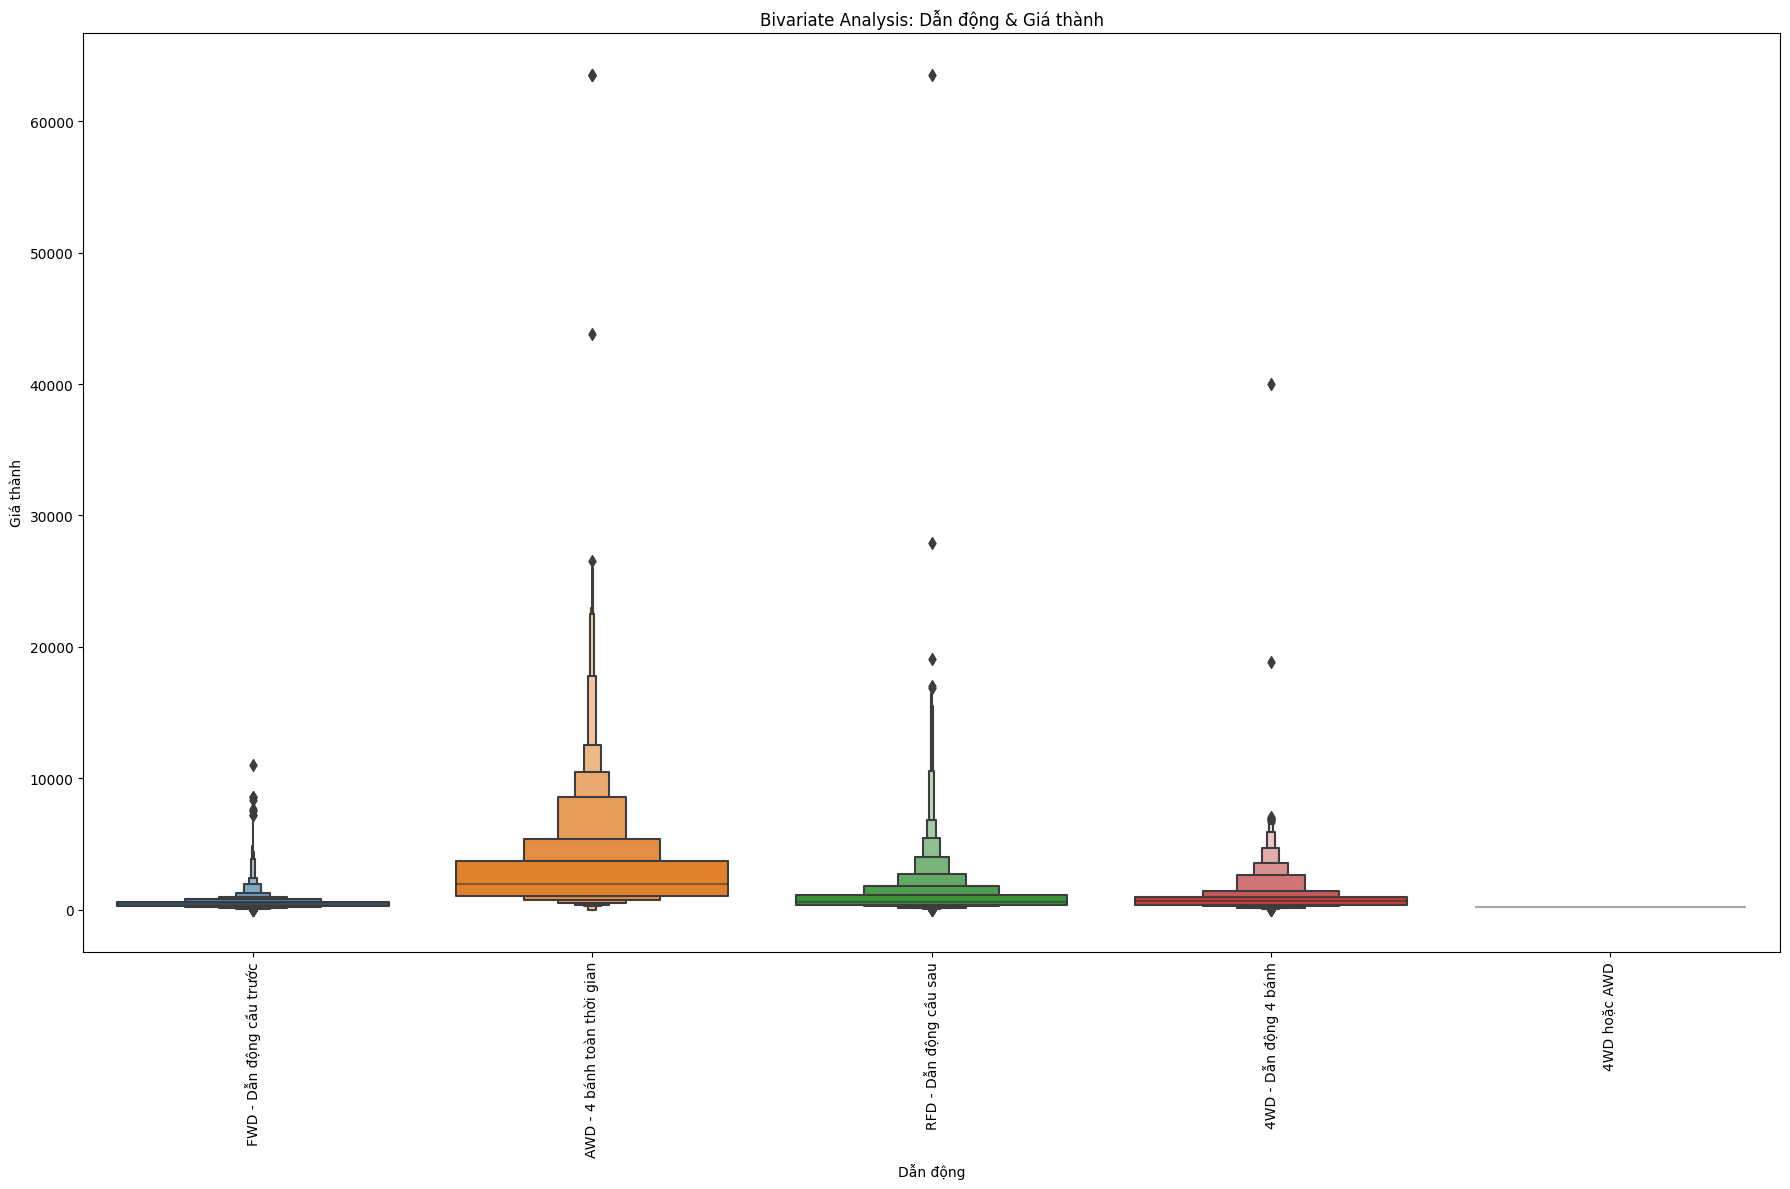

In [25]:
for category in ["Thương hiệu", "Model",  "Phiên bản", "Tình trạng", "Số Km đã đi", "Xuất xứ", "Kiểu dáng", "Hộp số", "Động cơ", "Dẫn động"]:
    for value in ["Năm sản xuất", "Giá thành"]:

        plt.figure(figsize=(18,12))
        
        sns.boxenplot(x=dataset[category], y=dataset[value], data=dataset)
        plt.title('Bivariate Analysis: ' + category + " & " + value)
        plt.xticks(rotation=90) 

        plt.tight_layout()
        plt.show()

<Figure size 1800x1200 with 0 Axes>

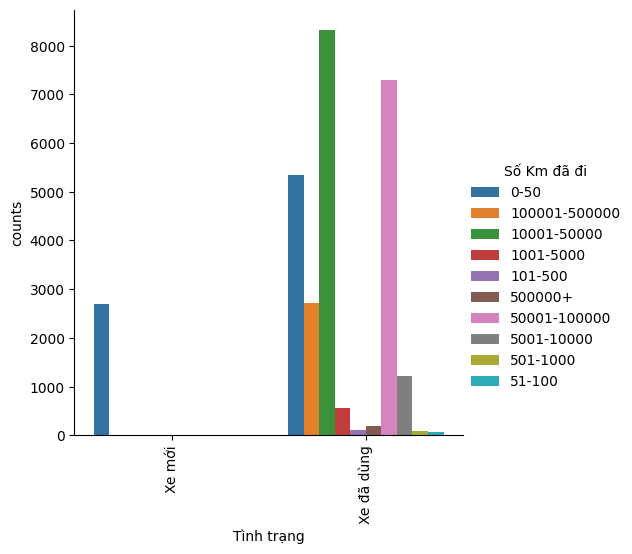

<Figure size 1800x1200 with 0 Axes>

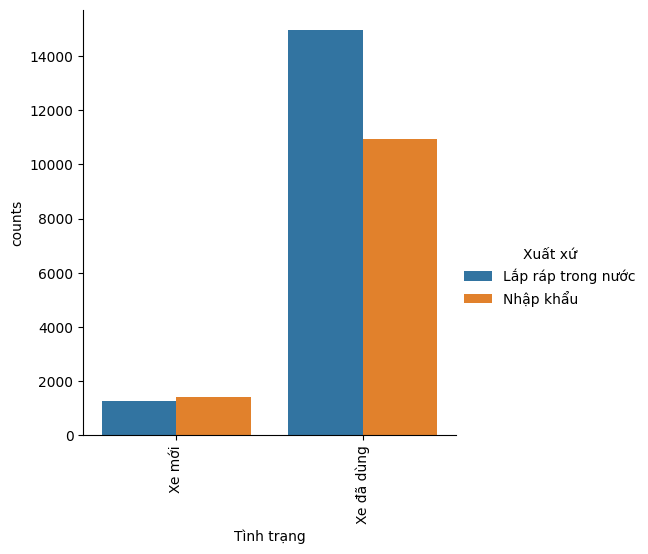

<Figure size 1800x1200 with 0 Axes>

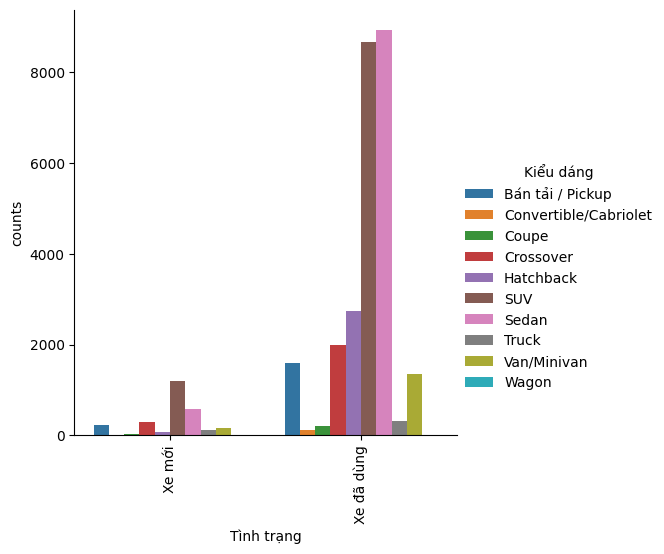

<Figure size 1800x1200 with 0 Axes>

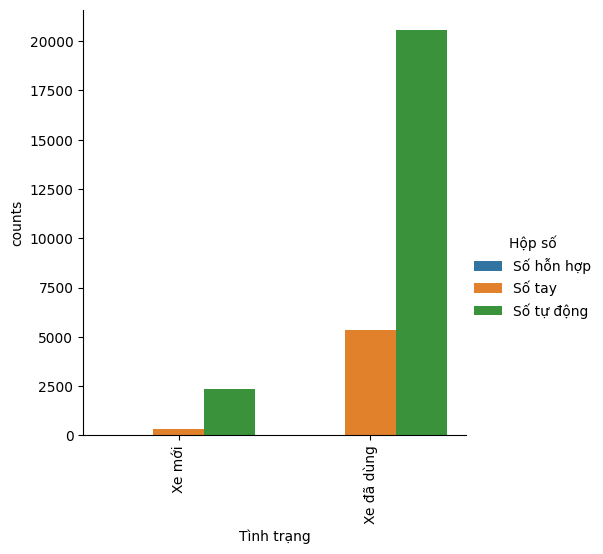

<Figure size 1800x1200 with 0 Axes>

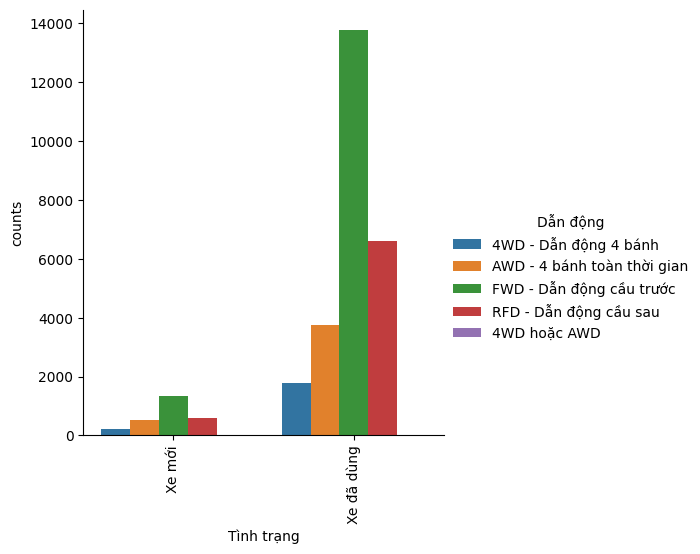

<Figure size 1800x1200 with 0 Axes>

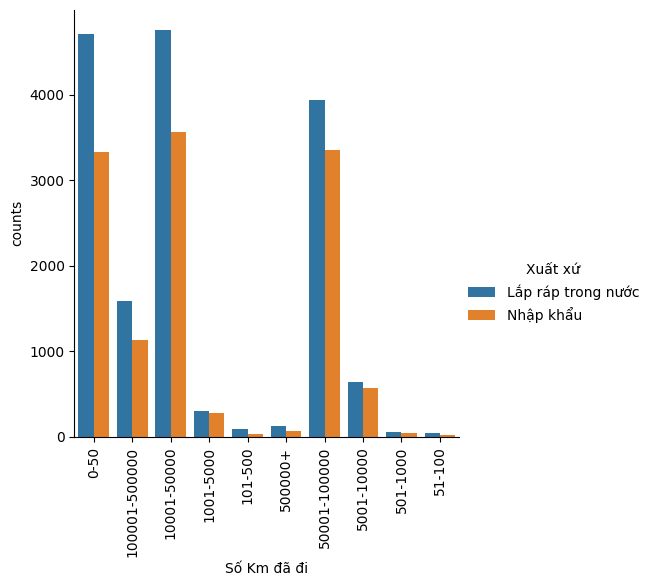

<Figure size 1800x1200 with 0 Axes>

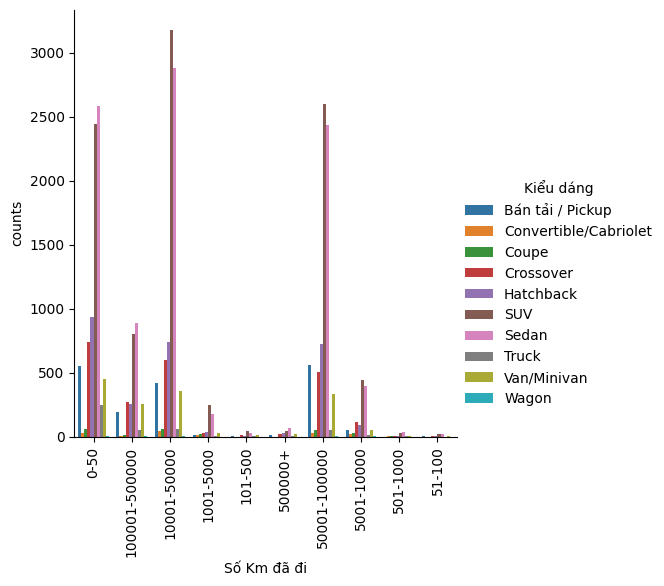

<Figure size 1800x1200 with 0 Axes>

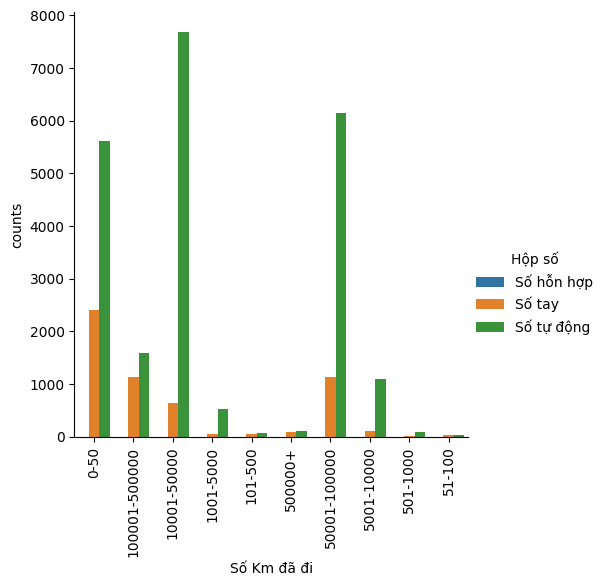

<Figure size 1800x1200 with 0 Axes>

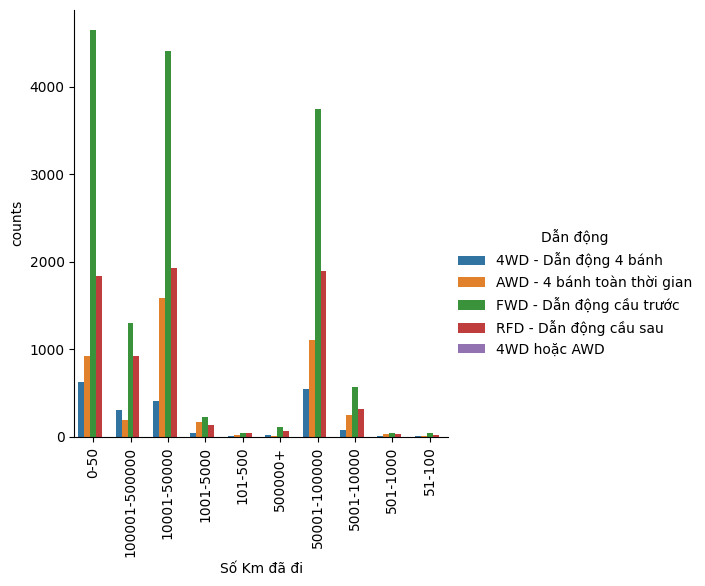

<Figure size 1800x1200 with 0 Axes>

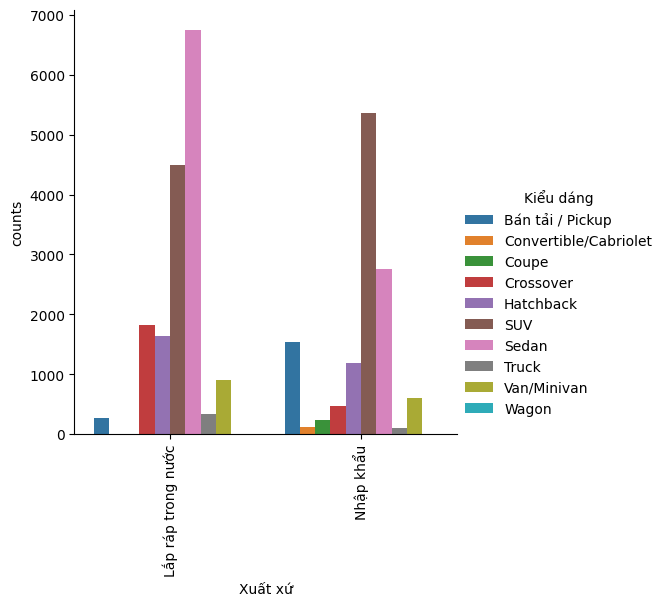

<Figure size 1800x1200 with 0 Axes>

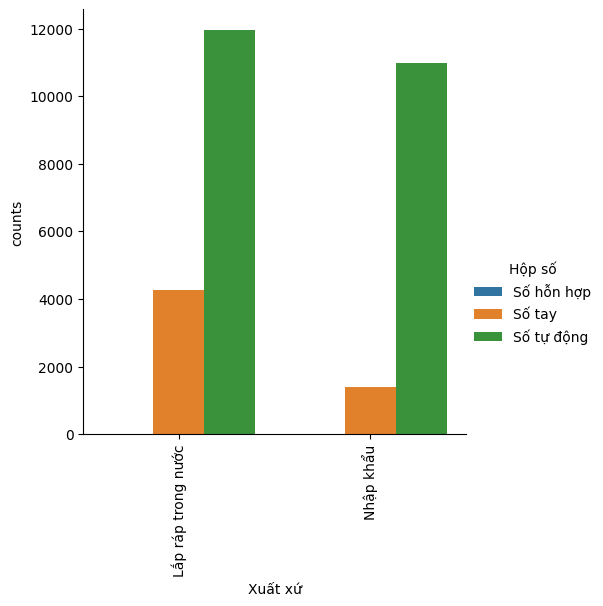

<Figure size 1800x1200 with 0 Axes>

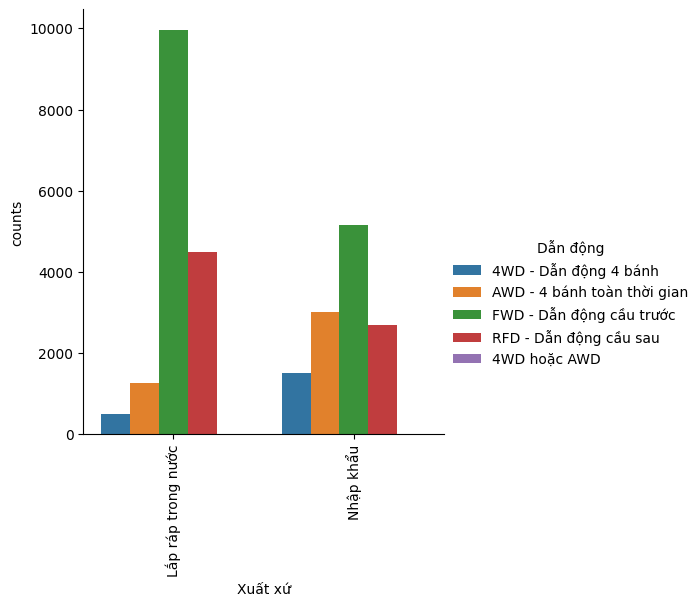

<Figure size 1800x1200 with 0 Axes>

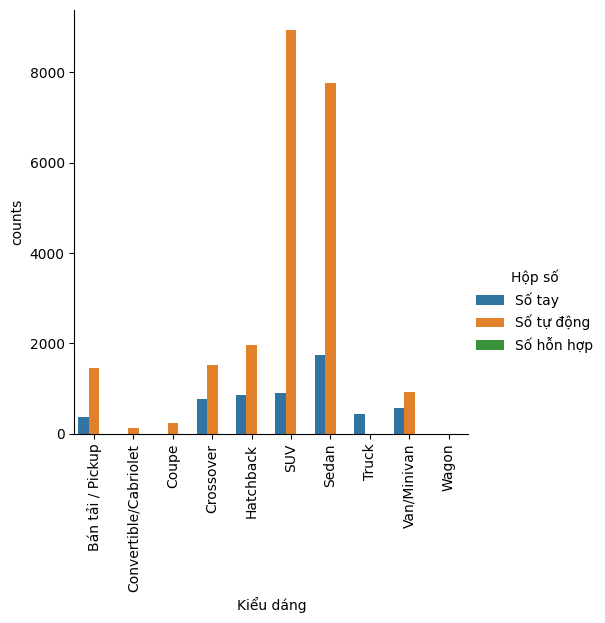

<Figure size 1800x1200 with 0 Axes>

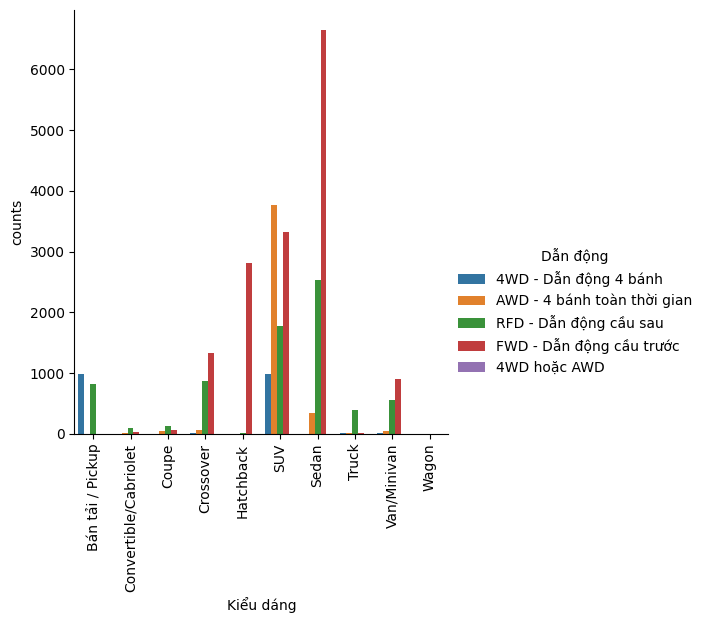

<Figure size 1800x1200 with 0 Axes>

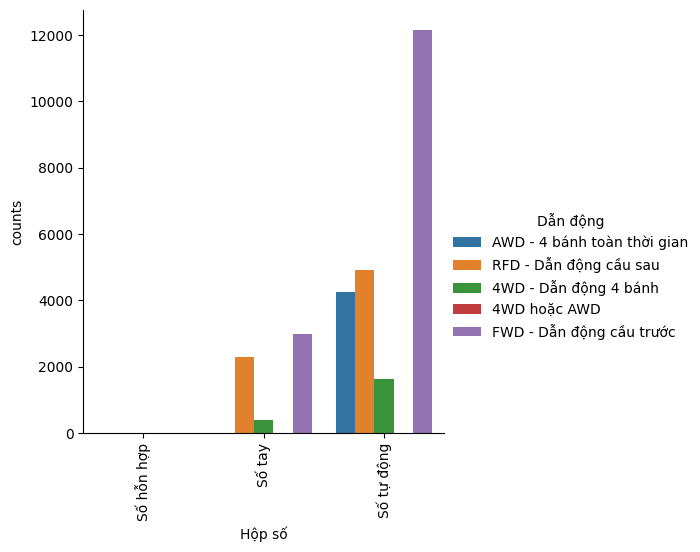

In [29]:
categories = ["Tình trạng", "Số Km đã đi", "Xuất xứ", "Kiểu dáng", "Hộp số", "Dẫn động"]

for i, value_1 in enumerate(categories):
    if i == 5:
        break
    for value_2 in categories[i+1:]:

        plt.figure(figsize=(18, 12))
        count_ds = dataset.groupby([value_1, value_2]).size().reset_index(name='counts')
        sns.catplot(x=value_1, y='counts', hue=value_2, data=count_ds, kind='bar')
        plt.xticks(rotation=90)
        plt.show()


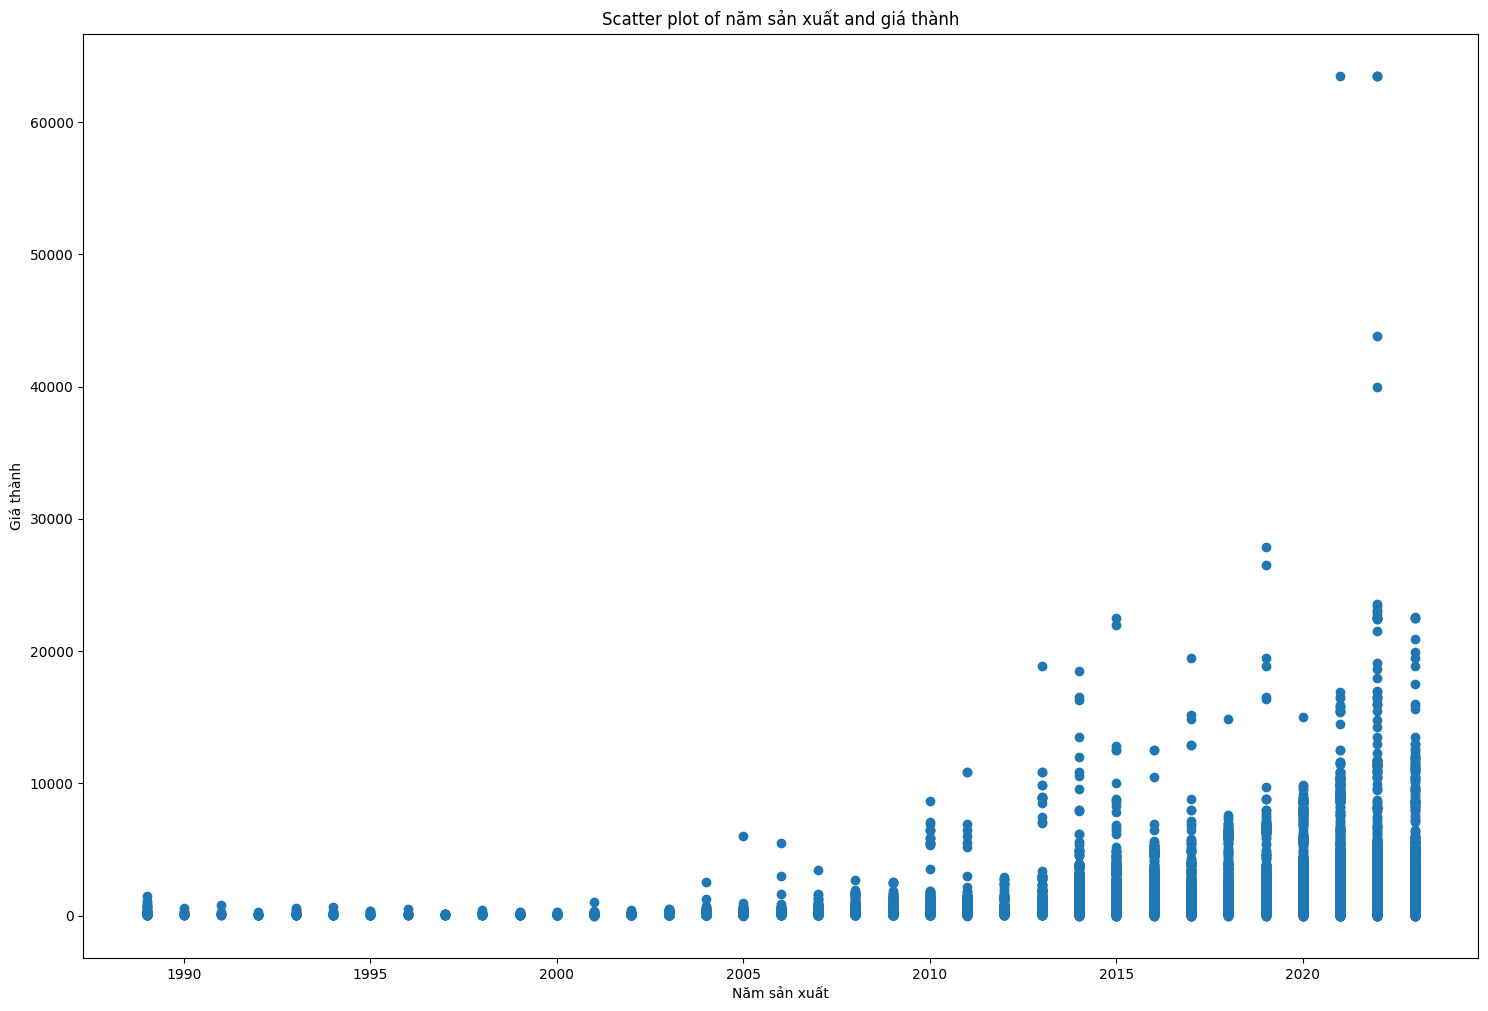

In [27]:
plt.figure(figsize=(18, 12))
plt.scatter(dataset['Năm sản xuất'], dataset['Giá thành'])

plt.title('Scatter plot of năm sản xuất and giá thành')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá thành')

plt.show()
